# 510 Final Project

## packages

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor

## flight take-off data - JFK airport 

**read data**

In [57]:
data = pd.read_csv("C:/Users/bonni/Documents/510/M1_final.csv")
data

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0         11             1            5                B6   N828JB  CHS   
1         11             1            5                B6   N992JB  LAX   
2         11             1            5                B6   N959JB  FLL   
3         11             1            5                B6   N999JQ  MCO   
4         11             1            5                DL   N880DN  ATL   
...      ...           ...          ...               ...      ...  ...   
28815      1            31            5                B6   N216JB  ORH   
28816      1            31            5                AA   N104NN  BOS   
28817      1            31            5                AS   N581AS  SEA   
28818      1            31            5                B6   N957JB  SJU   
28819      1            31            5                B6   N958JB  BQN   

       DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  \
0             -1               124       636        324  ...         34   
1             -7               371      2475        340  ...         34   
2             40               181      1069        301  ...         34   
3             -2               168       944        345  ...         34   
4             -4               139       760        360  ...         32   
...          ...               ...       ...        ...  ...        ...   
28815          2                57       150       1370  ...         38   
28816          2                75       187       1390  ...         38   
28817        283               392      2422       1125  ...         38   
28818          5               224      1598       1417  ...         38   
28819         -1               225      1576       1439  ...         38   

       Humidity  Wind Wind Speed  Wind Gust Pressure     Condition  sch_dep  \
0            58     W         25         38    29.86  Fair / Windy        9   
1            58     W         25         38    29.86  Fair / Windy        9   
2            58     W         25         38    29.86  Fair / Windy        9   
3            58     W         25         38    29.86  Fair / Windy        9   
4            58     W         24         35    29.91  Fair / Windy        9   
...         ...   ...        ...        ...      ...           ...      ...   
28815        96     N          6          0    30.18        Cloudy       20   
28816        96     N          6          0    30.18        Cloudy       19   
28817        96     N          6          0    30.18        Cloudy       19   
28818        96     N          6          0    30.18        Cloudy       19   
28819        96     N          6          0    30.18        Cloudy       19   

       sch_arr TAXI_OUT  
0           17       14  
1           17       15  
2           17       22  
3           17       12  
4           17       13  
...        ...      ...  
28815       32       19  
28816       23       22  
28817       23       21  
28818       23       13  
28819       23       15  

[28820 rows x 23 columns]

## descriptive statistics

In [58]:
data.describe()

MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY  \
count  28820.000000  28820.000000  28820.000000  28820.000000   
mean       7.894240     16.021096      4.008952      6.374983   
std        4.991723      8.750179      1.985230     38.735144   
min        1.000000      1.000000      1.000000    -22.000000   
25%        1.000000      8.000000      2.000000     -6.000000   
50%       11.000000     16.000000      4.000000     -3.000000   
75%       12.000000     24.000000      6.000000      2.000000   
max       12.000000     31.000000      7.000000   1276.000000   

       CRS_ELAPSED_TIME      DISTANCE     CRS_DEP_M    DEP_TIME_M  \
count      28820.000000  28820.000000  28820.000000  28820.000000   
mean         225.288203   1267.746079    831.003851    828.934698   
std          119.482417    889.343246    299.398525    305.864103   
min           57.000000     94.000000    301.000000      1.000000   
25%          124.000000    483.000000    545.000000    542.000000   
50%          188.000000   1029.000000    856.000000    854.000000   
75%          365.000000   2248.000000   1095.000000   1097.000000   
max          697.000000   4983.000000   1439.000000   1440.000000   

          CRS_ARR_M   Temperature      Humidity    Wind Speed     Wind Gust  \
count  28820.000000  28820.000000  28820.000000  28820.000000  28820.000000   
mean     910.874289     41.489833     57.732616     12.367627      5.535323   
std      345.411743      8.043533     23.468676      6.259298     11.886457   
min        1.000000     17.000000      0.000000      0.000000      0.000000   
25%      667.000000     36.000000     46.000000      8.000000      0.000000   
50%      918.000000     42.000000     59.000000     12.000000      0.000000   
75%     1193.000000     47.000000     74.000000     16.000000      0.000000   
max     1439.000000     68.000000     97.000000     36.000000     49.000000   

           Pressure       sch_dep       sch_arr      TAXI_OUT  
count  28820.000000  28820.000000  28820.000000  28820.000000  
mean      30.092433     31.091256     28.432130     20.858570  
std        0.296160      9.510359      8.263043      6.851915  
min       29.200000      0.000000      0.000000      5.000000  
25%       29.880000     26.000000     21.000000     16.000000  
50%       30.110000     30.000000     30.000000     19.000000  
75%       30.320000     37.000000     35.000000     25.000000  
max       30.750000     55.000000     46.000000     41.000000

In [59]:
data.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   
3     11             1            5                B6   N999JQ  MCO   
4     11             1            5                DL   N880DN  ATL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  \
0         -1               124       636        324  ...         34        58   
1         -7               371      2475        340  ...         34        58   
2         40               181      1069        301  ...         34        58   
3         -2               168       944        345  ...         34        58   
4         -4               139       760        360  ...         32        58   

   Wind Wind Speed  Wind Gust Pressure     Condition  sch_dep  sch_arr  \
0     W         25         38    29.86  Fair / Windy        9       17   
1     W         25         38    29.86  Fair / Windy        9       17   
2     W         25         38    29.86  Fair / Windy        9       17   
3     W         25         38    29.86  Fair / Windy        9       17   
4     W         24         35    29.91  Fair / Windy        9       17   

  TAXI_OUT  
0       14  
1       15  
2       22  
3       12  
4       13  

[5 rows x 23 columns]

In [60]:
data.shape

(28820, 23)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [62]:
data.isna().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [63]:
data.index

RangeIndex(start=0, stop=28820, step=1)

In [64]:
data.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

**list numerical and categorical data**

In [65]:
numerical_features = list(data.select_dtypes(exclude = ['object']).columns)
categorical_features = list(data.select_dtypes('object').columns)
print('numerical features', numerical_features)
print('categorical features', categorical_features)

numerical features ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT']
categorical features ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Dew Point', 'Wind', 'Condition']


**separate features and target variable**

In [66]:
X = data.drop('TAXI_OUT', axis = 1)
y = data['TAXI_OUT']

## Group features in relation to target to find mean
## Boxplots

**OP_UNIQUE_CARRIER**

**use boxplot to visualize outliers and high/low means, and reduce categories in column**

Only **B6**, **AA**, and **AS** have either a higher average or more outliers than usual compared to the other airlines. Keep these as separate categories, and group the rest of the airlines as 'Other' in preprocessing.

OP_UNIQUE_CARRIER
9E    21.184392
AA    20.554103
AS    25.536454
B6    19.559600
DL    21.615755
HA    20.122222
MQ    21.272727
OO    20.646302
YX    21.707877
Name: TAXI_OUT, dtype: float64


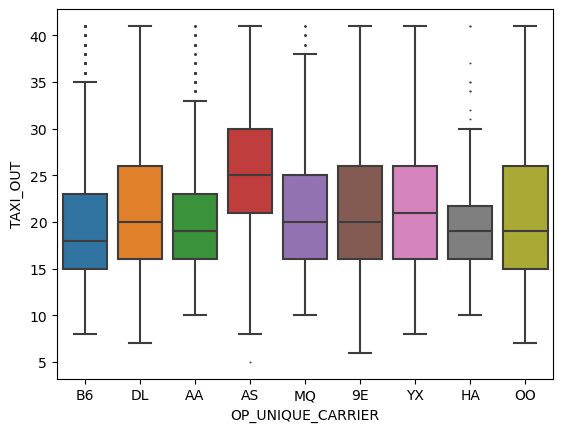

In [67]:
print(data.groupby('OP_UNIQUE_CARRIER')['TAXI_OUT'].mean())
sns.boxplot(data, x = 'OP_UNIQUE_CARRIER', y = 'TAXI_OUT', fliersize = 0.5)
plt.show()

**Condition** 

**use boxplot to visualize outliers and high/low means, and reduce categories in column**

Every condition excluded from below has an unremarkable mean that falls within the most common range, and is considered as 'Other'. Ordinally encode these as 0.

Conditions below will be encode from 1 to 8 from lowest to highest mean.


high averages: Wintry Mix / Windy, Light Freezing Rain, Light Snow, Snow, Drizzle and Fog, Light Drizzle / Windy

low averages: Fog / Windy, Heavy Rain / Windy

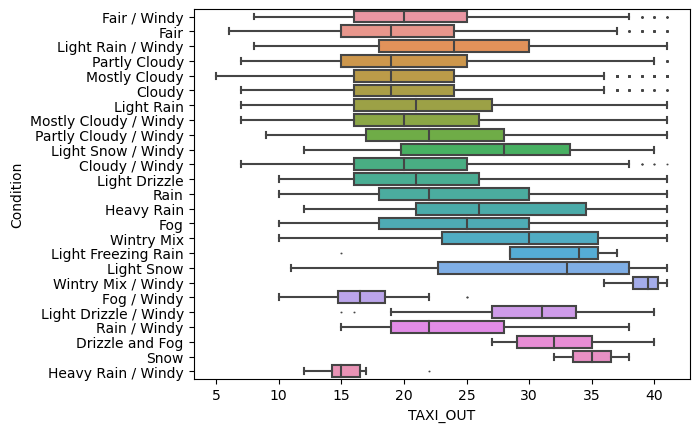

In [68]:
sns.boxplot(data, x = 'TAXI_OUT', y = 'Condition', fliersize = 0.5)
plt.show()

## Unique values and number of unique values

**unique values for categorical features**

NOTE: 'Dew Point' is actually string of integers, so convert to integers later using astype(int).

In [69]:
X['TAIL_NUM'].unique()

array(['N828JB', 'N992JB', 'N959JB', ..., 'N316NB', 'N976NN', 'N217JQ'],
      dtype=object)

In [70]:
X['DEST'].unique()

array(['CHS', 'LAX', 'FLL', 'MCO', 'ATL', 'ORD', 'BUF', 'LGB', 'LAS',
       'DCA', 'PHX', 'SFO', 'SJU', 'SLC', 'BOS', 'SAV', 'SYR', 'MSP',
       'SEA', 'MIA', 'PDX', 'TPA', 'BTV', 'IAH', 'DEN', 'RSW', 'ORF',
       'JAX', 'MSY', 'CLT', 'BNA', 'RDU', 'SAN', 'SJC', 'ROC', 'DFW',
       'IAD', 'AUS', 'DTW', 'PWM', 'SRQ', 'CMH', 'HNL', 'PBI', 'BWI',
       'CLE', 'BUR', 'PIT', 'RIC', 'IND', 'CVG', 'SMF', 'ONT', 'SAT',
       'PSP', 'OAK', 'ABQ', 'PSE', 'ORH', 'BQN', 'STT', 'RNO', 'PHL',
       'EGE', 'JAC'], dtype=object)

In [71]:
X['Wind'].unique()

array(['W', 'WNW', 'NW', 'NNW', 'S', 'ENE', 'NE', 'NNE', 'E', 'SE',
       'CALM', 'SW', 'VAR', 'SSE', 'SSW', 'WSW', 'N', 'ESE', nan],
      dtype=object)

In [72]:
X['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

**number of unique values for each categorical feature**

In [73]:
print('OP_UNIQUE_CARRIER:', X['OP_UNIQUE_CARRIER'].nunique())
print('TAIL_NUM:', X['TAIL_NUM'].nunique())
print('DEST:', X['DEST'].nunique())
print('Wind:', X['Wind'].nunique())
print('Condition:', X['Condition'].nunique())

OP_UNIQUE_CARRIER: 9
TAIL_NUM: 2092
DEST: 65
Wind: 18
Condition: 25


## encode categorical data

target encode with groupby 

**OP_UNIQUE_CARRIER** 

In [74]:
encoded_data = pd.concat([X,y], axis = 1)
encoded_data['OP_UNIQUE_CARRIER'] = encoded_data['OP_UNIQUE_CARRIER'].map({'B6':0,'AA':1,'Other':2,'AS':3})
encoded_data['OP_UNIQUE_CARRIER'] = encoded_data.groupby('OP_UNIQUE_CARRIER')['TAXI_OUT'].transform('mean')

**Wind**

impute two missing values first

In [75]:
encoded_data['Wind'].fillna('NW', inplace = True)

encoded_data['Wind'] = encoded_data['Wind'].replace(['CALM','VAR'], 0)
encoded_data['Wind'] = encoded_data['Wind'].replace(['W', 'S', 'E', 'N'], 1)
encoded_data['Wind'] = encoded_data['Wind'].replace(['NW', 'NE', 'SE','SW'], 2)
encoded_data['Wind'] = encoded_data['Wind'].replace(['WNW', 'NNW', 'ENE', 'NNE', 'SSE', 'SSW', 'WSW', 'ESE'], 3)

encoded_data['Wind'] = encoded_data.groupby('Wind')['TAXI_OUT'].transform('mean')

In [76]:
encoded_data['Condition'] = encoded_data['Condition'].replace(['Fair / Windy', 'Fair', 'Light Rain / Windy', 
                                                               'Partly Cloudy', 'Mostly Cloudy', 'Cloudy', 'Light Rain', 
                                                               'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 
                                                               'Light Snow / Windy', 'Cloudy / Windy', 'Light Drizzle', 
                                                               'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix', 
                                                               'Rain / Windy'], 0)
encoded_data['Condition'] = encoded_data['Condition'].map({'Heavy Rain / Windy':1, 'Fog / Windy':2, 'Drizzle and Fog':3, 
                                                           'Light Snow':4, 'Light Drizzle / Windy':5, 
                                                           'Light Freezing Rain':6, 'Snow':7, 'Wintry Mix / Windy':8})

encoded_data['Condition'] = encoded_data.groupby('Condition')['TAXI_OUT'].transform('mean')

**TAIL_NUM** 

In [77]:
encoded_data['TAIL_NUM'] = encoded_data.groupby('TAIL_NUM')['TAXI_OUT'].transform('mean')

**DEST** 

In [78]:
encoded_data['DEST'] = encoded_data.groupby('DEST')['TAXI_OUT'].transform('mean')

**Dew Point** --- convert string to float

In [79]:
encoded_data['Dew Point'] = encoded_data['Dew Point'].astype(int)

## encoded data

In [80]:
encoded_data

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER   TAIL_NUM  \
0         11             1            5          19.559600  20.290323   
1         11             1            5          19.559600  19.920000   
2         11             1            5          19.559600  18.850000   
3         11             1            5          19.559600  19.090909   
4         11             1            5                NaN  20.666667   
...      ...           ...          ...                ...        ...   
28815      1            31            5          19.559600  20.343750   
28816      1            31            5          20.554103  20.637363   
28817      1            31            5          25.536454  23.250000   
28818      1            31            5          19.559600  21.661765   
28819      1            31            5          19.559600  19.384615   

            DEST  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  \
0      19.962466         -1               124       636        324  ...   
1      21.188299         -7               371      2475        340  ...   
2      21.680556         40               181      1069        301  ...   
3      19.995776         -2               168       944        345  ...   
4      19.272956         -4               139       760        360  ...   
...          ...        ...               ...       ...        ...  ...   
28815  18.677778          2                57       150       1370  ...   
28816  20.218825          2                75       187       1390  ...   
28817  23.405045        283               392      2422       1125  ...   
28818  21.052764          5               224      1598       1417  ...   
28819  18.544715         -1               225      1576       1439  ...   

       Dew Point  Humidity       Wind  Wind Speed  Wind Gust  Pressure  \
0             34        58  20.913871          25         38     29.86   
1             34        58  20.913871          25         38     29.86   
2             34        58  20.913871          25         38     29.86   
3             34        58  20.913871          25         38     29.86   
4             32        58  20.913871          24         35     29.91   
...          ...       ...        ...         ...        ...       ...   
28815         38        96  20.913871           6          0     30.18   
28816         38        96  20.913871           6          0     30.18   
28817         38        96  20.913871           6          0     30.18   
28818         38        96  20.913871           6          0     30.18   
28819         38        96  20.913871           6          0     30.18   

       Condition  sch_dep  sch_arr  TAXI_OUT  
0            NaN        9       17        14  
1            NaN        9       17        15  
2            NaN        9       17        22  
3            NaN        9       17        12  
4            NaN        9       17        13  
...          ...      ...      ...       ...  
28815        NaN       20       32        19  
28816        NaN       19       23        22  
28817        NaN       19       23        21  
28818        NaN       19       23        13  
28819        NaN       19       23        15  

[28820 rows x 23 columns]

## distribution plots

<Figure size 500x500 with 0 Axes>

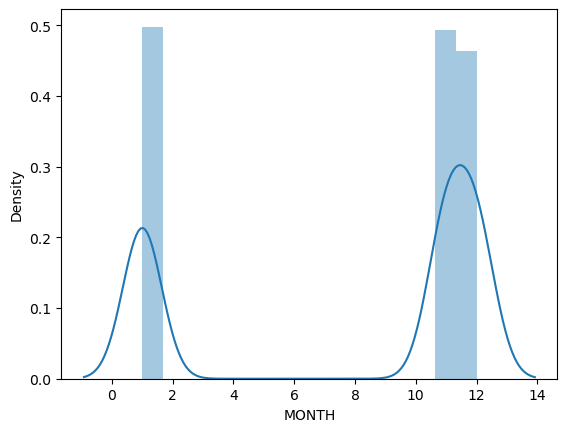

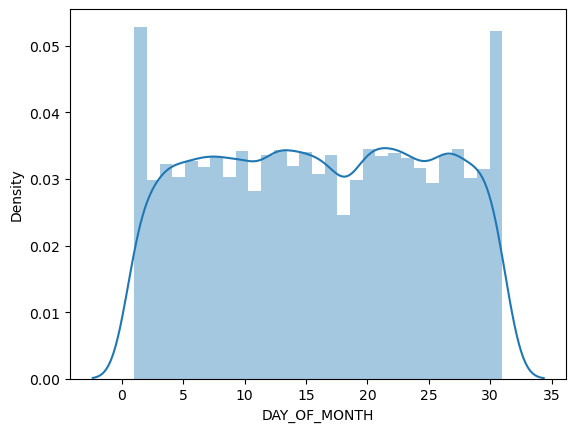

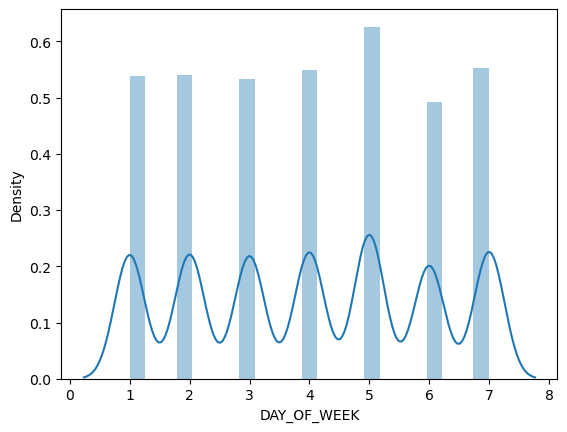

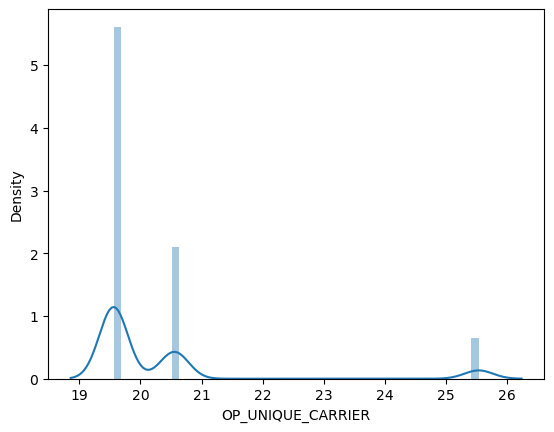

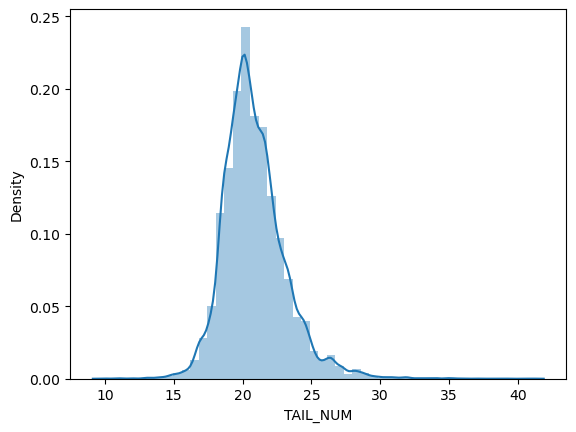

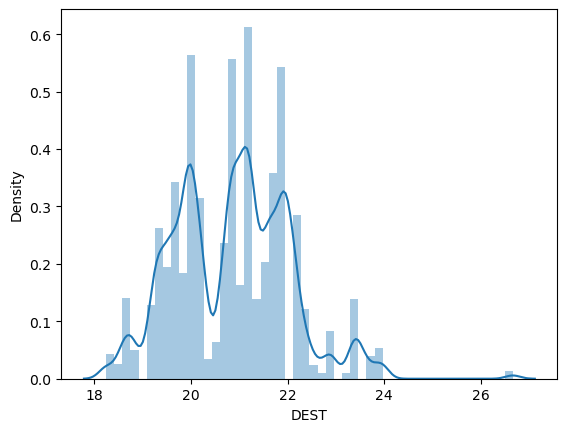

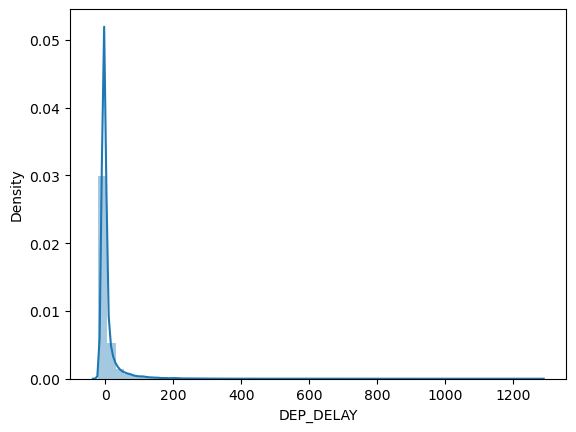

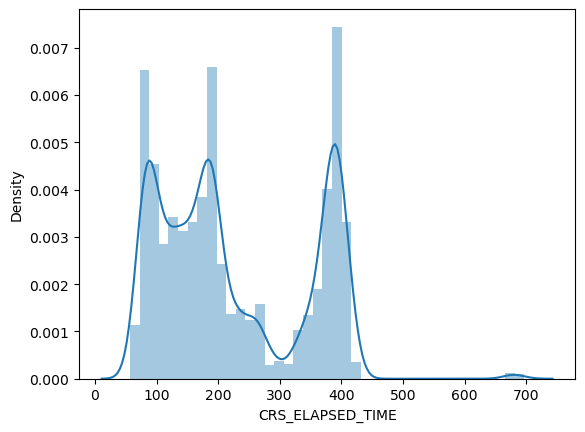

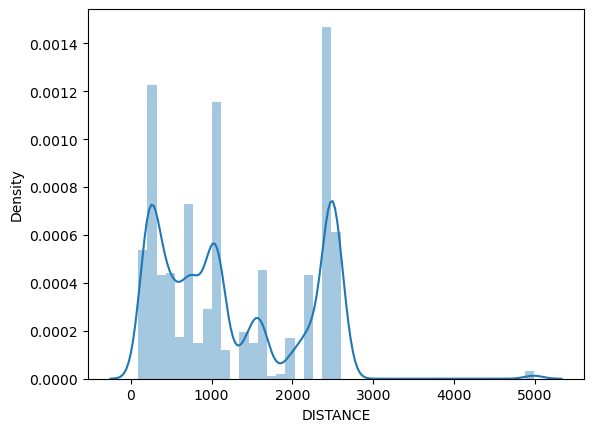

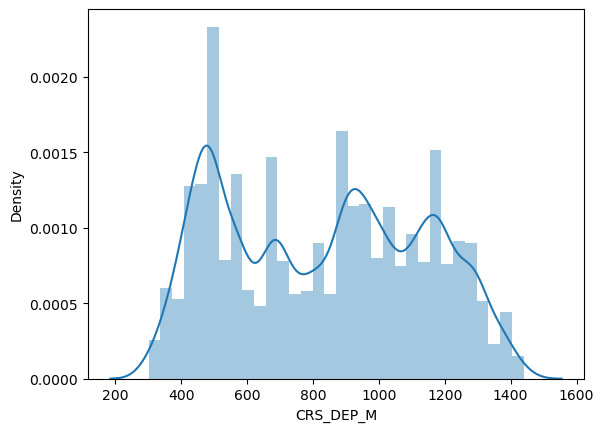

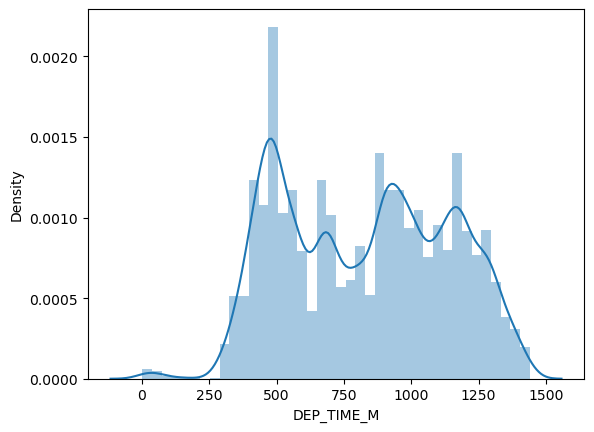

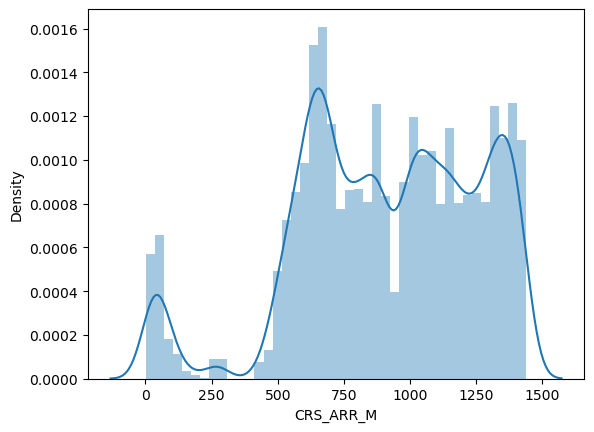

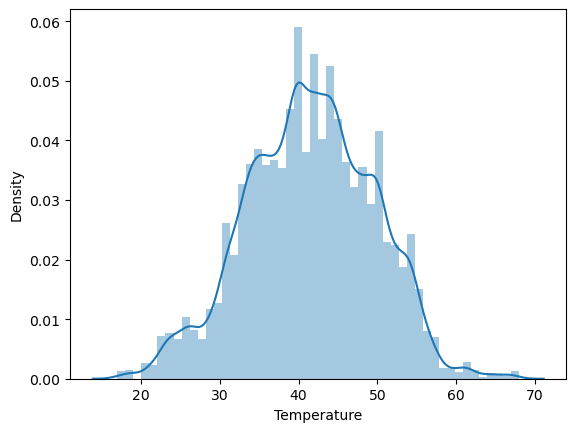

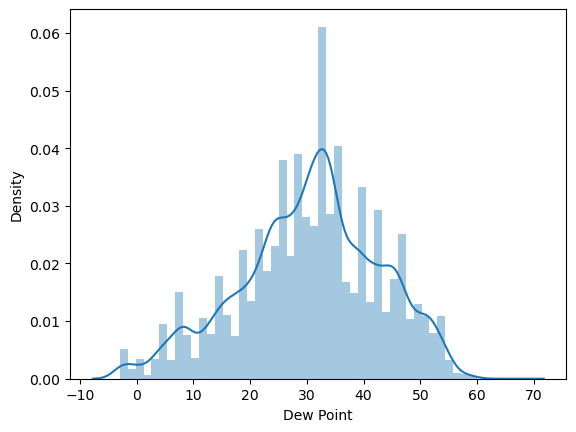

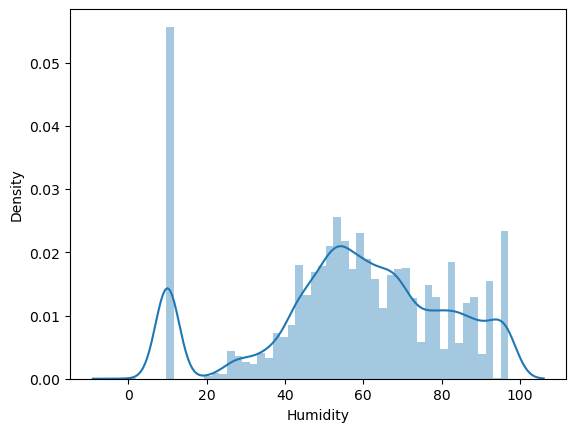

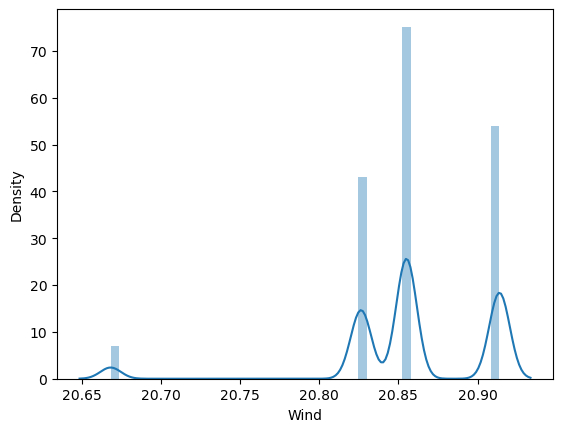

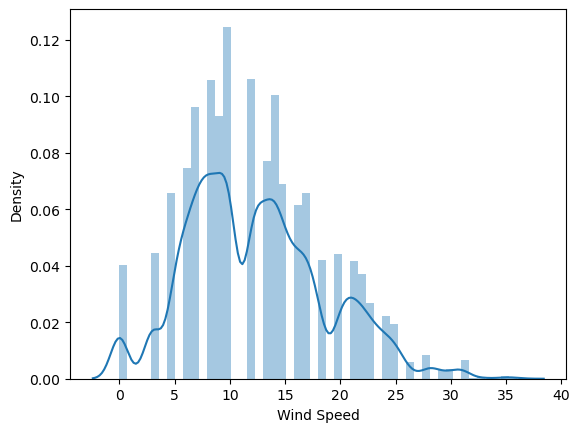

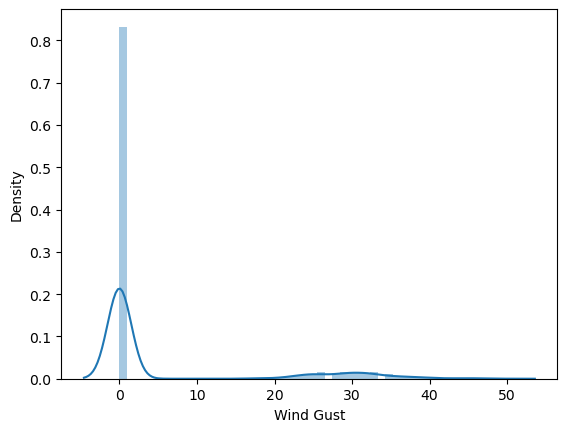

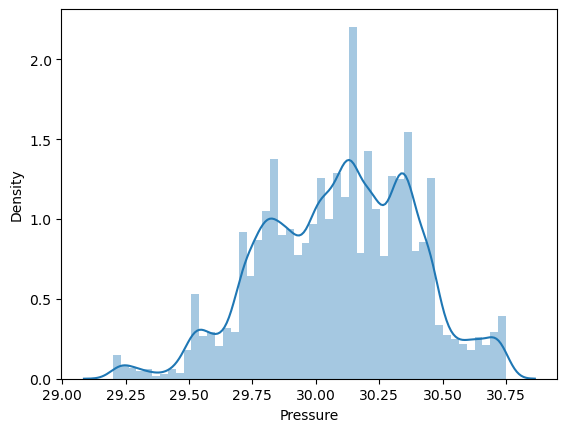

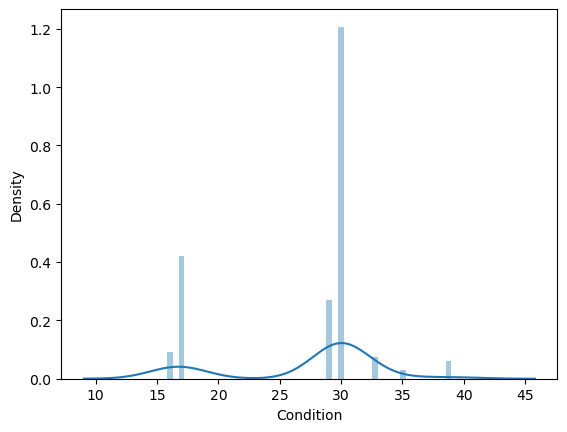

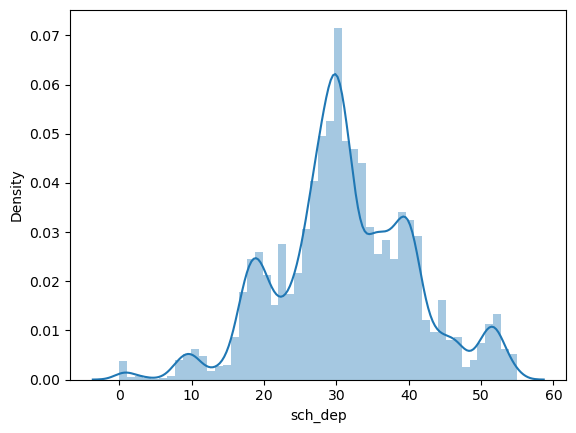

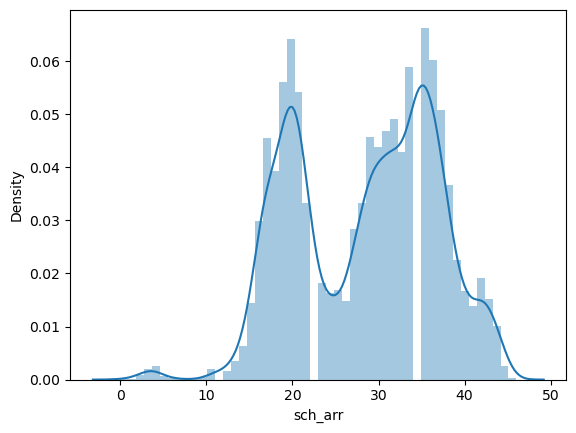

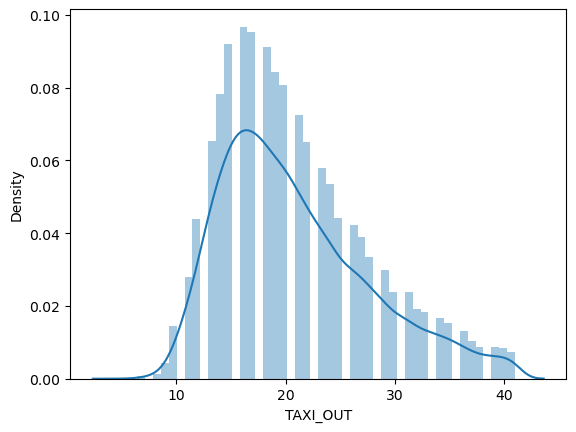

In [81]:
X = encoded_data.drop('TAXI_OUT', axis = 1)
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (5,5))
for col in encoded_data.columns:
    plt.subplots()
    sns.distplot(encoded_data[col])
    plt.show()

## standardization and normalization

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_feat = encoded_data[['TAIL_NUM','Temperature','Dew Point']]

scaler = StandardScaler()
scaler.fit(norm_feat)
scaled = scaler.fit_transform(norm_feat)
scaled_norm = pd.DataFrame(scaled, columns = norm_feat.columns)
# print(scaled_norm)


skewed_feat = encoded_data[['DEP_DELAY','Wind Speed','Pressure']]

scaler = MinMaxScaler()
scaler.fit(skewed_feat)
scaled = scaler.fit_transform(skewed_feat)
scaled_skewed = pd.DataFrame(scaled, columns = skewed_feat.columns)
# print(scaled_skewed)


other_distr = encoded_data[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST', 'CRS_ELAPSED_TIME', 
                            'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Humidity', 'Wind', 'Wind Gust', 
                            'Condition','sch_dep', 'sch_arr']]

scaler = MinMaxScaler()
scaler.fit(other_distr)
scaled = scaler.fit_transform(other_distr)
scaled_other = pd.DataFrame(scaled, columns = other_distr.columns)
# print(scaled_other)

target = encoded_data[['TAXI_OUT']]

scaler = MinMaxScaler()
scaler.fit(target)
scaled = scaler.fit_transform(target)
scaled_target = pd.DataFrame(scaled, columns = target.columns)

scaled_data = pd.concat([scaled_norm, scaled_skewed, scaled_other, scaled_target], axis = 1)
scaled_data

TAIL_NUM  Temperature  Dew Point  DEP_DELAY  Wind Speed  Pressure  \
0     -0.248589     0.809381   0.290663   0.016179    0.694444  0.425806   
1     -0.410592     0.809381   0.290663   0.011556    0.694444  0.425806   
2     -0.878679     0.809381   0.290663   0.047766    0.694444  0.425806   
3     -0.773290     0.809381   0.290663   0.015408    0.694444  0.425806   
4     -0.083951     0.560729   0.128244   0.013867    0.666667  0.458065   
...         ...          ...        ...        ...         ...       ...   
28815 -0.225216    -0.309550   0.615500   0.018490    0.166667  0.632258   
28816 -0.096771    -0.309550   0.615500   0.018490    0.166667  0.632258   
28817  1.046167    -0.309550   0.615500   0.234977    0.166667  0.632258   
28818  0.351369    -0.309550   0.615500   0.020801    0.166667  0.632258   
28819 -0.644804    -0.309550   0.615500   0.016179    0.166667  0.632258   

          MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ...  CRS_DEP_M  \
0      0.909091           0.0     0.666667           0.000000  ...   0.020211   
1      0.909091           0.0     0.666667           0.000000  ...   0.034271   
2      0.909091           0.0     0.666667           0.000000  ...   0.000000   
3      0.909091           0.0     0.666667           0.000000  ...   0.038664   
4      0.909091           0.0     0.666667                NaN  ...   0.051845   
...         ...           ...          ...                ...  ...        ...   
28815  0.000000           1.0     0.666667           0.000000  ...   0.939367   
28816  0.000000           1.0     0.666667           0.166392  ...   0.956942   
28817  0.000000           1.0     0.666667           1.000000  ...   0.724077   
28818  0.000000           1.0     0.666667           0.000000  ...   0.980668   
28819  0.000000           1.0     0.666667           0.000000  ...   1.000000   

       DEP_TIME_M  CRS_ARR_M  Humidity  Wind  Wind Gust  Condition   sch_dep  \
0        0.223767   0.310848  0.597938   1.0   0.775510        NaN  0.163636   
1        0.230716   0.368567  0.597938   1.0   0.775510        NaN  0.163636   
2        0.236275   0.334492  0.597938   1.0   0.775510        NaN  0.163636   
3        0.237665   0.356050  0.597938   1.0   0.775510        NaN  0.163636   
4        0.246699   0.346314  0.597938   1.0   0.714286        NaN  0.163636   
...           ...        ...       ...   ...        ...        ...       ...   
28815    0.952745   0.991655  0.989691   1.0   0.000000        NaN  0.363636   
28816    0.966644   0.016690  0.989691   1.0   0.000000        NaN  0.345455   
28817    0.977762   0.929068  0.989691   1.0   0.000000        NaN  0.345455   
28818    0.987491   0.180807  0.989691   1.0   0.000000        NaN  0.345455   
28819    0.998610   0.196801  0.989691   1.0   0.000000        NaN  0.345455   

        sch_arr  TAXI_OUT  
0      0.369565  0.250000  
1      0.369565  0.277778  
2      0.369565  0.472222  
3      0.369565  0.194444  
4      0.369565  0.222222  
...         ...       ...  
28815  0.695652  0.388889  
28816  0.500000  0.472222  
28817  0.500000  0.444444  
28818  0.500000  0.222222  
28819  0.500000  0.277778  

[28820 rows x 23 columns]

## detecting and/or removing outliers

### method 1: empiral relations (above/below mean +/- 3*sigma) 
### normal or approximately normal distributions

features: 'TAIL_NUM', 'Temperature', 'Dew Point'

**step 1**: find upper and lower boundaries

In [83]:
scaled_norm_bounds_dict = {}
for col in scaled_norm:
    lower_bound = scaled_norm[col].mean() - 3*scaled_norm[col].std()
    upper_bound = scaled_norm[col].mean() + 3*scaled_norm[col].std()
    print(f'{col}\nlower bound:', lower_bound)
    print('upper bound:', upper_bound, '\n')
    scaled_norm_bounds_dict[col] = [lower_bound, upper_bound]

TAIL_NUM
lower bound: -3.000052048543914
upper bound: 3.000052048543914 

Temperature
lower bound: -3.000052048544189
upper bound: 3.000052048544188 

Dew Point
lower bound: -3.0000520485438495
upper bound: 3.0000520485438495 



**step 2**: find outliers

In [84]:
for col, bound in scaled_norm_bounds_dict.items():
    print(f'{col} outliers')
    print(scaled_data[(scaled_data[col] > bound[1]) | ((scaled_data[col] < bound[0]))], '\n')

TAIL_NUM outliers
       TAIL_NUM  Temperature  Dew Point  DEP_DELAY  Wind Speed  Pressure  \
253    4.108422     0.933706  -0.034174   0.013097    0.333333  0.651613   
320    3.167872     0.312078   0.290663   0.011556    0.166667  0.683871   
331    3.260834     0.312078   0.290663   0.017720    0.166667  0.683871   
412    4.436521     1.182357   0.453081   0.015408    0.166667  0.606452   
607    3.780323     0.560729   0.290663   0.010015    0.361111  0.587097   
...         ...          ...        ...        ...         ...       ...   
28352  3.780323    -0.931178  -0.440221   0.020801    0.194444  0.729032   
28512  3.780323    -0.806853  -0.034174   0.024653    0.083333  0.741935   
28577  6.186381     0.187752   0.290663   0.010015    0.222222  0.735484   
28599 -3.000385     0.063427   0.290663   0.014638    0.222222  0.722581   
28701  3.670957    -0.185224   0.371872   0.008475    0.250000  0.670968   

          MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ...  C

**step 3**: trim outliers

In [85]:
for col, bound in scaled_norm_bounds_dict.items():
    print(f'trimmed {col} shape')
    print((scaled_data[(scaled_data[col] < bound[1]) & (scaled_data['TAIL_NUM'] >  bound[0])]).shape, '\n')

trimmed TAIL_NUM shape
(28440, 23) 

trimmed Temperature shape
(28725, 23) 

trimmed Dew Point shape
(28774, 23) 



**step 4**: cap on outliers

In [86]:
scaled_data_bounds_dict = {}
for col, bound in scaled_norm_bounds_dict.items():
    lower_bound = scaled_data[col].mean() - 3*scaled_data[col].std()
    upper_bound = scaled_data[col].mean() + 3*scaled_data[col].std()
    print(f'{col}\nlower bound:', lower_bound)
    print('upper bound:', upper_bound, '\n')
    scaled_data_bounds_dict[col] = [lower_bound, upper_bound]
scaled_data_bounds_dict

TAIL_NUM
lower bound: -3.000052048543914
upper bound: 3.000052048543914 

Temperature
lower bound: -3.000052048544189
upper bound: 3.000052048544188 

Dew Point
lower bound: -3.0000520485438495
upper bound: 3.0000520485438495 



{'TAIL_NUM': [-3.000052048543914, 3.000052048543914],
 'Temperature': [-3.000052048544189, 3.000052048544188],
 'Dew Point': [-3.0000520485438495, 3.0000520485438495]}

**step 5**: apply cap

In [87]:
for col, bound in scaled_data_bounds_dict.items():
    scaled_data[col] = np.where(scaled_data[col] > bound[1], 
                                bound[1],
                                np.where(scaled_data[col] < bound[0], bound[0], scaled_data[col]))

In [88]:
scaled_data[scaled_data['TAIL_NUM'] > 3.00005204854394]

Empty DataFrame
Columns: [TAIL_NUM, Temperature, Dew Point, DEP_DELAY, Wind Speed, Pressure, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, OP_UNIQUE_CARRIER, DEST, CRS_ELAPSED_TIME, DISTANCE, CRS_DEP_M, DEP_TIME_M, CRS_ARR_M, Humidity, Wind, Wind Gust, Condition, sch_dep, sch_arr, TAXI_OUT]
Index: []

[0 rows x 23 columns]

In [89]:
scaled_data

TAIL_NUM  Temperature  Dew Point  DEP_DELAY  Wind Speed  Pressure  \
0     -0.248589     0.809381   0.290663   0.016179    0.694444  0.425806   
1     -0.410592     0.809381   0.290663   0.011556    0.694444  0.425806   
2     -0.878679     0.809381   0.290663   0.047766    0.694444  0.425806   
3     -0.773290     0.809381   0.290663   0.015408    0.694444  0.425806   
4     -0.083951     0.560729   0.128244   0.013867    0.666667  0.458065   
...         ...          ...        ...        ...         ...       ...   
28815 -0.225216    -0.309550   0.615500   0.018490    0.166667  0.632258   
28816 -0.096771    -0.309550   0.615500   0.018490    0.166667  0.632258   
28817  1.046167    -0.309550   0.615500   0.234977    0.166667  0.632258   
28818  0.351369    -0.309550   0.615500   0.020801    0.166667  0.632258   
28819 -0.644804    -0.309550   0.615500   0.016179    0.166667  0.632258   

          MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ...  CRS_DEP_M  \
0      0.909091           0.0     0.666667           0.000000  ...   0.020211   
1      0.909091           0.0     0.666667           0.000000  ...   0.034271   
2      0.909091           0.0     0.666667           0.000000  ...   0.000000   
3      0.909091           0.0     0.666667           0.000000  ...   0.038664   
4      0.909091           0.0     0.666667                NaN  ...   0.051845   
...         ...           ...          ...                ...  ...        ...   
28815  0.000000           1.0     0.666667           0.000000  ...   0.939367   
28816  0.000000           1.0     0.666667           0.166392  ...   0.956942   
28817  0.000000           1.0     0.666667           1.000000  ...   0.724077   
28818  0.000000           1.0     0.666667           0.000000  ...   0.980668   
28819  0.000000           1.0     0.666667           0.000000  ...   1.000000   

       DEP_TIME_M  CRS_ARR_M  Humidity  Wind  Wind Gust  Condition   sch_dep  \
0        0.223767   0.310848  0.597938   1.0   0.775510        NaN  0.163636   
1        0.230716   0.368567  0.597938   1.0   0.775510        NaN  0.163636   
2        0.236275   0.334492  0.597938   1.0   0.775510        NaN  0.163636   
3        0.237665   0.356050  0.597938   1.0   0.775510        NaN  0.163636   
4        0.246699   0.346314  0.597938   1.0   0.714286        NaN  0.163636   
...           ...        ...       ...   ...        ...        ...       ...   
28815    0.952745   0.991655  0.989691   1.0   0.000000        NaN  0.363636   
28816    0.966644   0.016690  0.989691   1.0   0.000000        NaN  0.345455   
28817    0.977762   0.929068  0.989691   1.0   0.000000        NaN  0.345455   
28818    0.987491   0.180807  0.989691   1.0   0.000000        NaN  0.345455   
28819    0.998610   0.196801  0.989691   1.0   0.000000        NaN  0.345455   

        sch_arr  TAXI_OUT  
0      0.369565  0.250000  
1      0.369565  0.277778  
2      0.369565  0.472222  
3      0.369565  0.194444  
4      0.369565  0.222222  
...         ...       ...  
28815  0.695652  0.388889  
28816  0.500000  0.472222  
28817  0.500000  0.444444  
28818  0.500000  0.222222  
28819  0.500000  0.277778  

[28820 rows x 23 columns]

In [90]:
scaled_data.isna().sum()

TAIL_NUM                 0
Temperature              0
Dew Point                0
DEP_DELAY                0
Wind Speed               0
Pressure                 0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER    14525
DEST                     0
CRS_ELAPSED_TIME         0
DISTANCE                 0
CRS_DEP_M                0
DEP_TIME_M               0
CRS_ARR_M                0
Humidity                 0
Wind                     0
Wind Gust                0
Condition            28677
sch_dep                  0
sch_arr                  0
TAXI_OUT                 0
dtype: int64

In [91]:
for col in scaled_norm:
    print(scaled_data[col].describe(), '\n')
# scaled_data['TAIL_NUM'].describe()

count    28820.000000
mean        -0.009725
std          0.953547
min         -3.000052
25%         -0.639582
50%         -0.140857
75%          0.499336
max          3.000052
Name: TAIL_NUM, dtype: float64 

count    28820.000000
mean        -0.000233
std          0.999175
min         -3.000052
25%         -0.682527
50%          0.063427
75%          0.685055
max          3.000052
Name: Temperature, dtype: float64 

count    2.882000e+04
mean     6.311552e-17
std      1.000017e+00
min     -2.714079e+00
25%     -6.026391e-01
50%      4.703486e-02
75%      6.967088e-01
max      2.970568e+00
Name: Dew Point, dtype: float64 



### method 2: IQR (Q1 - 1.5IQR and Q3 + 1.5IQR) 
### skewed distributions

features: 'DEP_DELAY', **'Wind Speed'** (right), **'Pressure'** (left)

<Figure size 640x480 with 0 Axes>

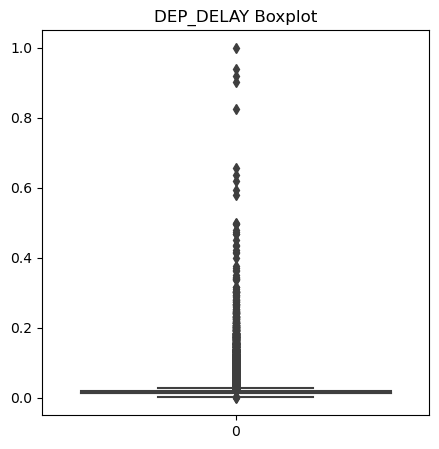

<Figure size 640x480 with 0 Axes>

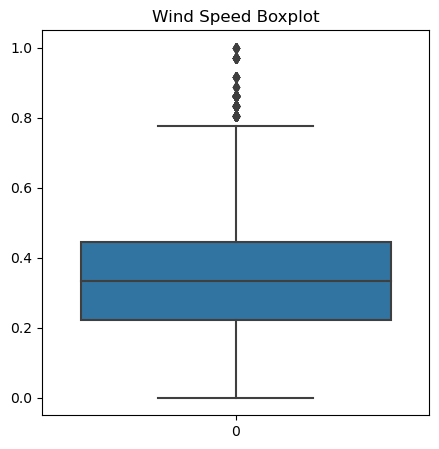

<Figure size 640x480 with 0 Axes>

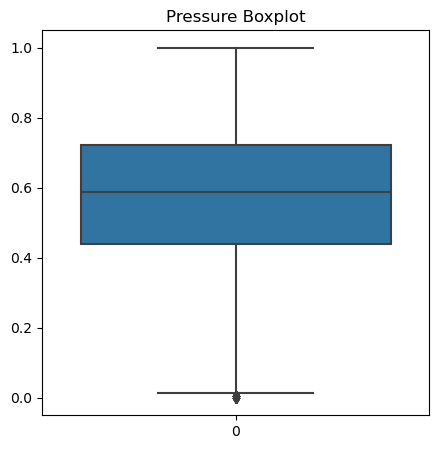

In [92]:
for col in scaled_skewed:
    plt.figure(col)
    plt.figure(figsize = (5,5))
    sns.boxplot(scaled_data[col]).set(title = f'{col} Boxplot')

**step 1**: find IQR

In [93]:
iqr_dict = {}
for col in scaled_skewed:
    print(f'{col} IQR')
    Q1 = scaled_data[col].quantile(0.25)
    Q3 = scaled_data[col].quantile(0.75)
    print('Q1:', Q1)
    print('Q3:', Q3, '\n')
    iqr_dict[col] = [Q1, Q3]
iqr_dict

DEP_DELAY IQR
Q1: 0.012326656394453003
Q3: 0.01848998459167951 

Wind Speed IQR
Q1: 0.2222222222222222
Q3: 0.4444444444444444 

Pressure IQR
Q1: 0.43870967741935374
Q3: 0.7225806451612904 



{'DEP_DELAY': [0.012326656394453003, 0.01848998459167951],
 'Wind Speed': [0.2222222222222222, 0.4444444444444444],
 'Pressure': [0.43870967741935374, 0.7225806451612904]}

**step 2**: find upper and lower bounds

In [94]:
scaled_skewed_bounds_dict = {}

for col,iqr in iqr_dict.items():
    lower_bound = round(iqr[1] - 1.5*(iqr[1] - iqr[0]),2)
    upper_bound = round(iqr[1] + 1.5*(iqr[1] - iqr[0]),2)
    print(f'{col}\nlower bound:', lower_bound)
    print('upper bound:', upper_bound, '\n')
    scaled_skewed_bounds_dict[col] = [lower_bound, upper_bound]
    
scaled_skewed_bounds_dict

DEP_DELAY
lower bound: 0.01
upper bound: 0.03 

Wind Speed
lower bound: 0.11
upper bound: 0.78 

Pressure
lower bound: 0.3
upper bound: 1.15 



{'DEP_DELAY': [0.01, 0.03],
 'Wind Speed': [0.11, 0.78],
 'Pressure': [0.3, 1.15]}

**step 3**: find outliers

In [95]:
# bound[0] lower limit, bound[1] upper limit
for col, bound in scaled_skewed_bounds_dict.items():
    scaled_data[scaled_data[col] < bound[0]]
    scaled_data[scaled_data[col] > bound[1]]

**step 4**: trim outliers

In [96]:
for col, bound in scaled_skewed_bounds_dict.items():
    print(f'trimmed {col}\nrows above lower bound:', (scaled_data[scaled_data[col] > bound[0]]).shape[0])
    print('rows below upper bound:', (scaled_data[scaled_data[col] < bound[1]]).shape[0], '\n')
   
trimmed_DEP_DELAY = scaled_data[(scaled_data['DEP_DELAY'] > 0.01) & (scaled_data['DEP_DELAY'] < 0.03)]
trimmed_WindSpeed = scaled_data[(scaled_data['Wind Speed'] > 0.11) & (scaled_data['Wind Speed'] < 0.78)]
trimmed_Pressure = scaled_data[(scaled_data['Pressure'] > 0.3) & (scaled_data['Pressure'] < 1.15)]

trimmed DEP_DELAY
rows above lower bound: 27305
rows below upper bound: 25072 

trimmed Wind Speed
rows above lower bound: 27057
rows below upper bound: 28496 

trimmed Pressure
rows above lower bound: 26720
rows below upper bound: 28820 



**step 5**: compare plots after trimming outliers

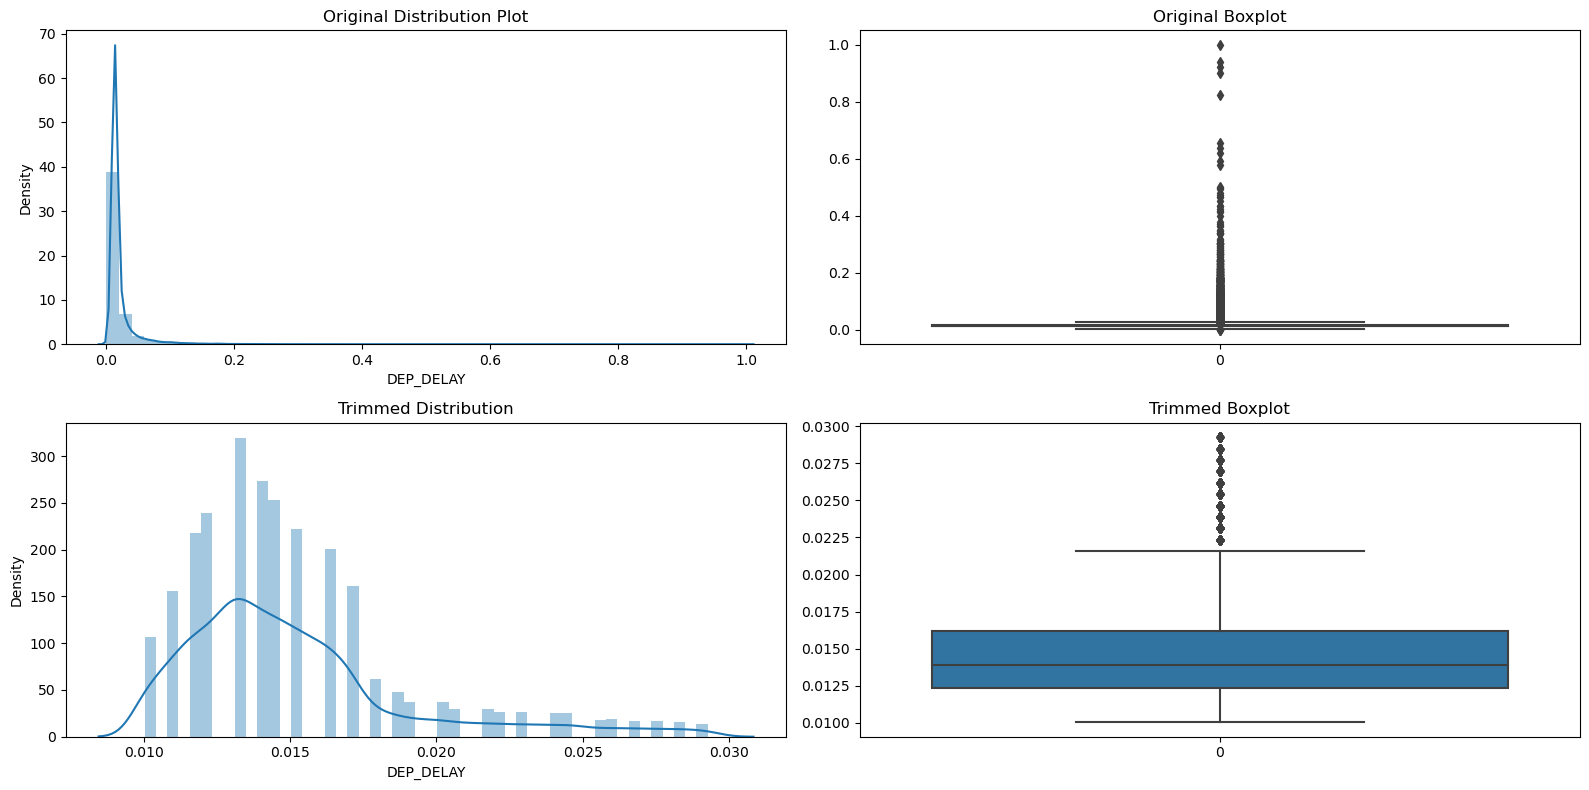

In [97]:
# DEP_DELAY
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(scaled_data['DEP_DELAY']).set(title = 'Original Distribution Plot')
plt.subplot(2,2,2)
sns.boxplot(scaled_data['DEP_DELAY']).set(title = 'Original Boxplot')
plt.subplot(2,2,3)
sns.distplot(trimmed_DEP_DELAY['DEP_DELAY']).set(title = 'Trimmed Distribution')
plt.subplot(2,2,4)
sns.boxplot(trimmed_DEP_DELAY['DEP_DELAY']).set(title = 'Trimmed Boxplot')
plt.tight_layout()

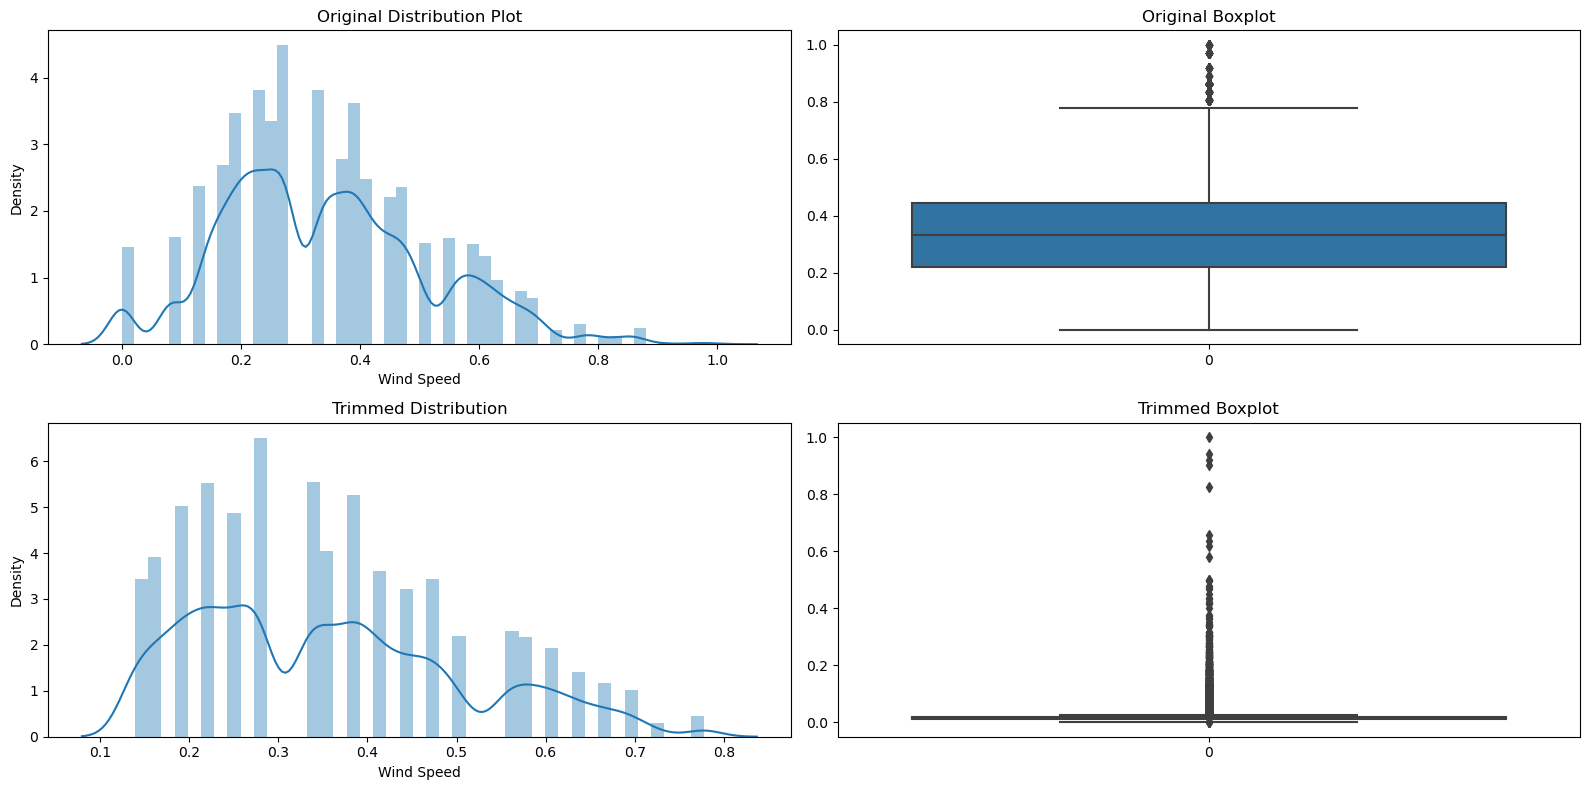

In [98]:
# Wind Speed
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(scaled_data['Wind Speed']).set(title = 'Original Distribution Plot')
plt.subplot(2,2,2)
sns.boxplot(scaled_data['Wind Speed']).set(title = 'Original Boxplot')
plt.subplot(2,2,3)
sns.distplot(trimmed_WindSpeed['Wind Speed']).set(title = 'Trimmed Distribution')
plt.subplot(2,2,4)
sns.boxplot(trimmed_WindSpeed['DEP_DELAY']).set(title = 'Trimmed Boxplot')
plt.tight_layout()

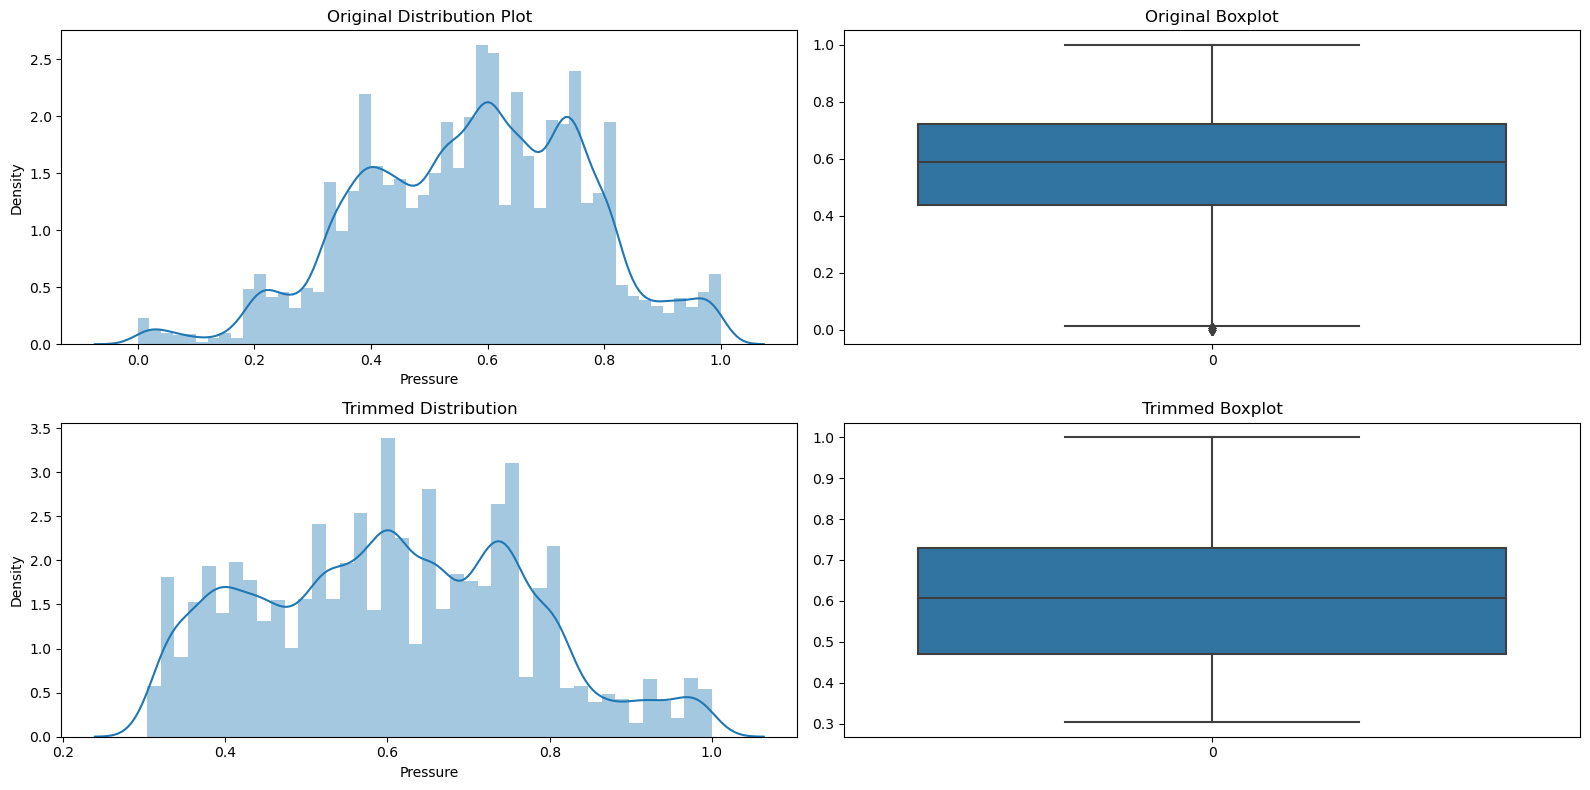

In [99]:
# Pressure
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(scaled_data['Pressure']).set(title = 'Original Distribution Plot')
plt.subplot(2,2,2)
sns.boxplot(scaled_data['Pressure']).set(title = 'Original Boxplot')
plt.subplot(2,2,3)
sns.distplot(trimmed_Pressure['Pressure']).set(title = 'Trimmed Distribution')
plt.subplot(2,2,4)
sns.boxplot(trimmed_Pressure['Pressure']).set(title = 'Trimmed Boxplot')
plt.tight_layout()

**step 6**: cap

In [100]:
trimmed_DEP_DELAY_cap = scaled_data.copy()
trimmed_DEP_DELAY_cap['DEP_DELAY'] = np.where(
                                        trimmed_DEP_DELAY_cap['DEP_DELAY'] > 0.03, 
                                        0.03, 
                                        np.where(trimmed_DEP_DELAY_cap['DEP_DELAY'] < 0.01, 
                                        0.01, trimmed_DEP_DELAY_cap['DEP_DELAY'])
                                        )
    
trimmed_WindSpeed_cap = scaled_data.copy()
trimmed_WindSpeed_cap['Wind Speed'] = np.where(
                                        trimmed_WindSpeed_cap['Wind Speed'] > 0.78, 
                                        0.78, 
                                        np.where(trimmed_WindSpeed_cap['Wind Speed'] < 0.11, 
                                        0.11, trimmed_WindSpeed_cap['Wind Speed'])
                                        )
    
trimmed_Pressure_cap = scaled_data.copy()
trimmed_Pressure_cap['Pressure'] = np.where(
                                        trimmed_Pressure_cap['Pressure'] > 1.15, 
                                        1.15, 
                                        np.where(trimmed_Pressure_cap['Pressure'] < 0.3, 
                                        0.3, trimmed_Pressure_cap['Pressure'])
                                        )

**step 7**: compare plots after capping

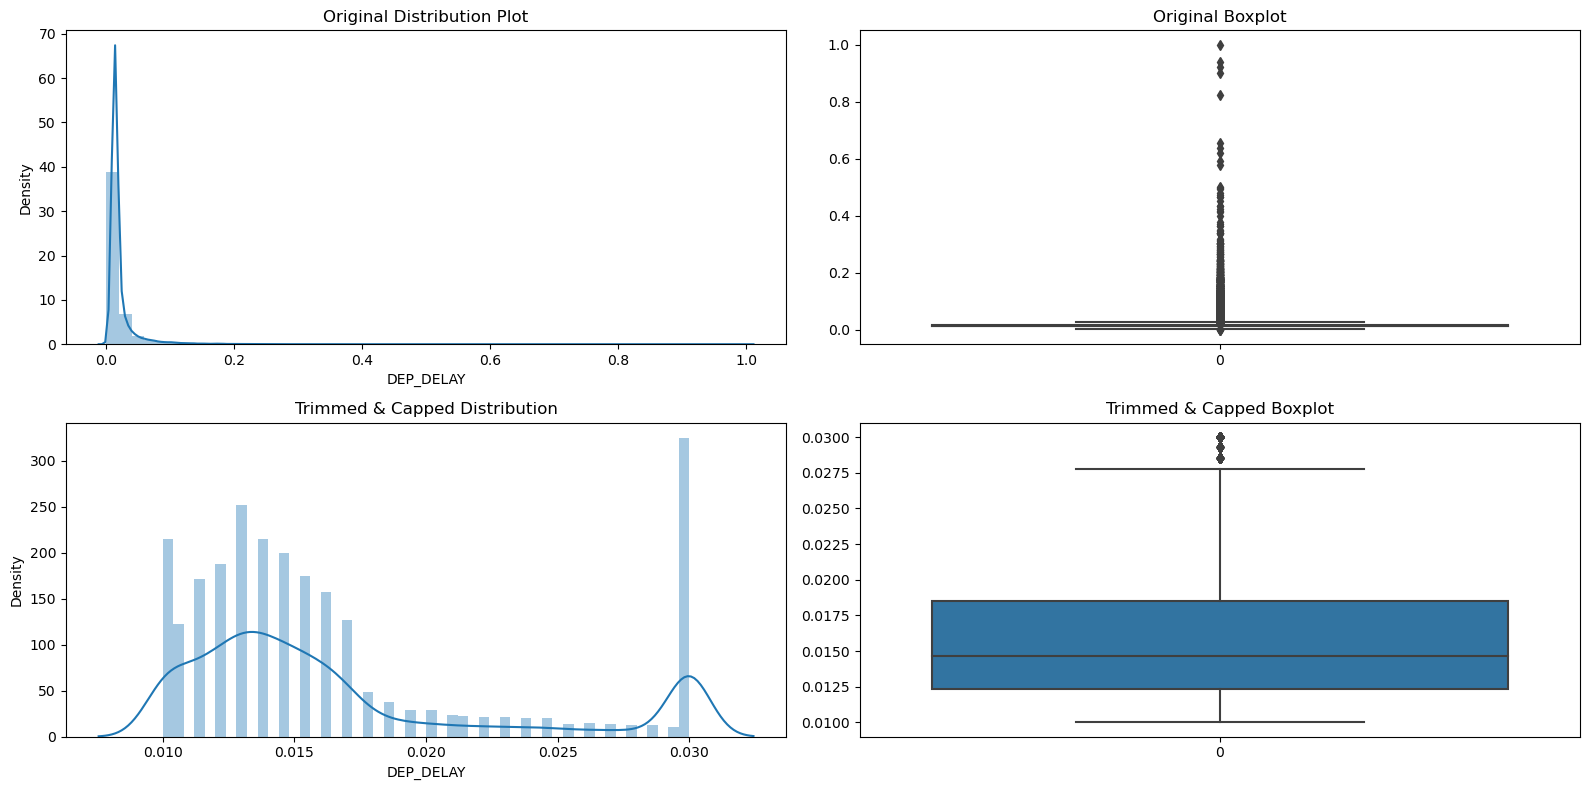

In [101]:
# DEP_DELAY
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(scaled_data['DEP_DELAY']).set(title = 'Original Distribution Plot')
plt.subplot(2,2,2)
sns.boxplot(scaled_data['DEP_DELAY']).set(title = 'Original Boxplot')
plt.subplot(2,2,3)
sns.distplot(trimmed_DEP_DELAY_cap['DEP_DELAY']).set(title = 'Trimmed & Capped Distribution')
plt.subplot(2,2,4)
sns.boxplot(trimmed_DEP_DELAY_cap['DEP_DELAY']).set(title = 'Trimmed & Capped Boxplot')
plt.tight_layout()

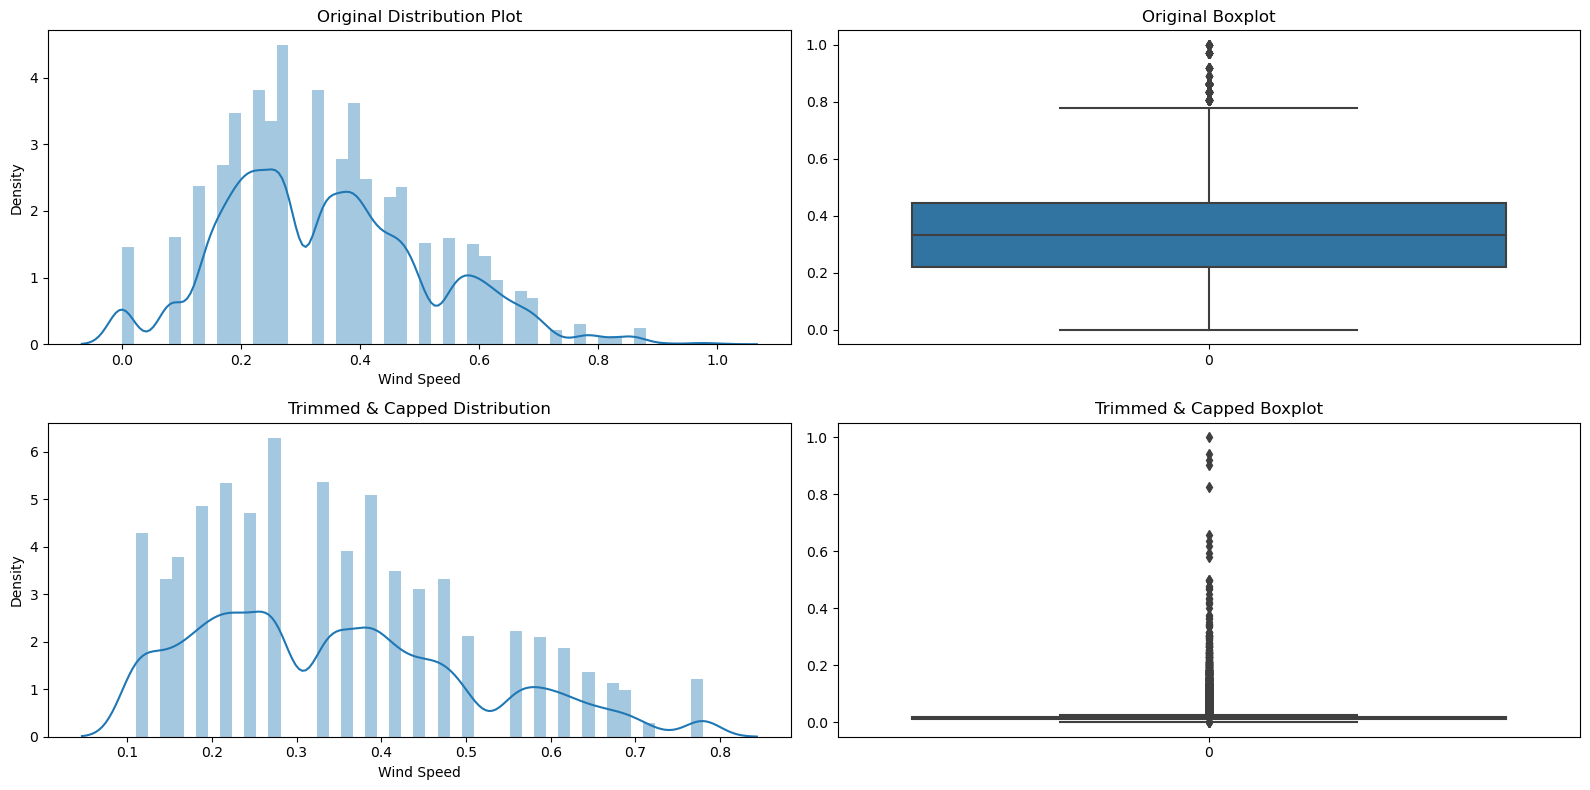

In [102]:
# Wind Speed
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(scaled_data['Wind Speed']).set(title = 'Original Distribution Plot')
plt.subplot(2,2,2)
sns.boxplot(scaled_data['Wind Speed']).set(title = 'Original Boxplot')
plt.subplot(2,2,3)
sns.distplot(trimmed_WindSpeed_cap['Wind Speed']).set(title = 'Trimmed & Capped Distribution')
plt.subplot(2,2,4)
sns.boxplot(trimmed_WindSpeed_cap['DEP_DELAY']).set(title = 'Trimmed & Capped Boxplot')
plt.tight_layout()

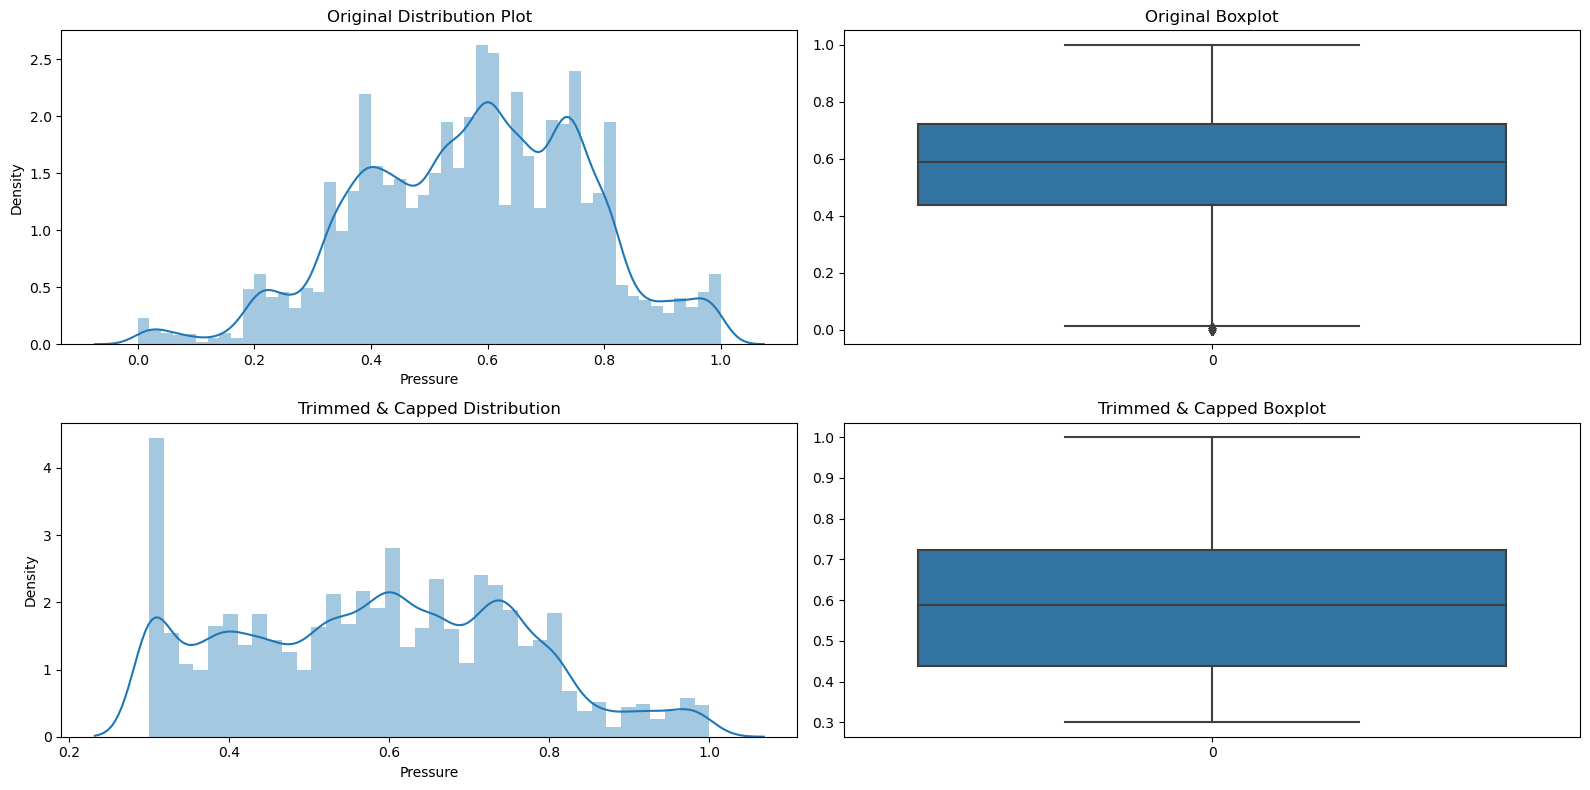

In [103]:
# Pressure
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(scaled_data['Pressure']).set(title = 'Original Distribution Plot')
plt.subplot(2,2,2)
sns.boxplot(scaled_data['Pressure']).set(title = 'Original Boxplot')
plt.subplot(2,2,3)
sns.distplot(trimmed_Pressure_cap['Pressure']).set(title = 'Trimmed & Capped Distribution')
plt.subplot(2,2,4)
sns.boxplot(trimmed_Pressure_cap['Pressure']).set(title = 'Trimmed & Capped Boxplot')
plt.tight_layout()

### method 3: percentile rule (outside of 99%) 
### other distributions

Can use for bi/multi-modal distributions

features: 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Humidity', 'Wind', 'Wind Gust', 'sch_dep', 'sch_arr'

**get_dummies for 'OP_UNIQUE_CARRIER' and 'Condition' flat everywhere except high at 0, and low at 1. Can't really use mean to find boundaries for outliers.**

<Figure size 640x480 with 0 Axes>

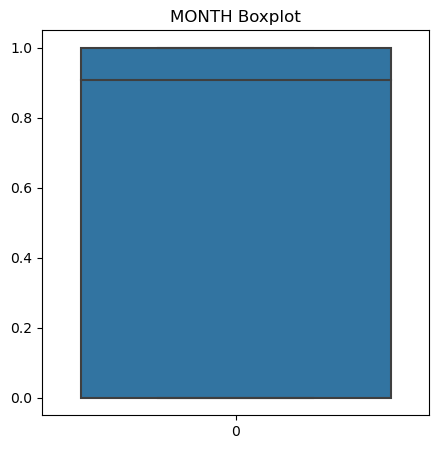

<Figure size 640x480 with 0 Axes>

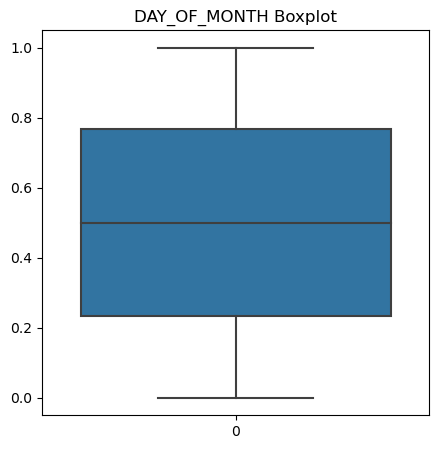

<Figure size 640x480 with 0 Axes>

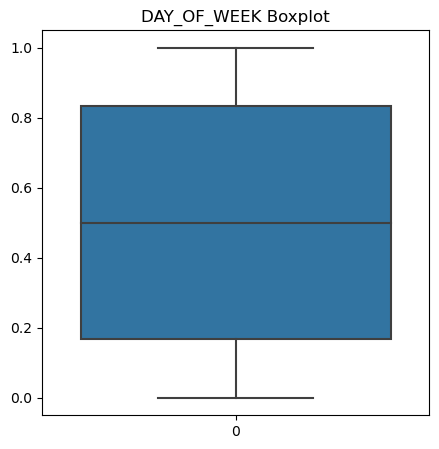

<Figure size 640x480 with 0 Axes>

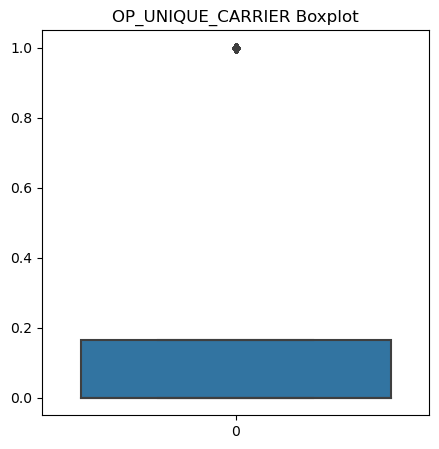

<Figure size 640x480 with 0 Axes>

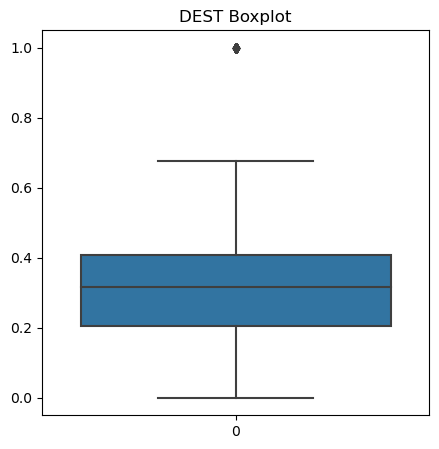

<Figure size 640x480 with 0 Axes>

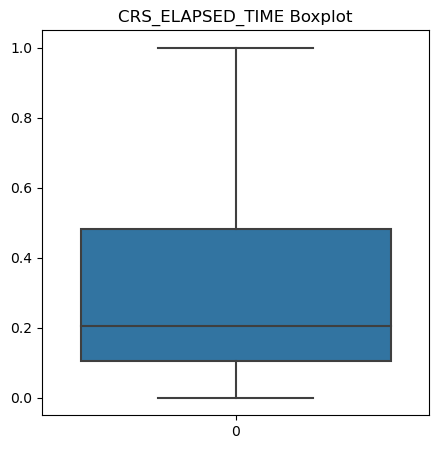

<Figure size 640x480 with 0 Axes>

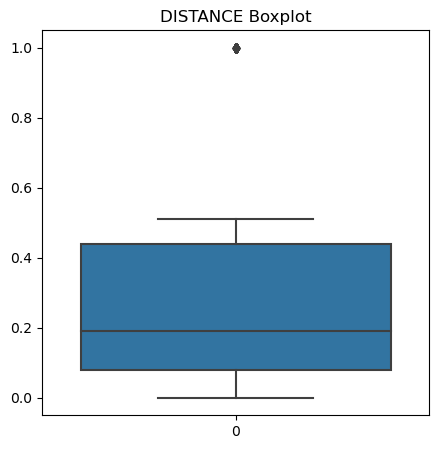

<Figure size 640x480 with 0 Axes>

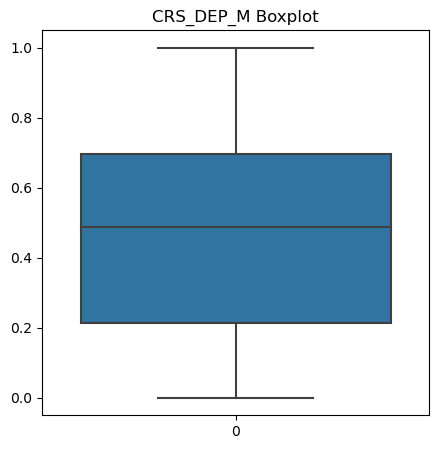

<Figure size 640x480 with 0 Axes>

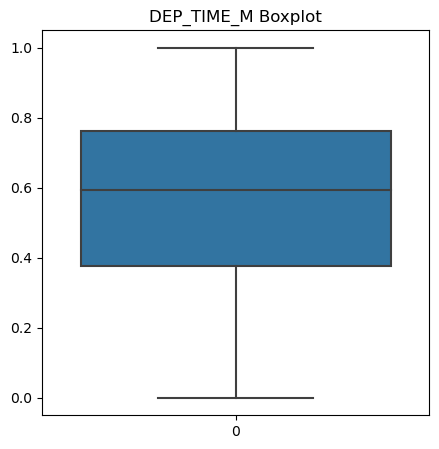

<Figure size 640x480 with 0 Axes>

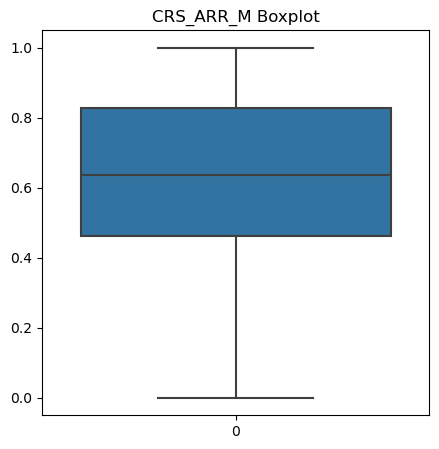

<Figure size 640x480 with 0 Axes>

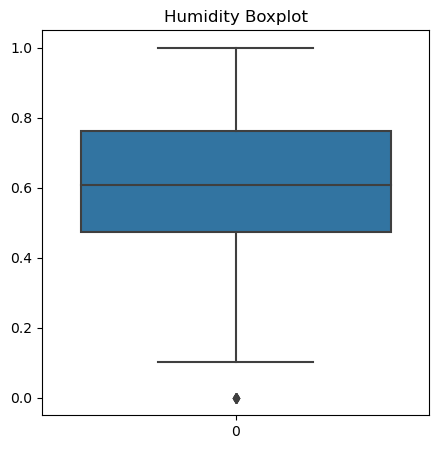

<Figure size 640x480 with 0 Axes>

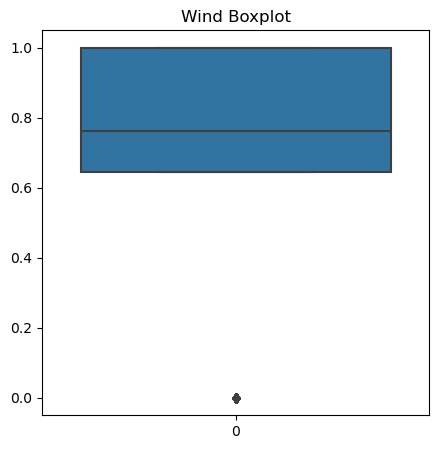

<Figure size 640x480 with 0 Axes>

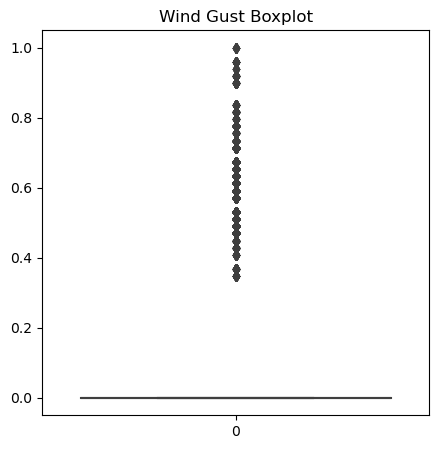

<Figure size 640x480 with 0 Axes>

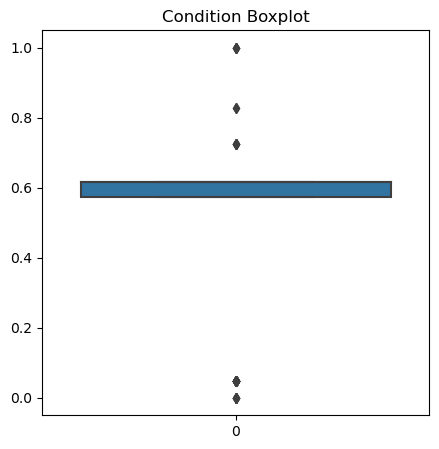

<Figure size 640x480 with 0 Axes>

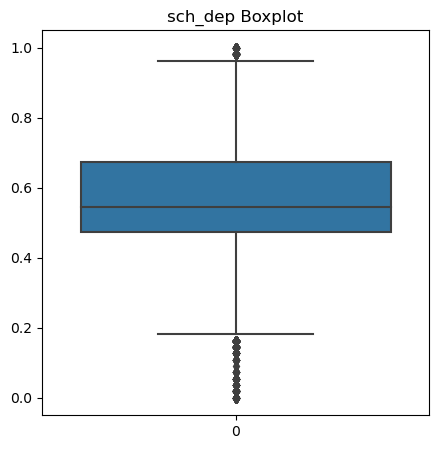

<Figure size 640x480 with 0 Axes>

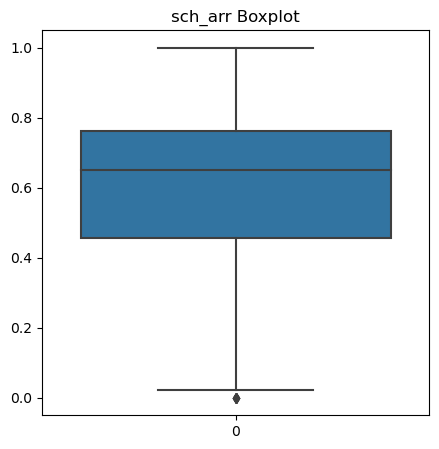

In [104]:
for col in scaled_other:
    plt.figure(col)
    plt.figure(figsize = (5,5))
    sns.boxplot(scaled_data[col]).set(title = f'{col} Boxplot')

**step 1**: find upper and lower bounds

In [105]:
limit_dict = {}
for col in scaled_other:
    print(f'{col} IQR')
    Q1 = scaled_data[col].quantile(0.01)
    Q3 = scaled_data[col].quantile(0.99)
    print('Q1:', Q1)
    print('Q3:', Q3, '\n')
    limit_dict[col] = [Q1, Q3]

MONTH IQR
Q1: 0.0
Q3: 0.9999999999999999 

DAY_OF_MONTH IQR
Q1: 0.0
Q3: 0.9999999999999999 

DAY_OF_WEEK IQR
Q1: 0.0
Q3: 0.9999999999999999 

OP_UNIQUE_CARRIER IQR
Q1: 0.0
Q3: 1.0 

DEST IQR
Q1: 0.0357370971008395
Q3: 0.676523308443671 

CRS_ELAPSED_TIME IQR
Q1: 0.020312499999999997
Q3: 0.5609375 

DISTANCE IQR
Q1: 0.018408672530169774
Q3: 0.5097156882798118 

CRS_DEP_M IQR
Q1: 0.03427065026362042
Q3: 0.9481546572934973 

DEP_TIME_M IQR
Q1: 0.20847810979847115
Q3: 0.9638637943015983 

CRS_ARR_M IQR
Q1: 0.011821974965229484
Q3: 0.9951321279554937 

Humidity IQR
Q1: 0.10309278350515463
Q3: 1.0 

Wind IQR
Q1: 0.0
Q3: 1.0 

Wind Gust IQR
Q1: 0.0
Q3: 0.8163265306122448 

Condition IQR
Q1: 0.0
Q3: 1.0 

sch_dep IQR
Q1: 0.14545454545454545
Q3: 0.9636363636363636 

sch_arr IQR
Q1: 0.2826086956521739
Q3: 0.9565217391304348 



**step 2**: apply trimming

In [106]:
trimmed_data = {}
num = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
for col, limit in limit_dict.items():
    for i in range(0, len(num)):
        trimmed_data[i] = scaled_data[(scaled_data[col] <= limit[1]) & (scaled_data[col] >= limit[0])]
trimmed_data

{0:        TAIL_NUM  Temperature  Dew Point  DEP_DELAY  Wind Speed  Pressure  \
 0     -0.248589     0.809381   0.290663   0.016179    0.694444  0.425806   
 1     -0.410592     0.809381   0.290663   0.011556    0.694444  0.425806   
 2     -0.878679     0.809381   0.290663   0.047766    0.694444  0.425806   
 3     -0.773290     0.809381   0.290663   0.015408    0.694444  0.425806   
 4     -0.083951     0.560729   0.128244   0.013867    0.666667  0.458065   
 ...         ...          ...        ...        ...         ...       ...   
 28815 -0.225216    -0.309550   0.615500   0.018490    0.166667  0.632258   
 28816 -0.096771    -0.309550   0.615500   0.018490    0.166667  0.632258   
 28817  1.046167    -0.309550   0.615500   0.234977    0.166667  0.632258   
 28818  0.351369    -0.309550   0.615500   0.020801    0.166667  0.632258   
 28819 -0.644804    -0.309550   0.615500   0.016179    0.166667  0.632258   
 
           MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ...  CR

In [107]:
trimmed_var = {}
for num, df in trimmed_data.items():
    trimmed_var[num] = df

trimmed_var

{0:        TAIL_NUM  Temperature  Dew Point  DEP_DELAY  Wind Speed  Pressure  \
 0     -0.248589     0.809381   0.290663   0.016179    0.694444  0.425806   
 1     -0.410592     0.809381   0.290663   0.011556    0.694444  0.425806   
 2     -0.878679     0.809381   0.290663   0.047766    0.694444  0.425806   
 3     -0.773290     0.809381   0.290663   0.015408    0.694444  0.425806   
 4     -0.083951     0.560729   0.128244   0.013867    0.666667  0.458065   
 ...         ...          ...        ...        ...         ...       ...   
 28815 -0.225216    -0.309550   0.615500   0.018490    0.166667  0.632258   
 28816 -0.096771    -0.309550   0.615500   0.018490    0.166667  0.632258   
 28817  1.046167    -0.309550   0.615500   0.234977    0.166667  0.632258   
 28818  0.351369    -0.309550   0.615500   0.020801    0.166667  0.632258   
 28819 -0.644804    -0.309550   0.615500   0.016179    0.166667  0.632258   
 
           MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ...  CR

In [108]:
# trimmed_MONTH = new_data[(new_data['MONTH'] <= 12.0) & (new_data['MONTH'] >= 1.0)]
# trimmed_DOM = new_data[(new_data['DAY_OF_MONTH'] <= 31.0) & (new_data['DAY_OF_MONTH'] >= 1.0)]
# trimmed_DOW = new_data[(new_data['DAY_OF_WEEK'] <= 7.0) & (new_data['DAY_OF_WEEK'] >= 1.0)]

# trimmed_OUC = new_data[(new_data['OP_UNIQUE_CARRIER'] <= 25.536453645364535) & 
#                        (new_data['OP_UNIQUE_CARRIER'] >= 19.55959954114089)]
# trimmed_DEST = new_data[(new_data['DEST'] <= 23.93846153846154) & (new_data['DEST'] >= 18.54471544715447)]

# trimmed_ELAPSED = new_data[(new_data['CRS_ELAPSED_TIME'] <= 416.0) & (new_data['CRS_ELAPSED_TIME'] >= 70.0)]
# trimmed_DIST = new_data[(new_data['DISTANCE'] <= 2586.0) & (new_data['DISTANCE'] >= 184.0)]
# trimmed_DEPM = new_data[(new_data['CRS_DEP_M'] <= 1380.0) & (new_data['CRS_DEP_M'] >= 340.0)]
# trimmed_DEPTIME = new_data[(new_data['DEP_TIME_M'] <= 1388.0) & (new_data['DEP_TIME_M'] >= 301.0)]
# trimmed_ARRM = new_data[(new_data['CRS_ARR_M'] <= 1432.0) & (new_data['CRS_ARR_M'] >= 18.0)]

# trimmed_Hum = new_data[(new_data['Humidity'] <= 97.0) & (new_data['Humidity'] >= 10.0)]
# trimmed_Wind = new_data[(new_data['Wind'] <= 23.173487544483987) & (new_data['Wind'] >= 19.51186440677966)]
# trimmed_Gust = new_data[(new_data['Wind Gust'] <= 40.0 ) & (new_data['Wind Gust'] >= 0.0)]

# trimmed_dep = new_data[(new_data['sch_dep'] <= 53.0) & (new_data['sch_dep'] >= 8.0)]
# trimmed_arr = new_data[(new_data['sch_arr'] <= 44.0) & (new_data['sch_arr'] >= 13.0)]

**step 3**: compare distribution and boxplot after trimming

<Figure size 640x480 with 0 Axes>

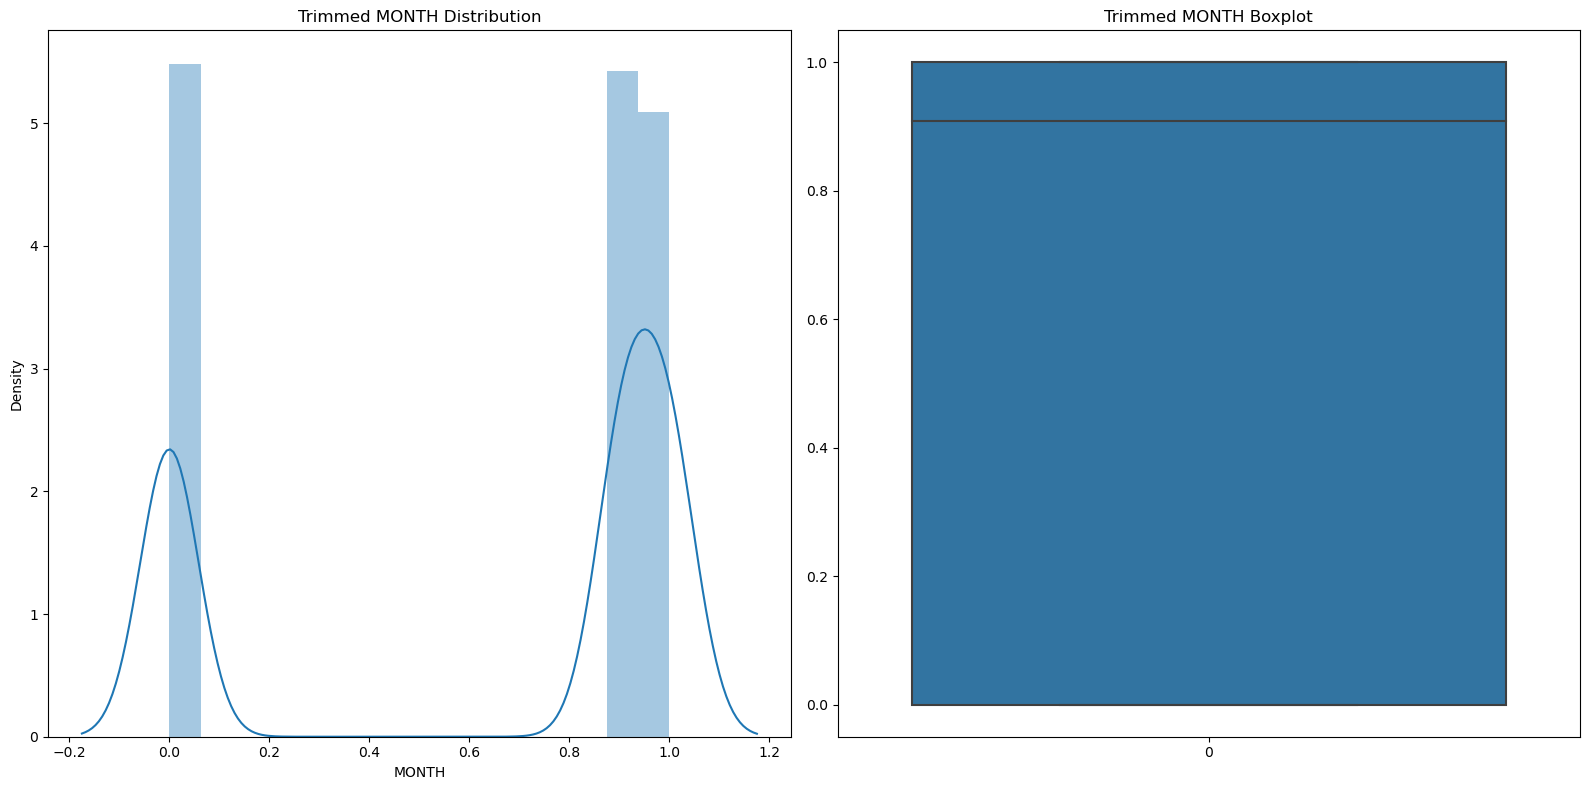

<Figure size 640x480 with 0 Axes>

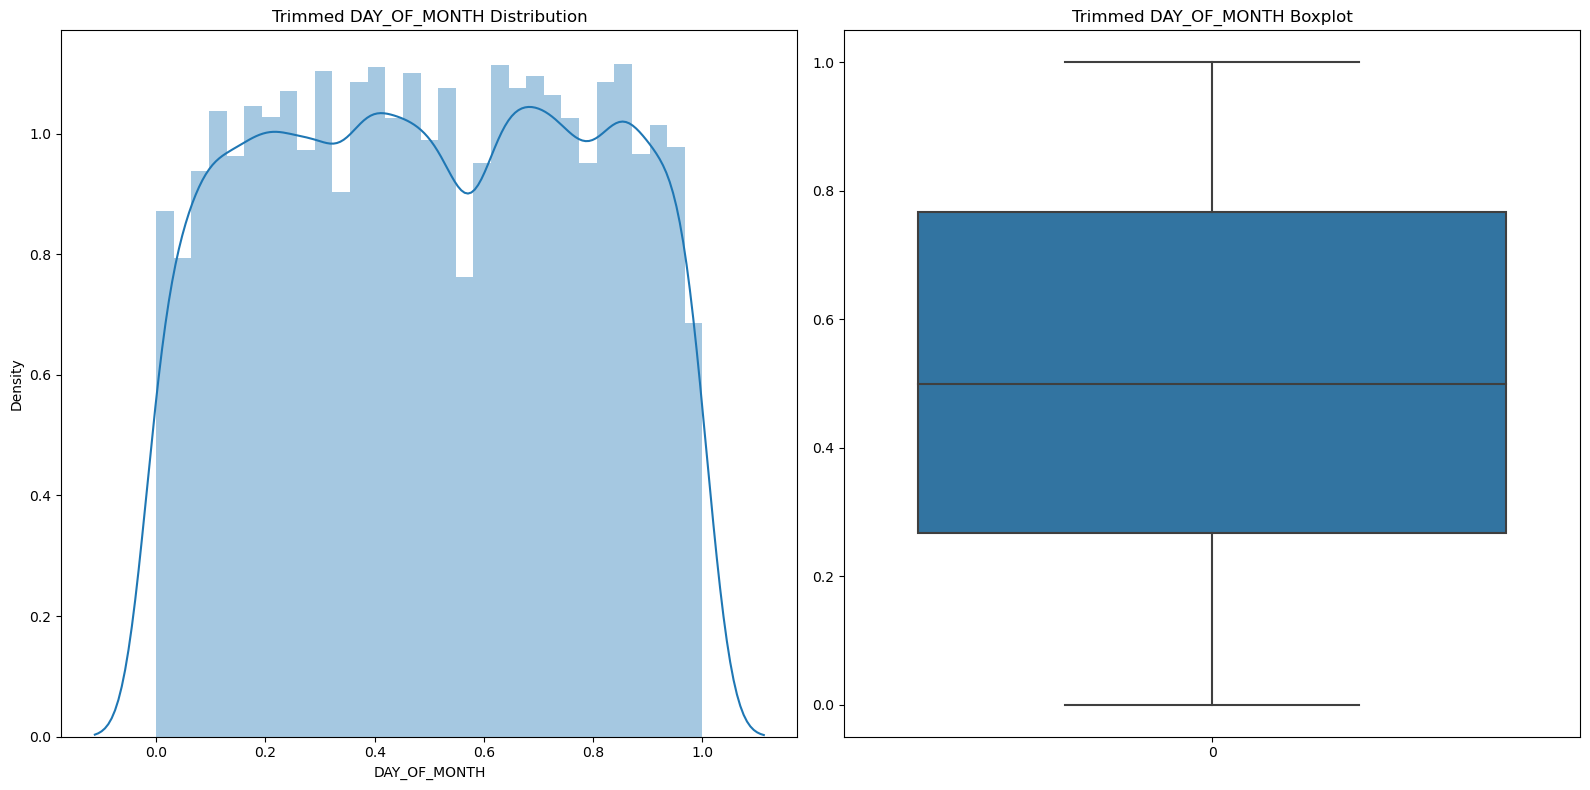

<Figure size 640x480 with 0 Axes>

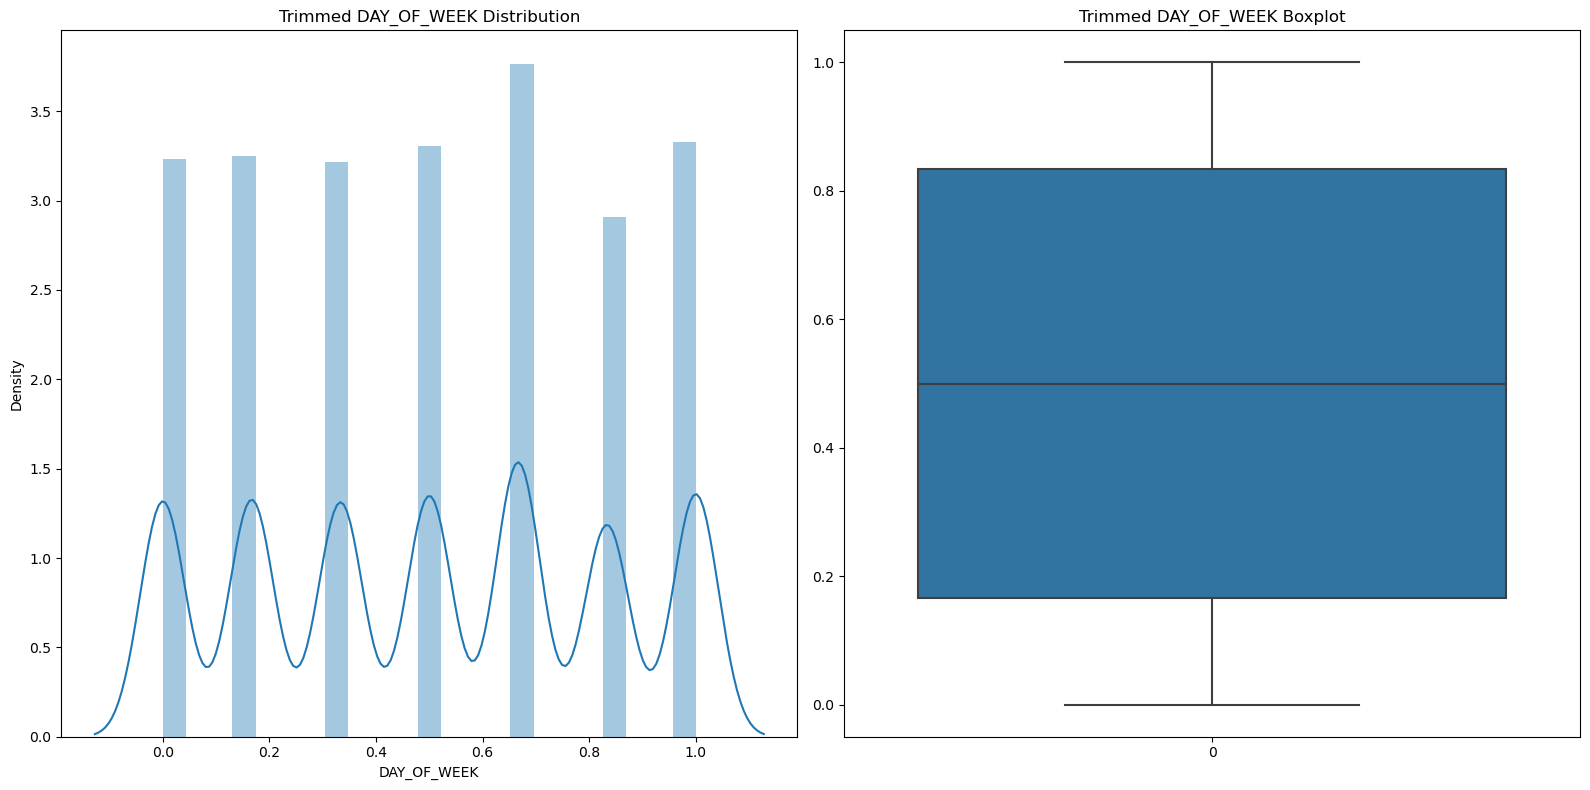

<Figure size 640x480 with 0 Axes>

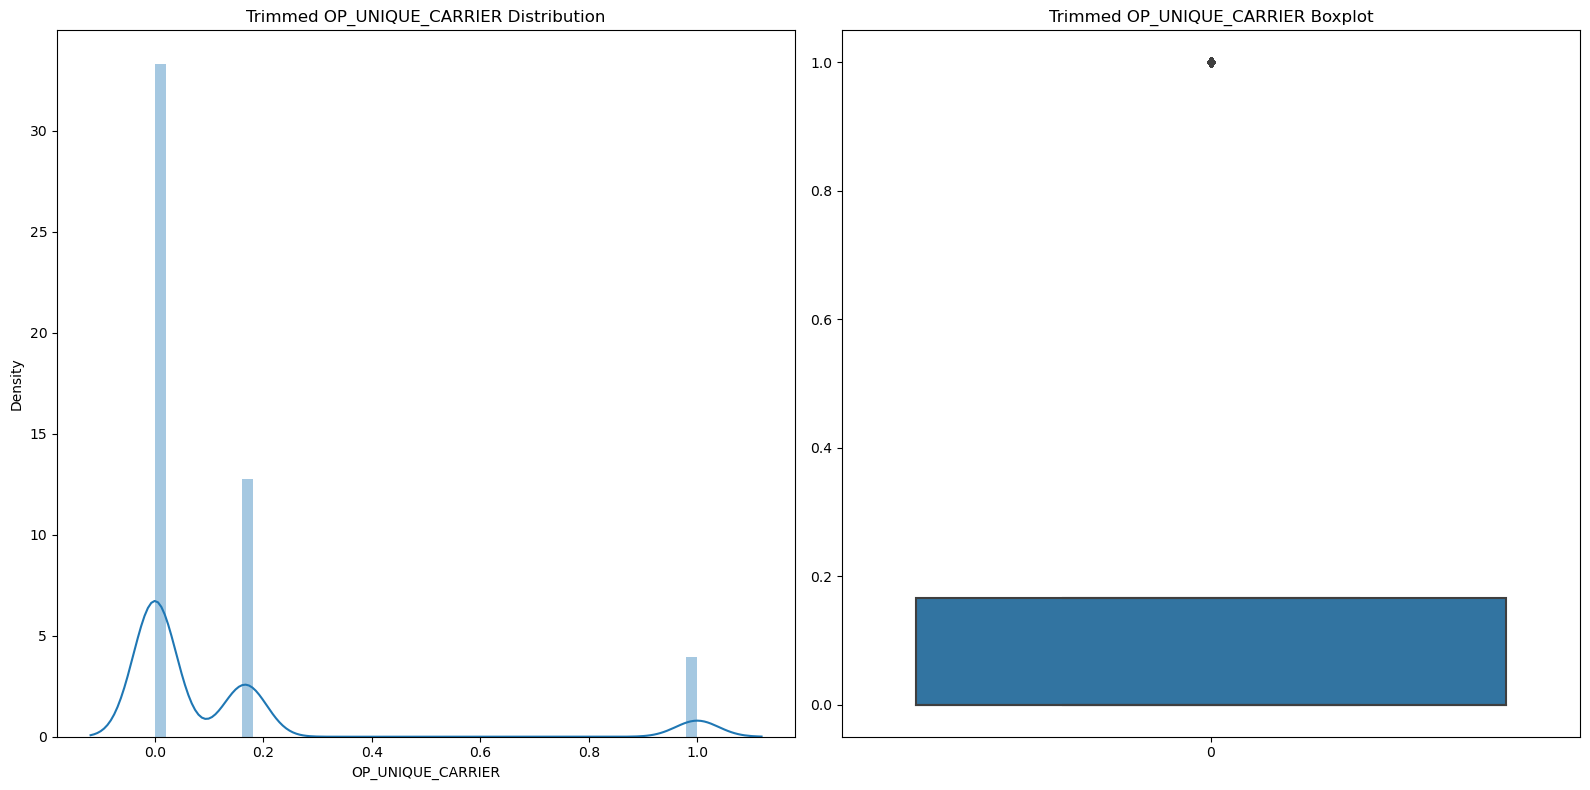

<Figure size 640x480 with 0 Axes>

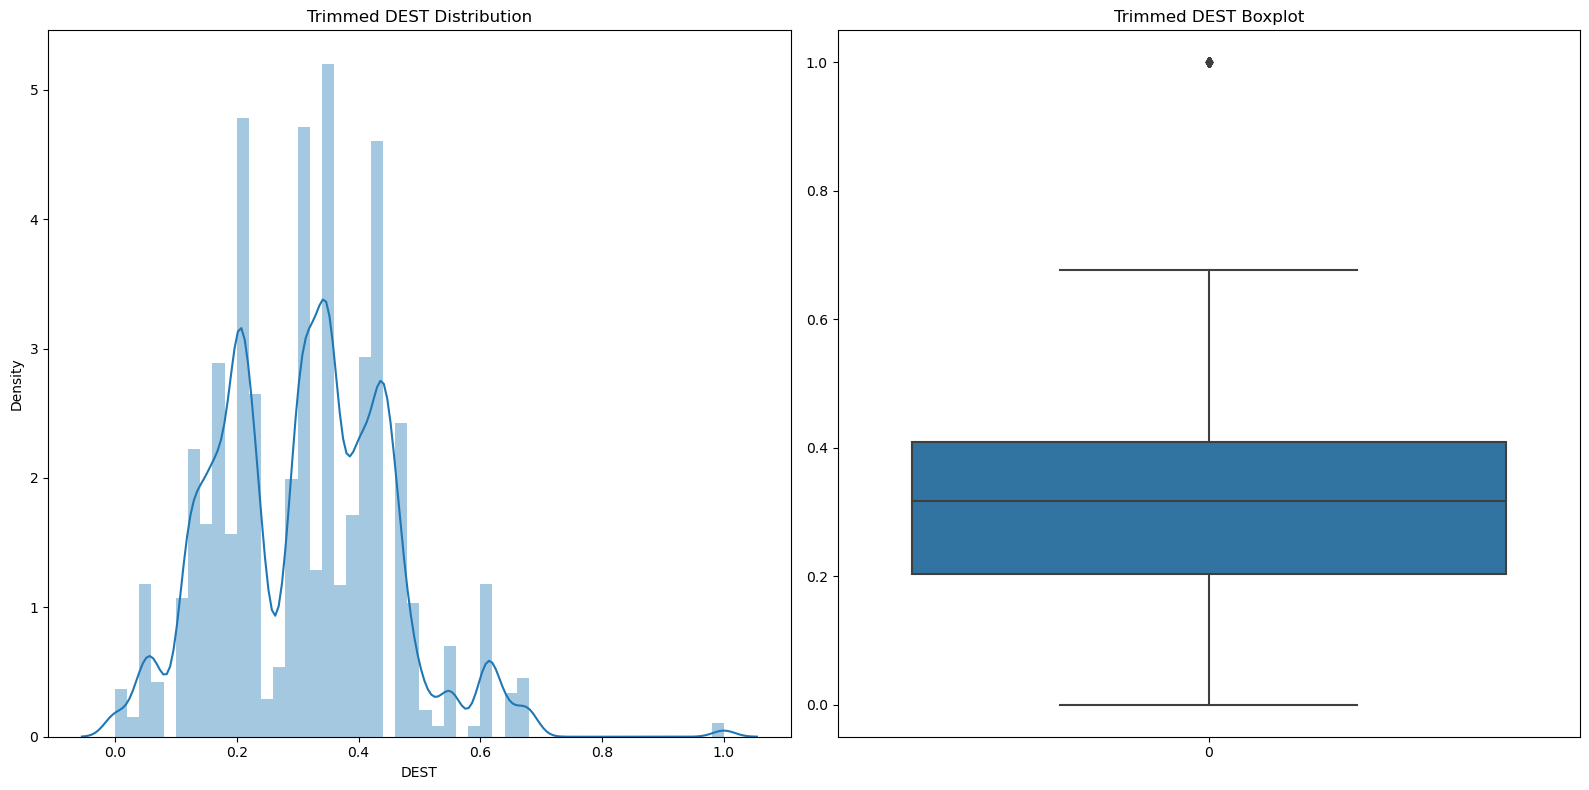

<Figure size 640x480 with 0 Axes>

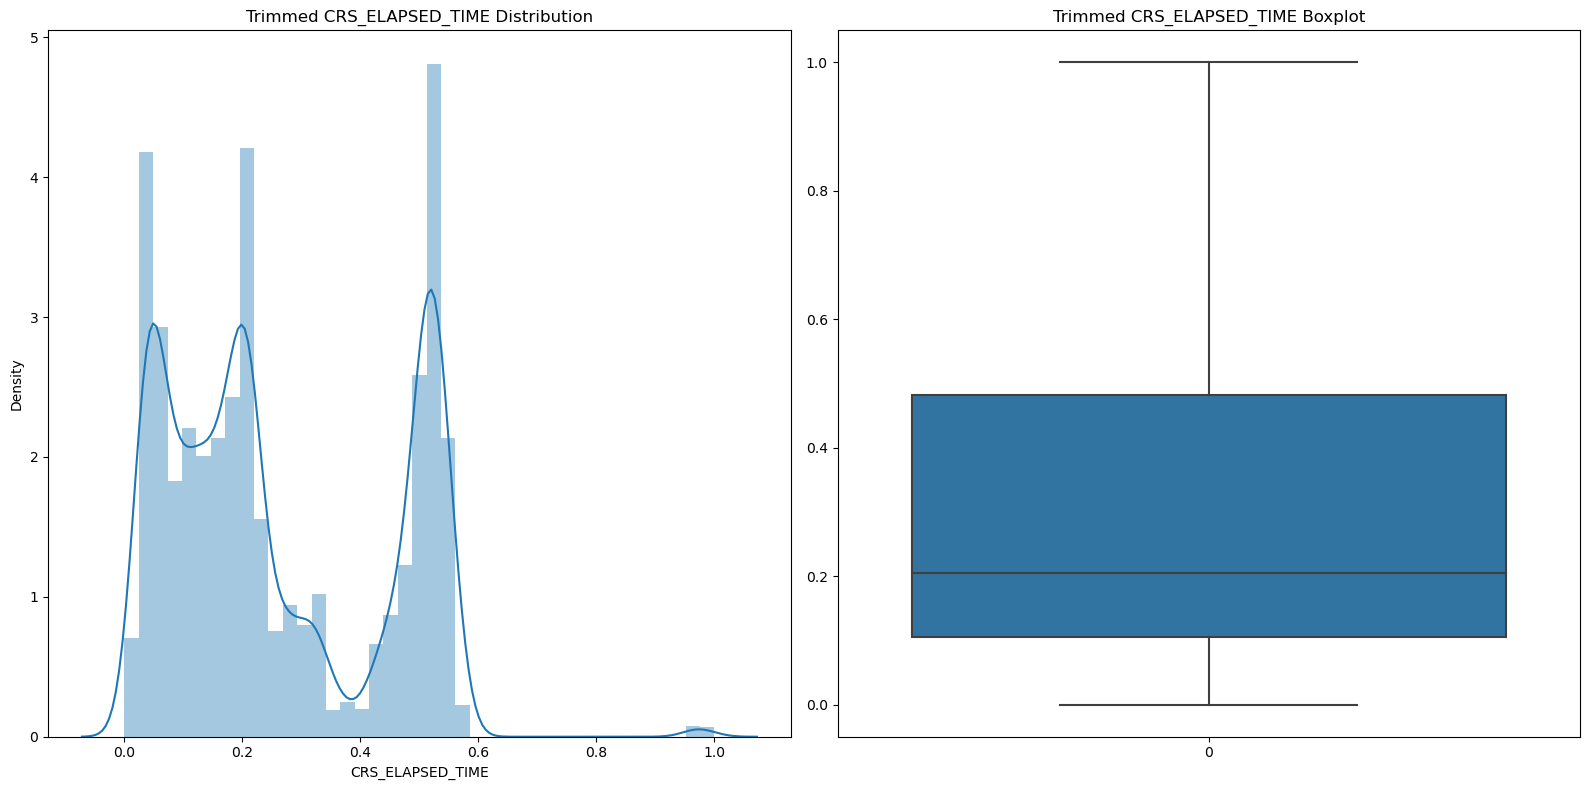

<Figure size 640x480 with 0 Axes>

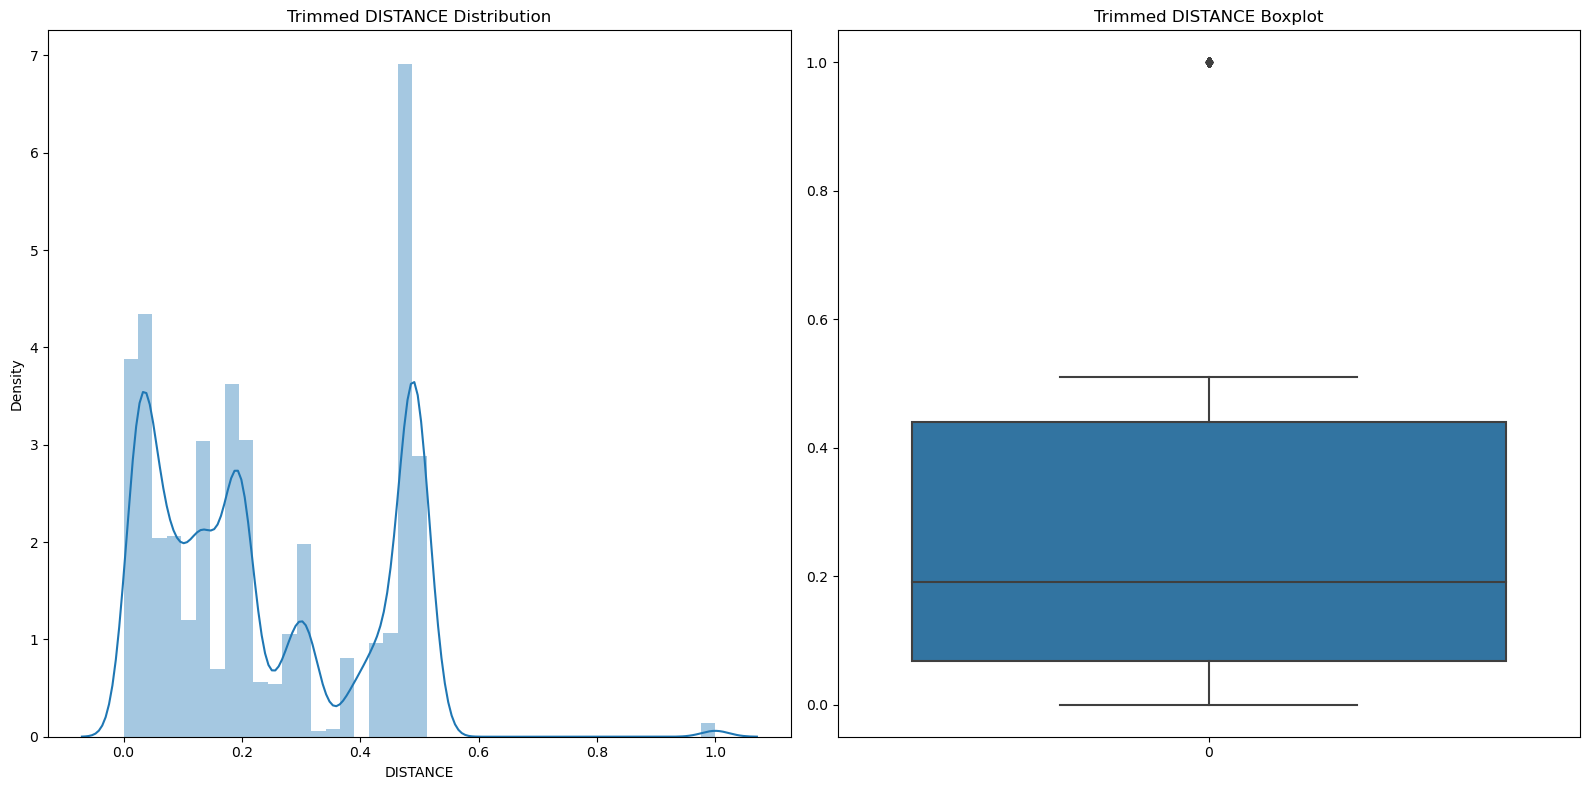

<Figure size 640x480 with 0 Axes>

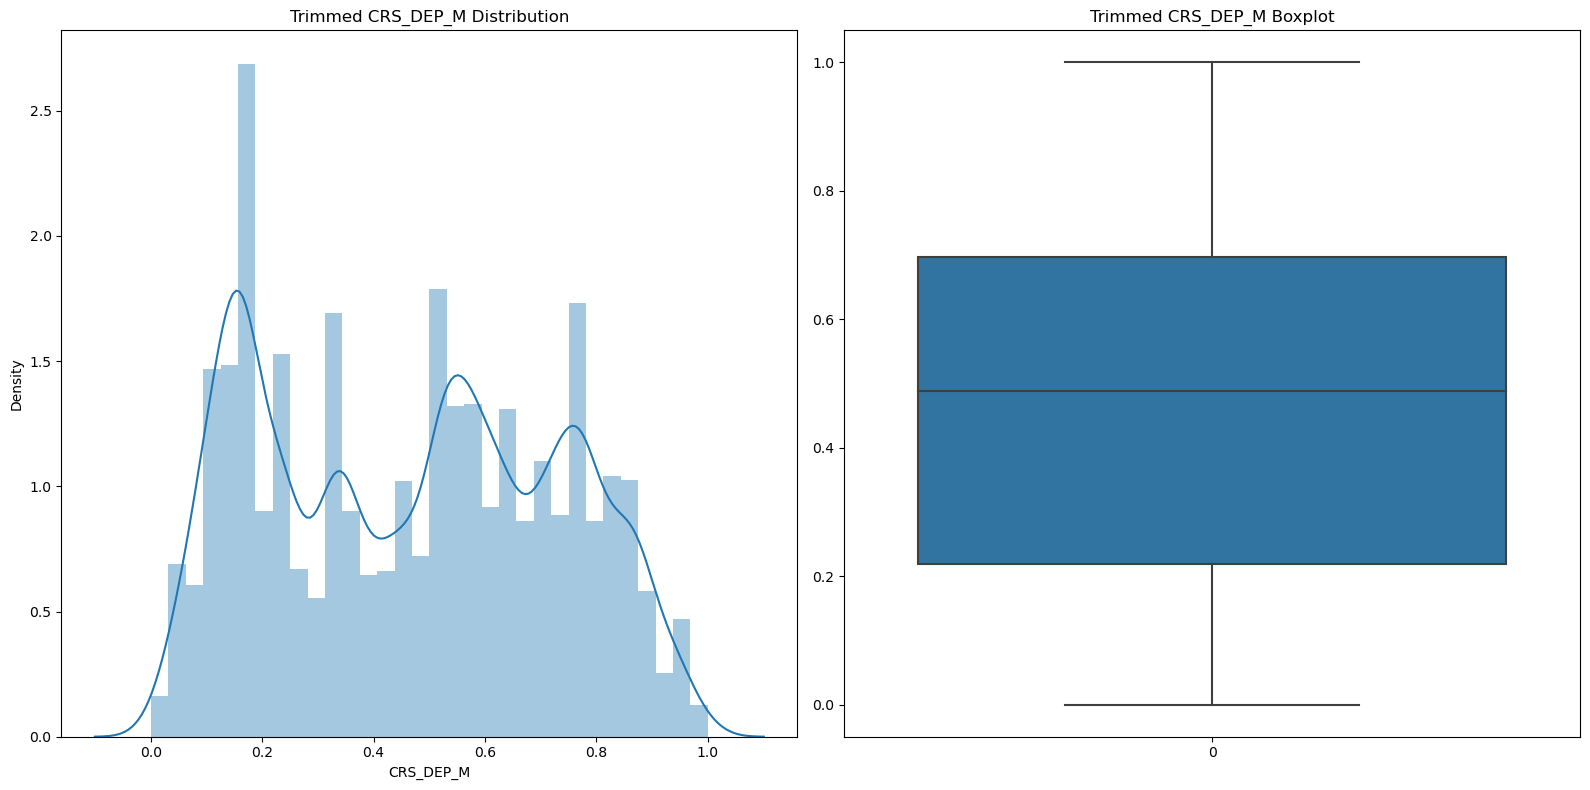

<Figure size 640x480 with 0 Axes>

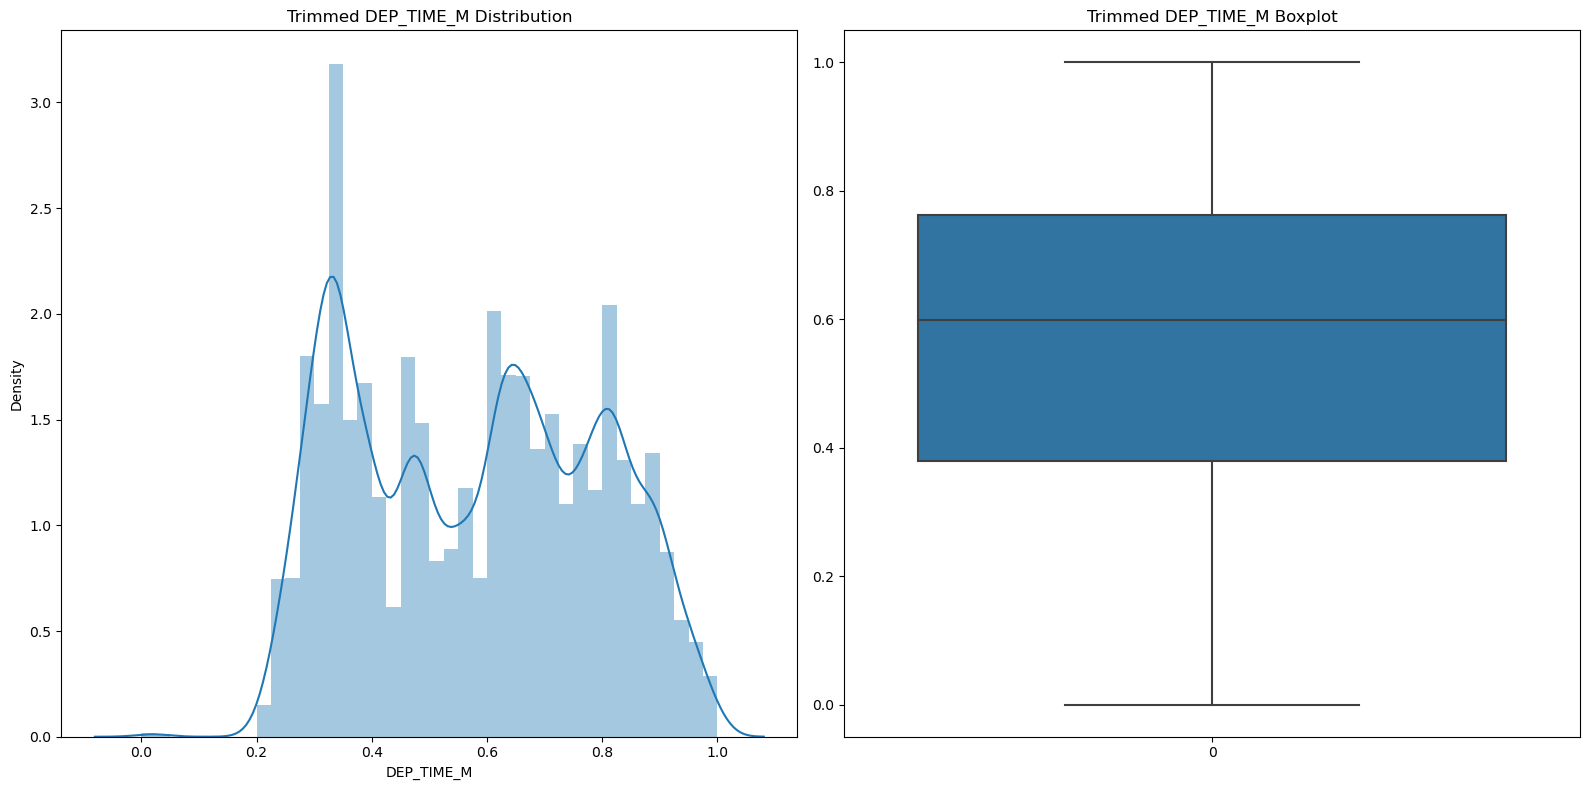

<Figure size 640x480 with 0 Axes>

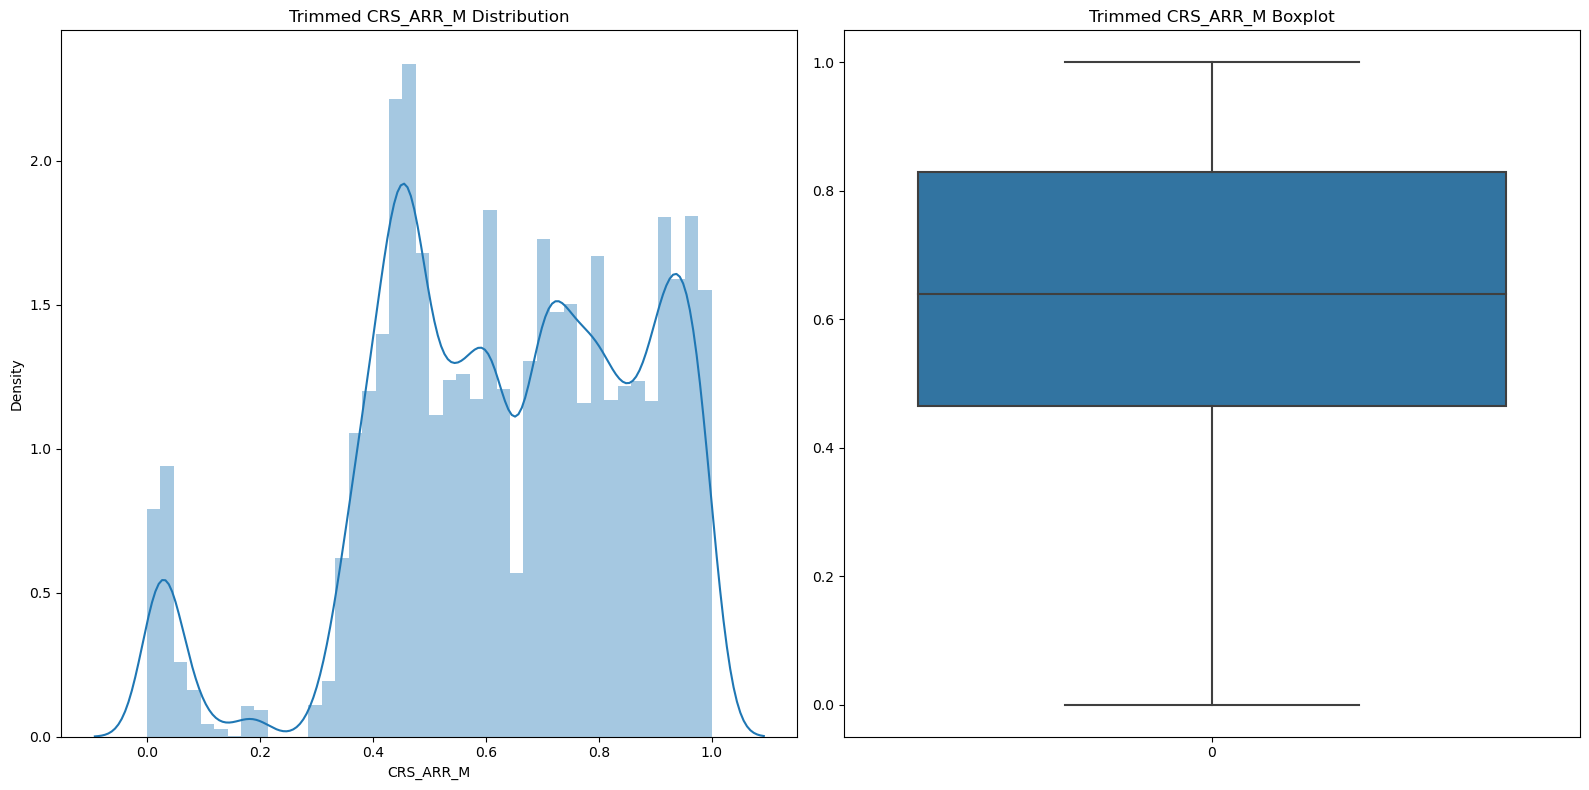

<Figure size 640x480 with 0 Axes>

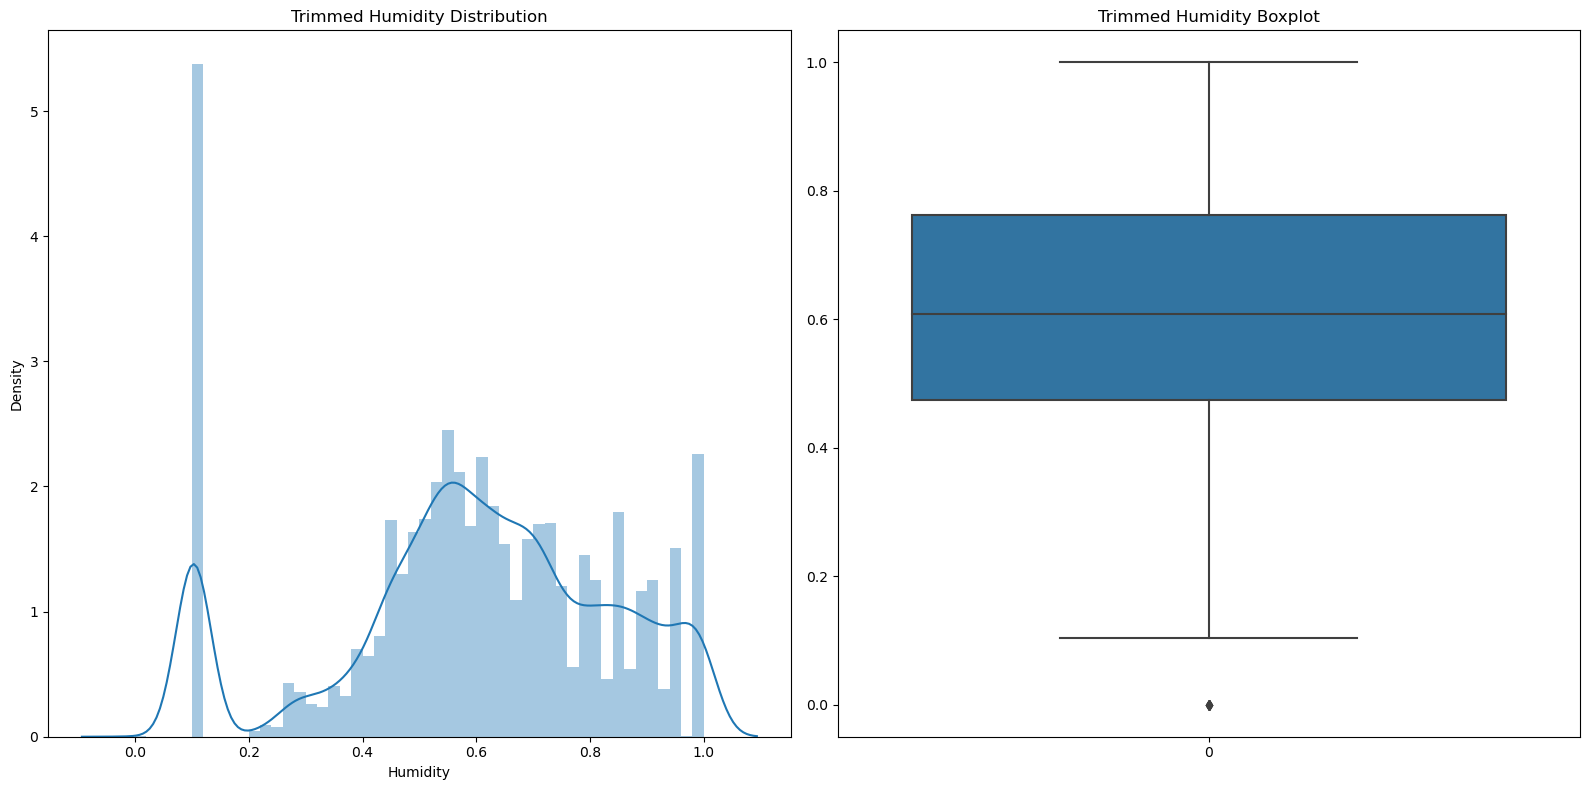

<Figure size 640x480 with 0 Axes>

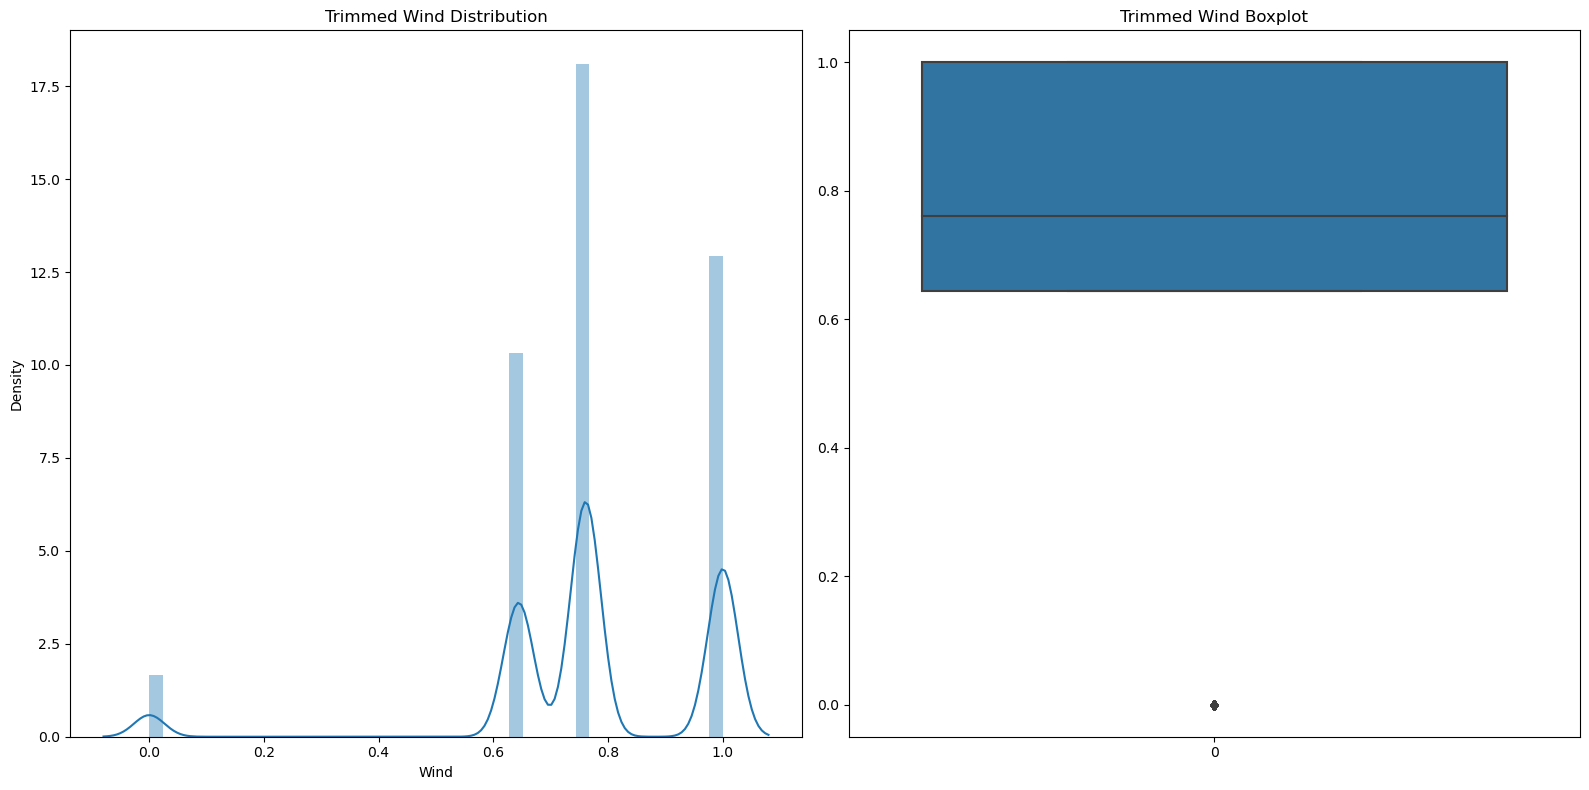

<Figure size 640x480 with 0 Axes>

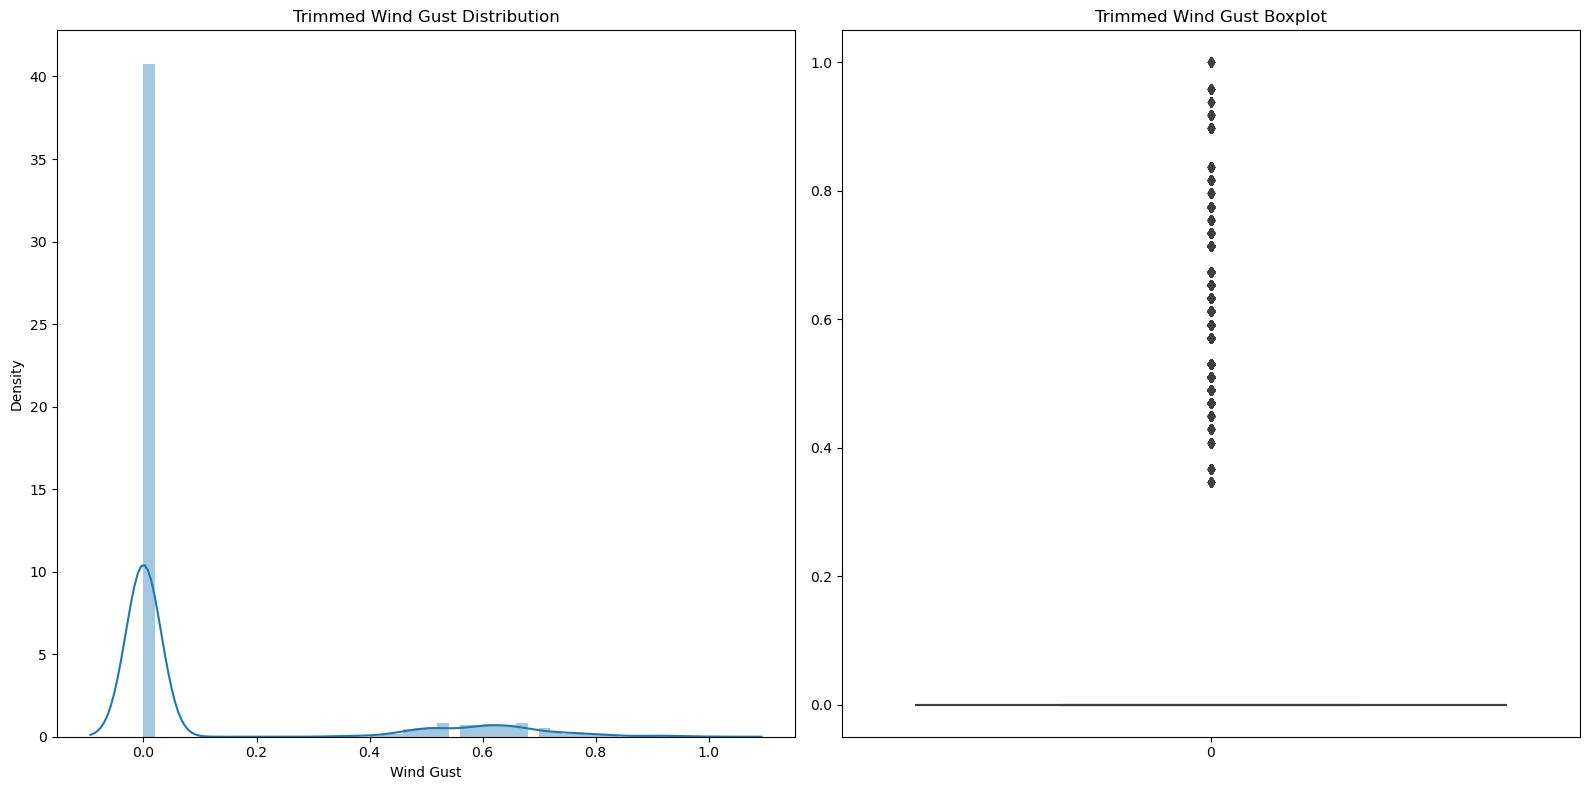

<Figure size 640x480 with 0 Axes>

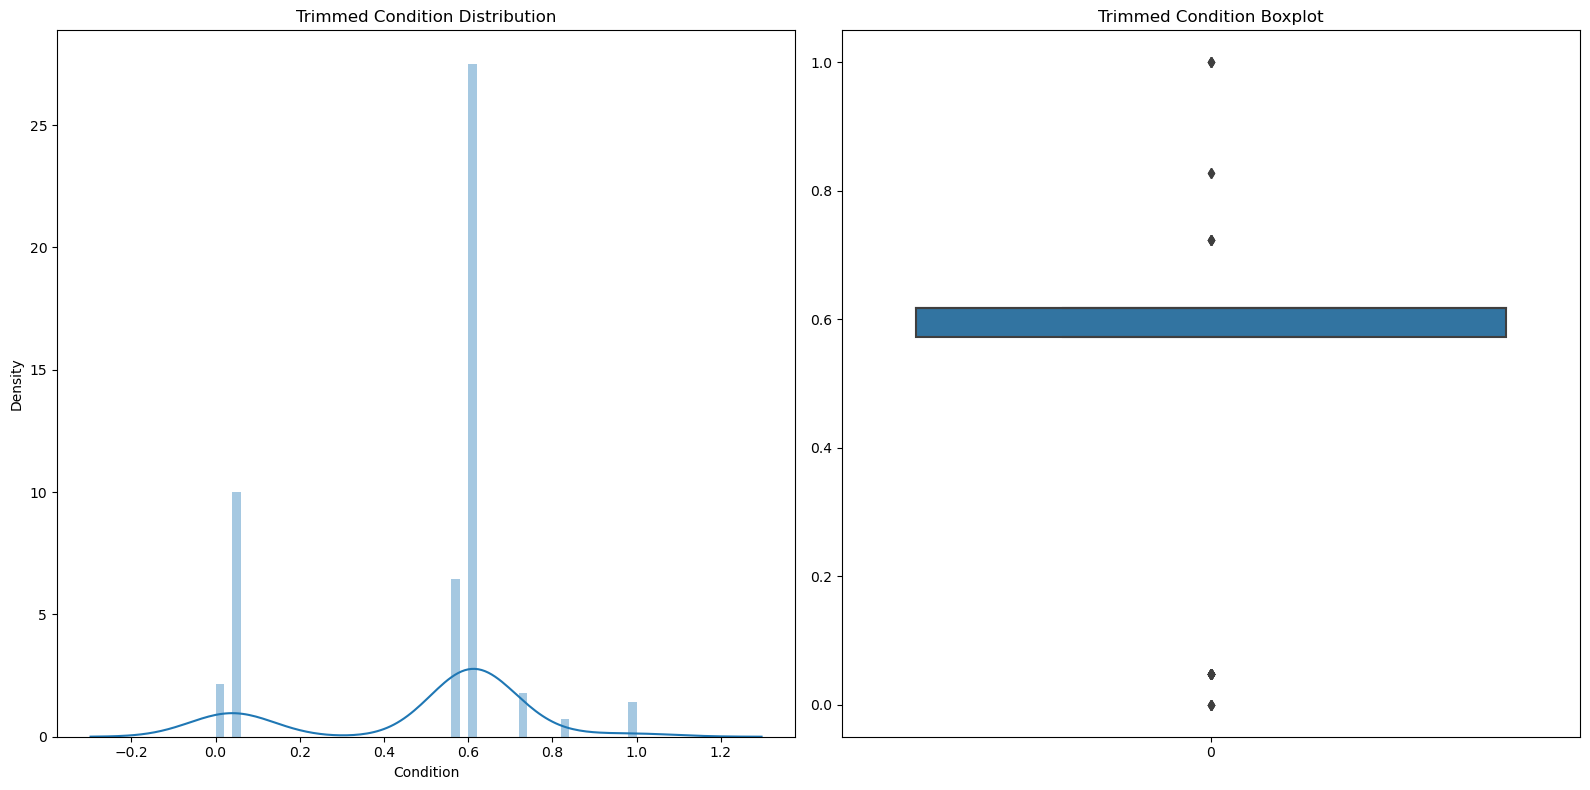

<Figure size 640x480 with 0 Axes>

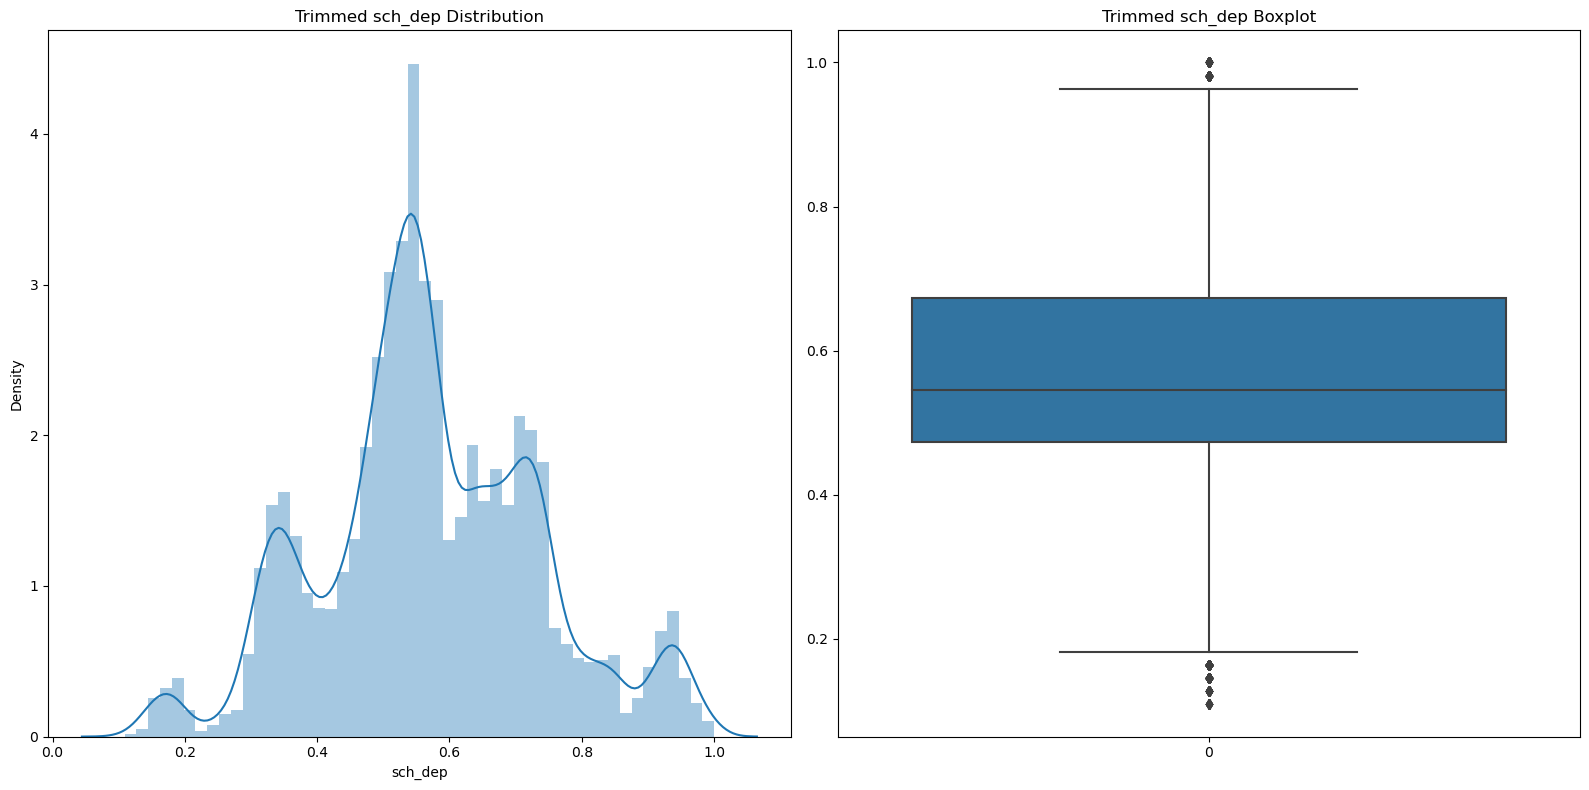

<Figure size 640x480 with 0 Axes>

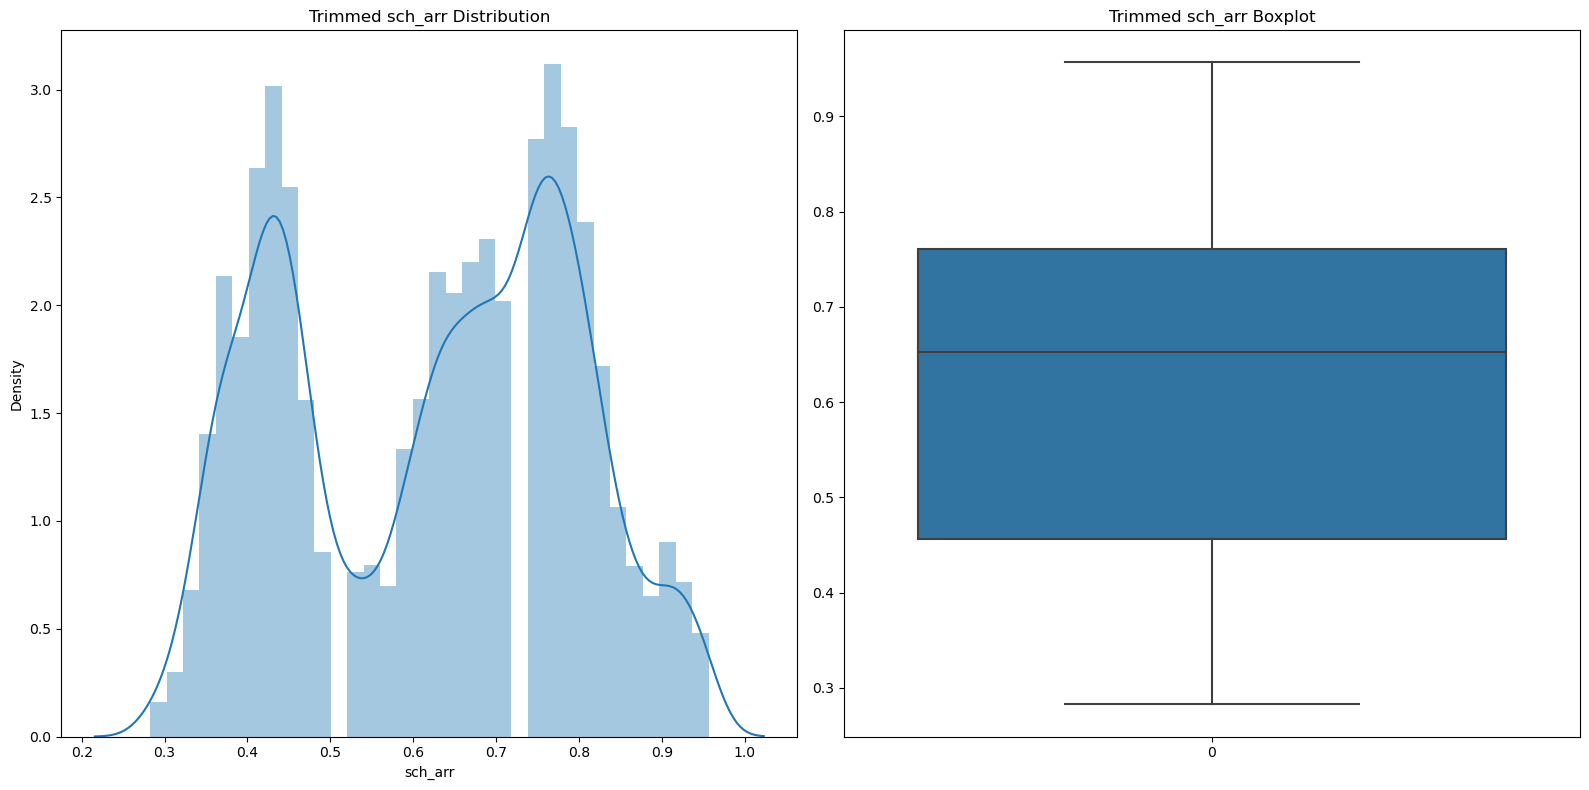

In [109]:
for col in scaled_other:
    for num in trimmed_var.keys():
        plt.figure(col)
        plt.figure(figsize = (16,8))
        plt.subplot(1,2,1)
        sns.distplot(trimmed_var[num][col]).set(title = f'Trimmed {col} Distribution')
        plt.subplot(1,2,2)
        sns.boxplot(trimmed_var[num][col]).set(title = f'Trimmed {col} Boxplot')
        plt.tight_layout()
        break

**step 4**: apply capping

In [110]:
for col, limit in limit_dict.items():
    scaled_data[col] = np.where(
                            scaled_data[col] >= limit[1], 
                            limit[1], 
                            np.where(scaled_data[col] <= limit[0], limit[0], scaled_data[col])
                            )

**step 5**: compare distribution and boxplot after capping

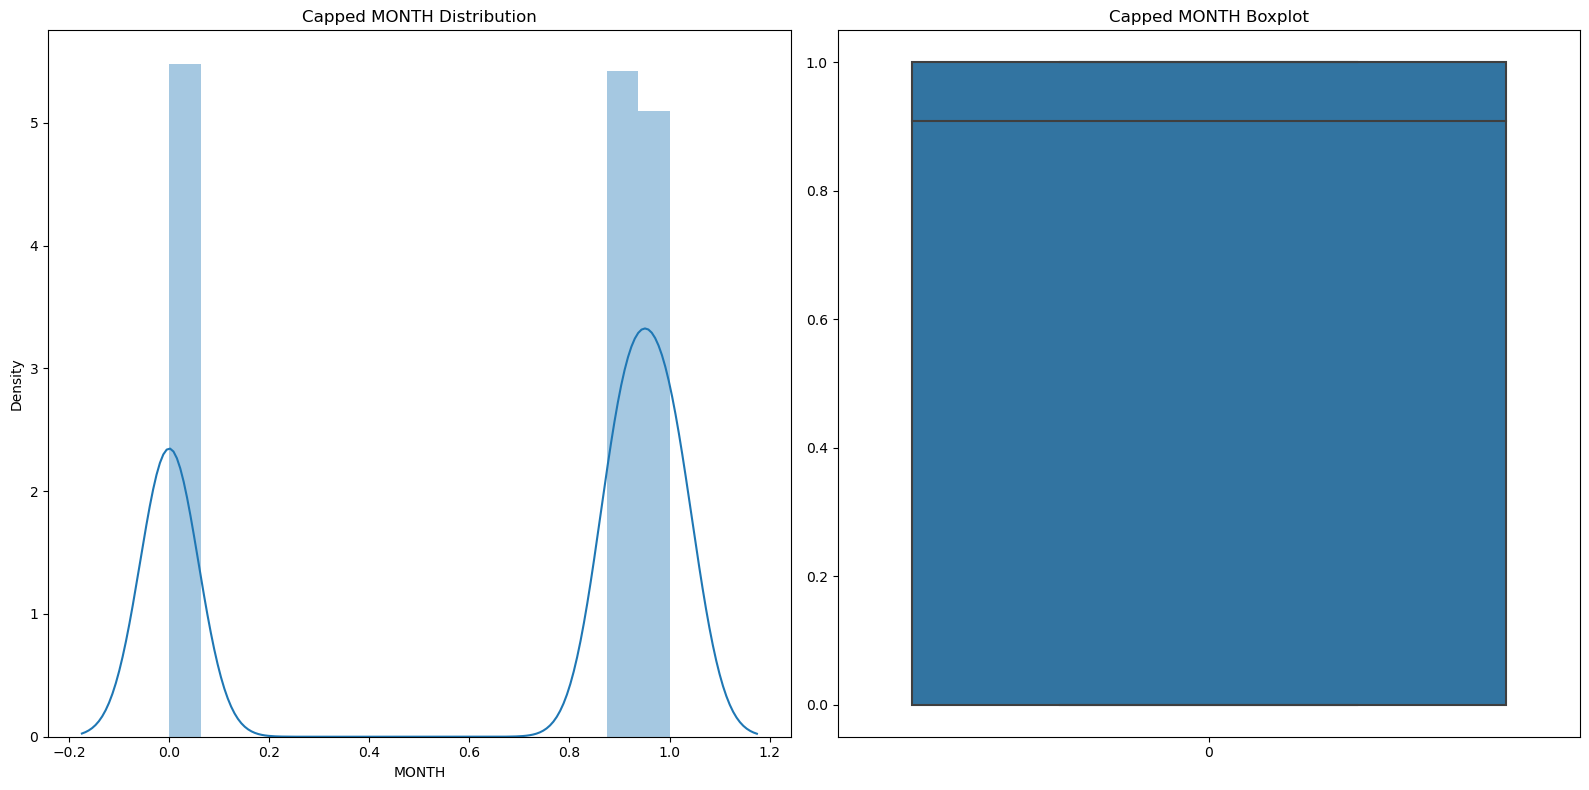

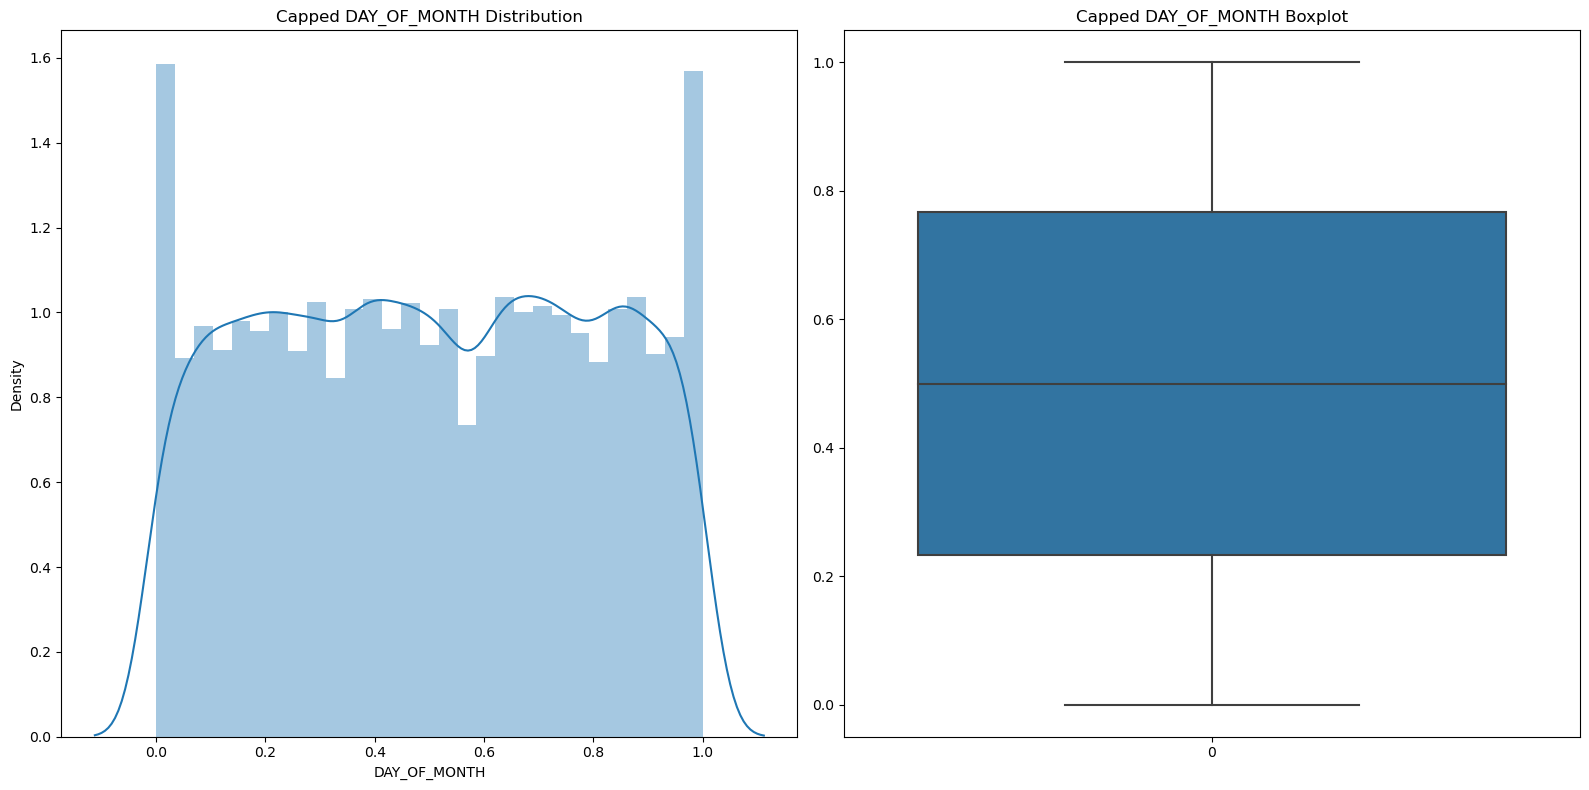

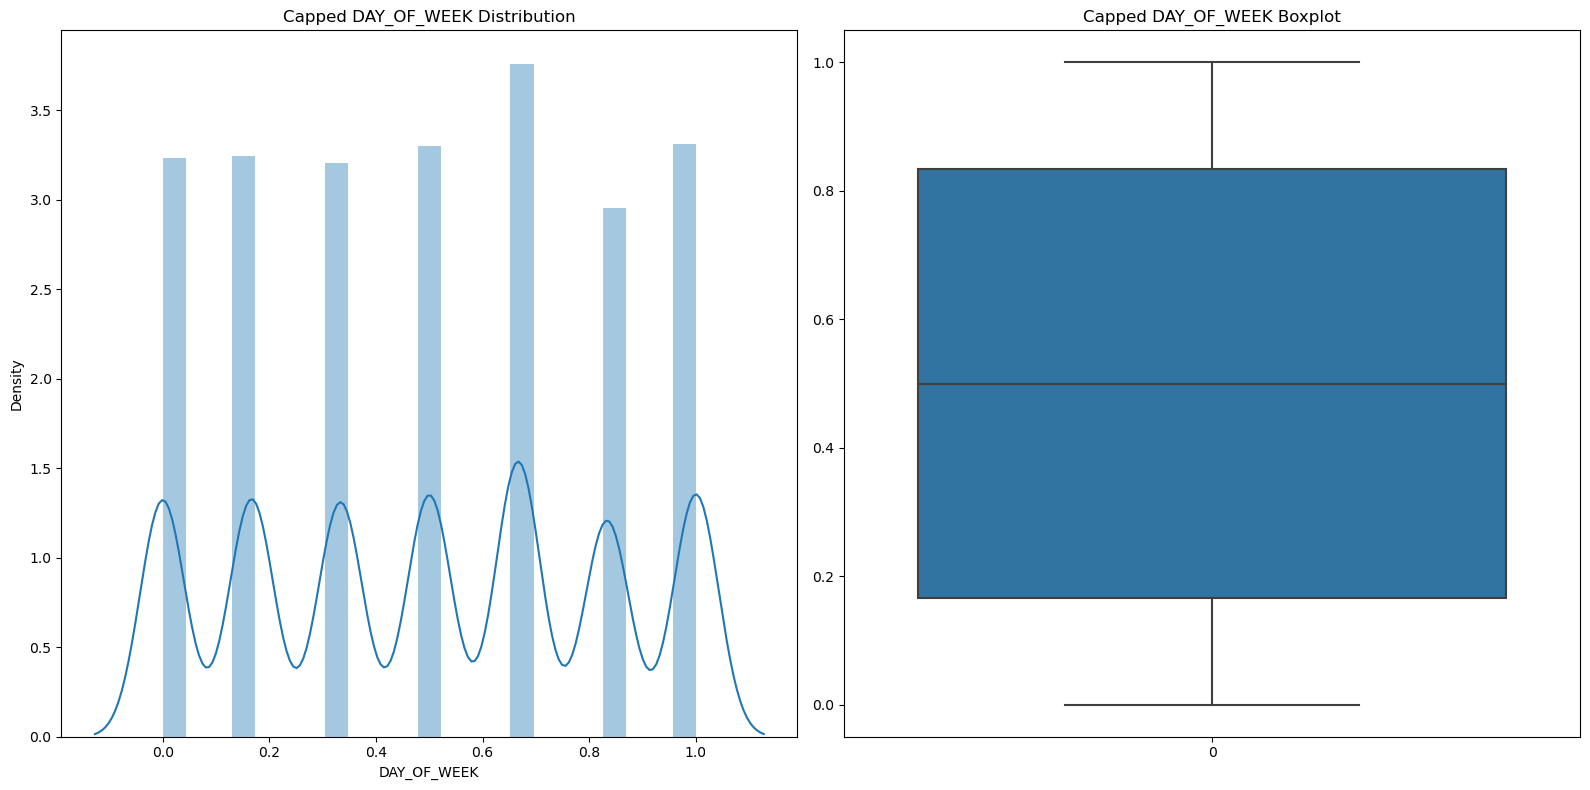

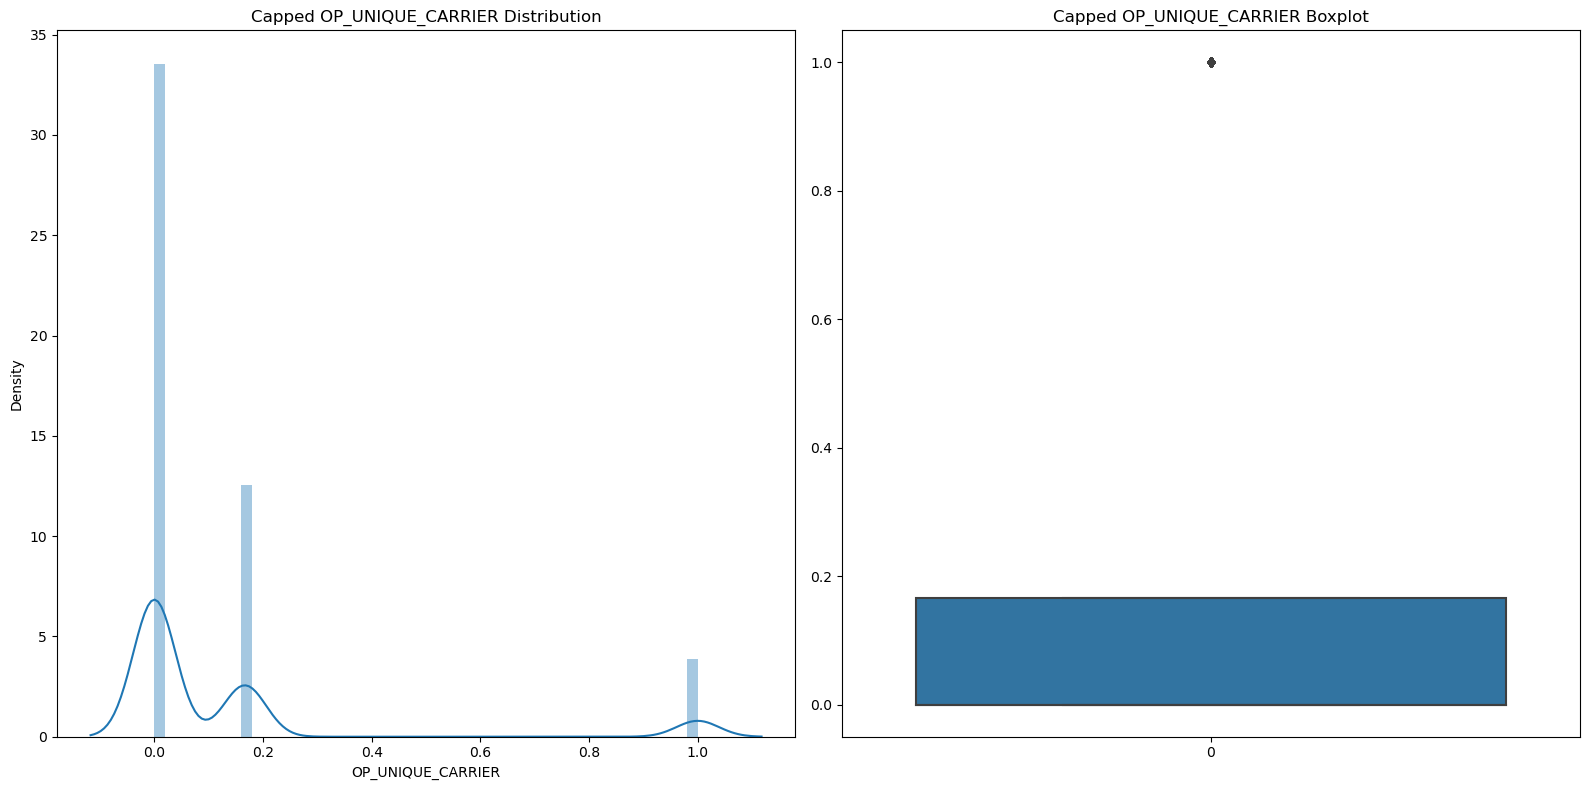

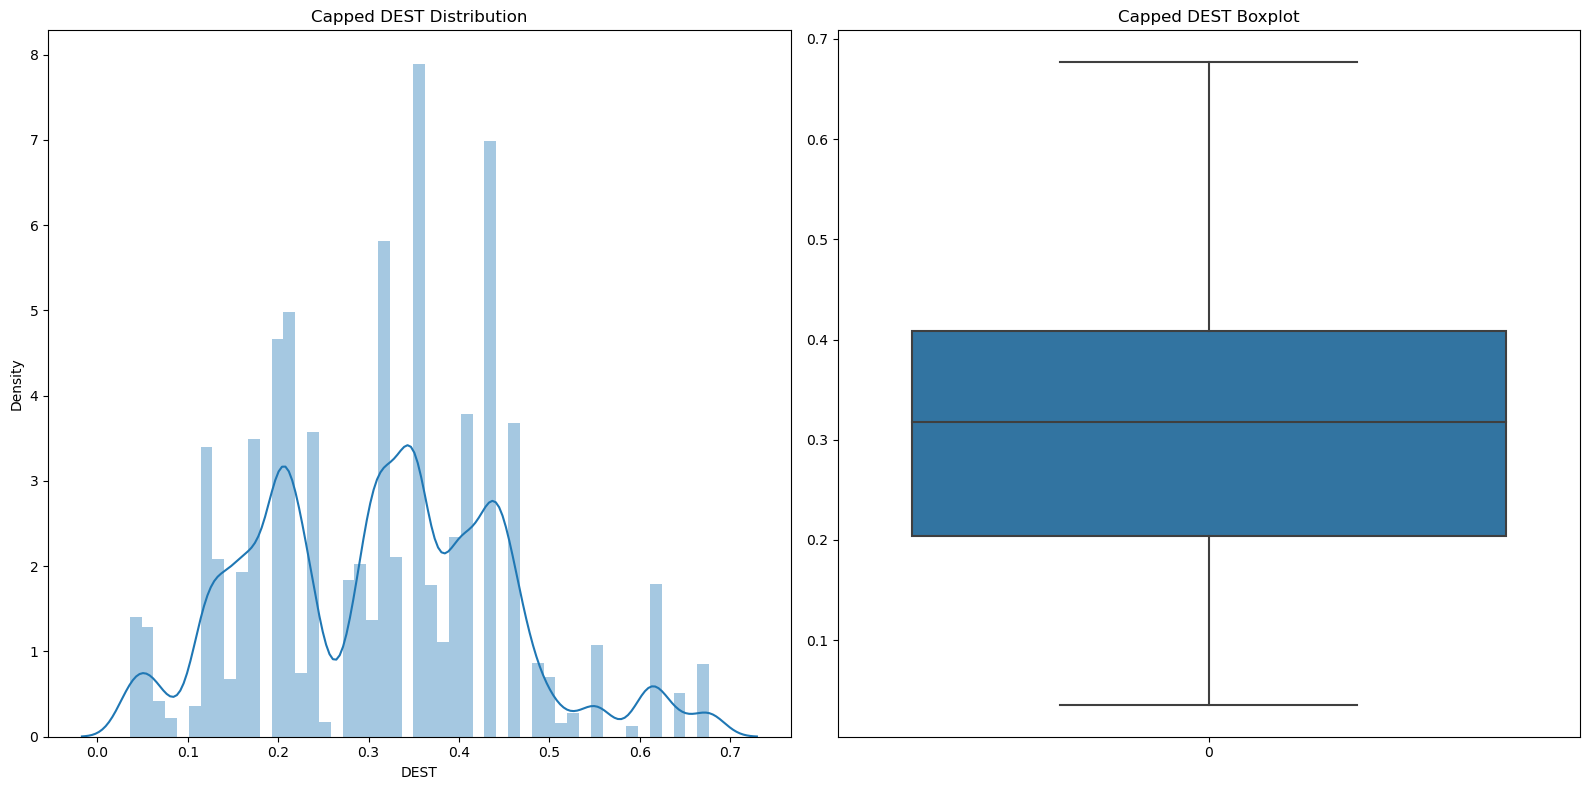

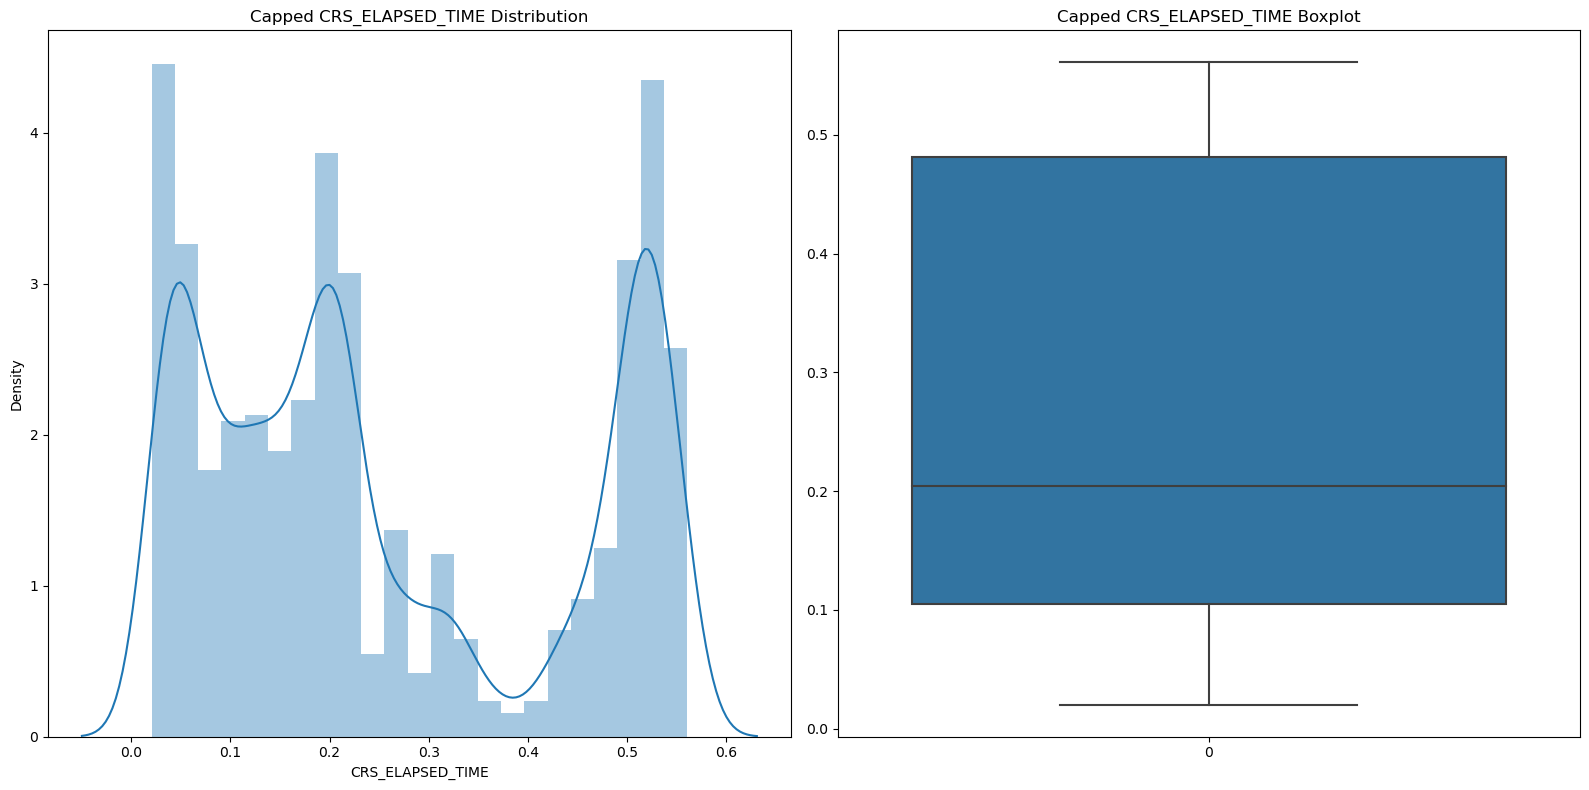

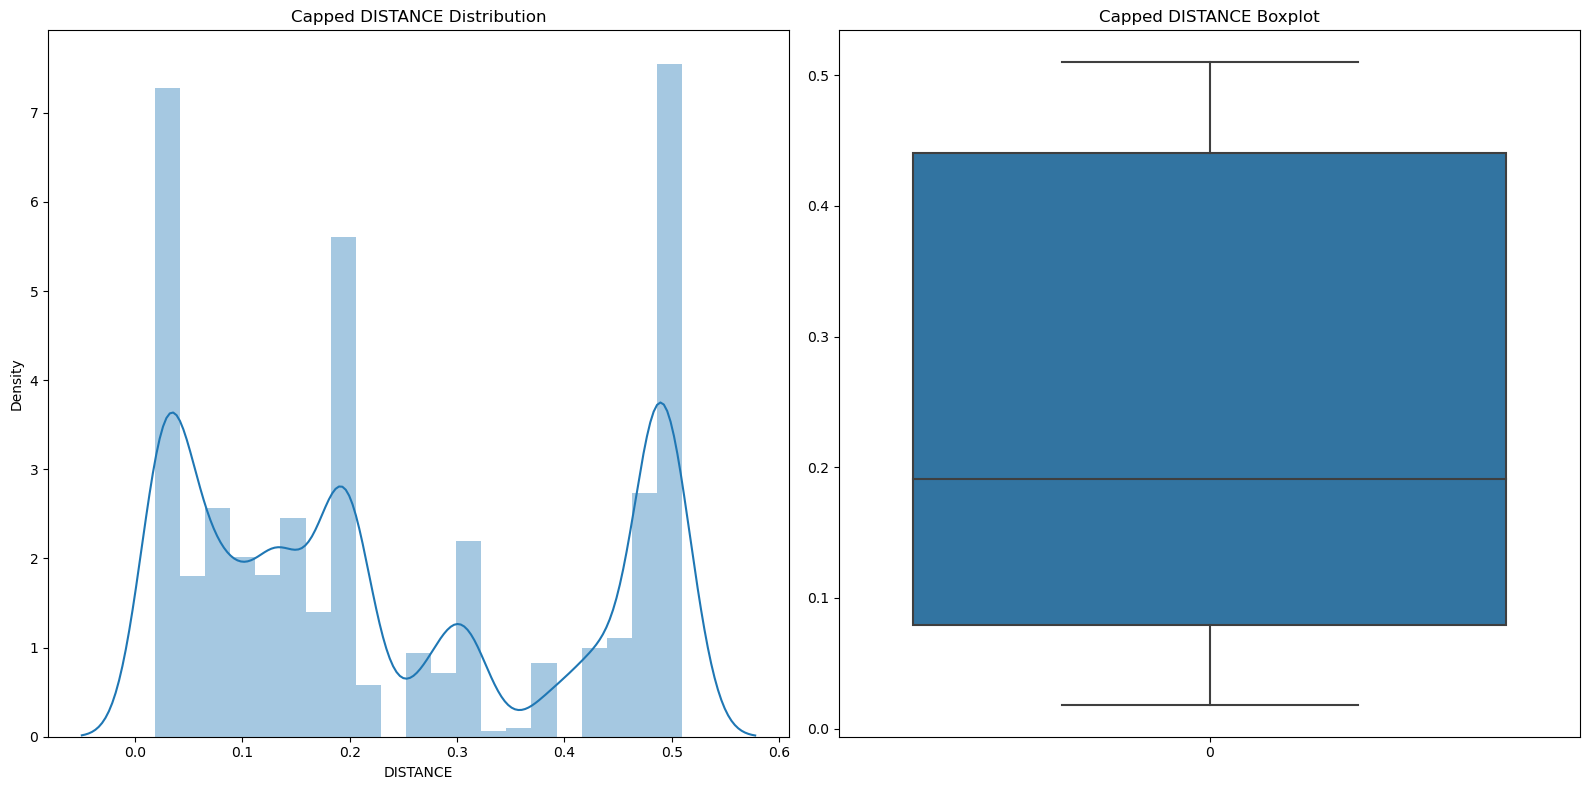

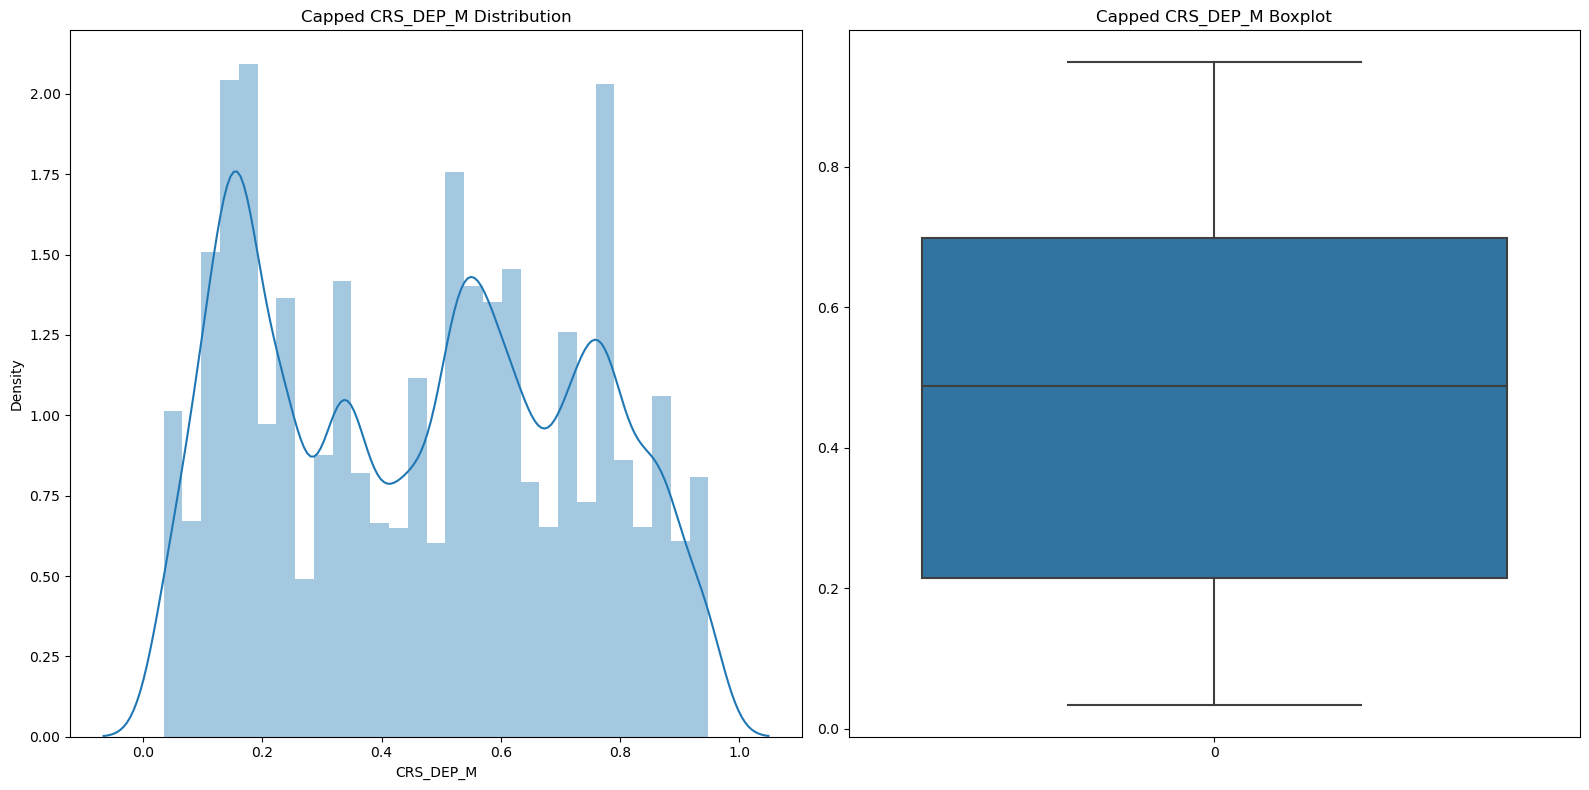

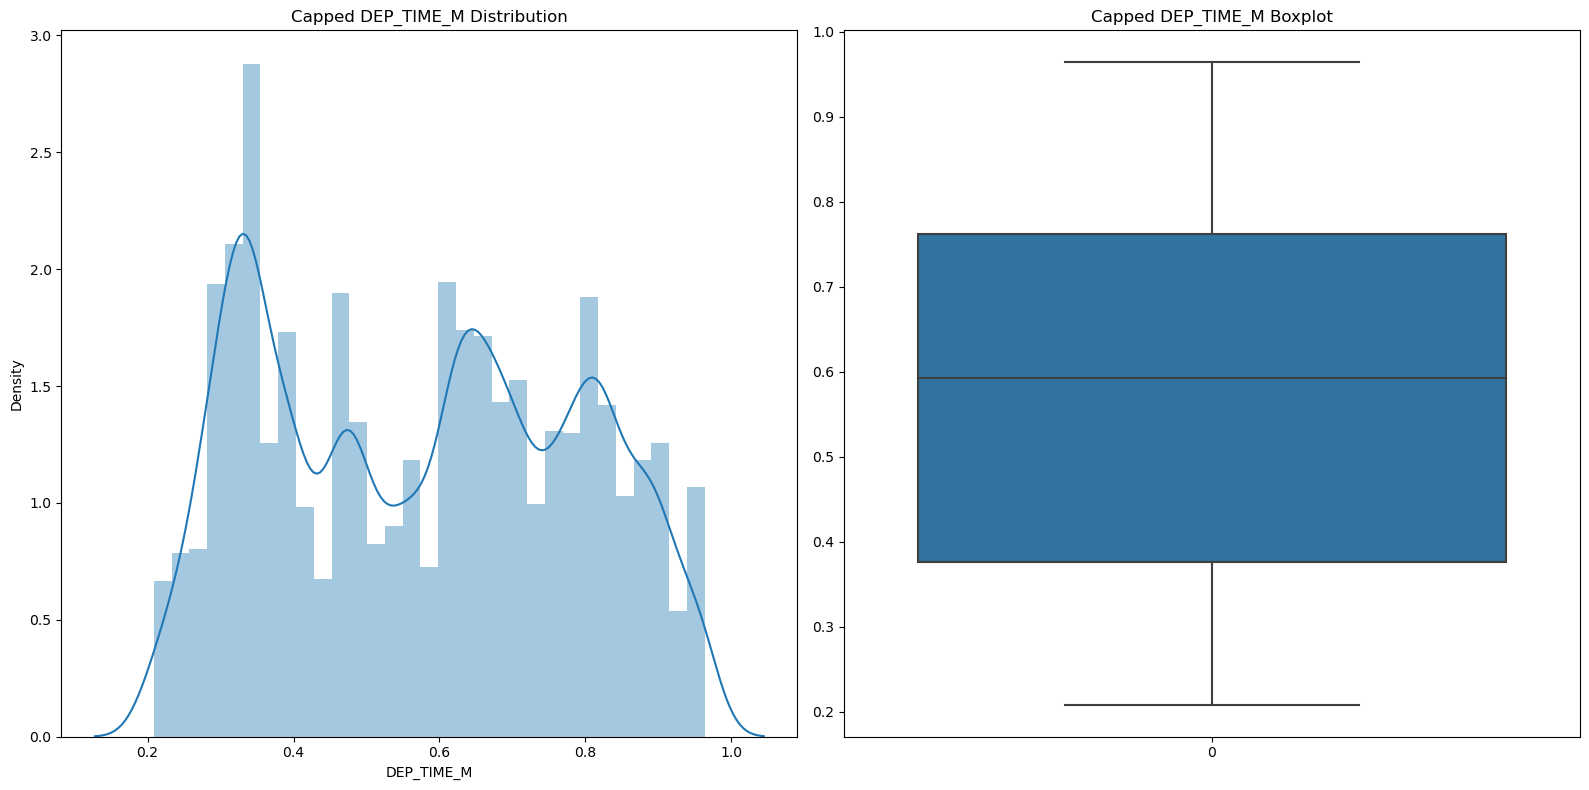

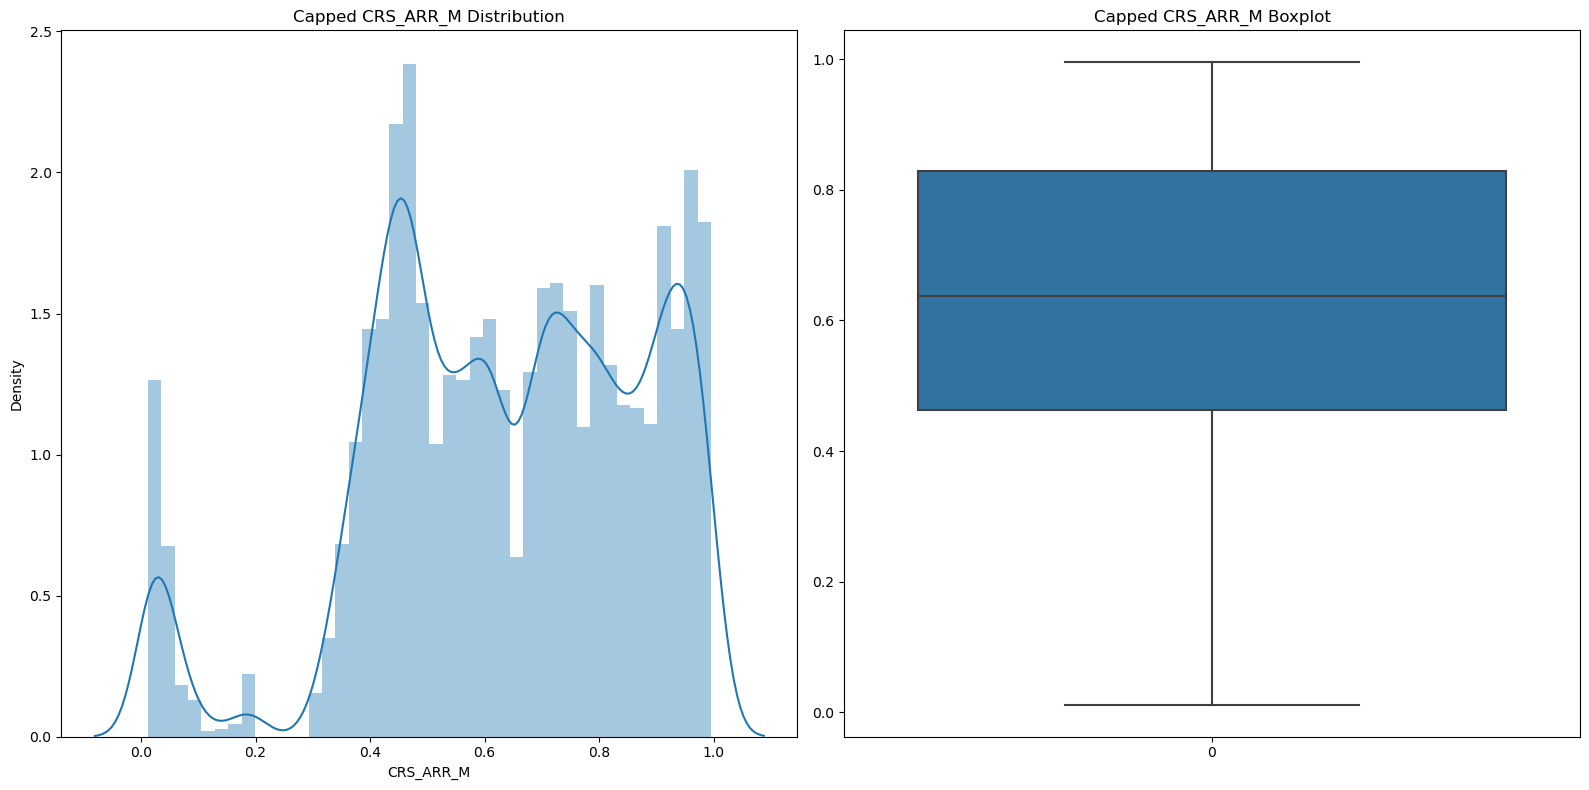

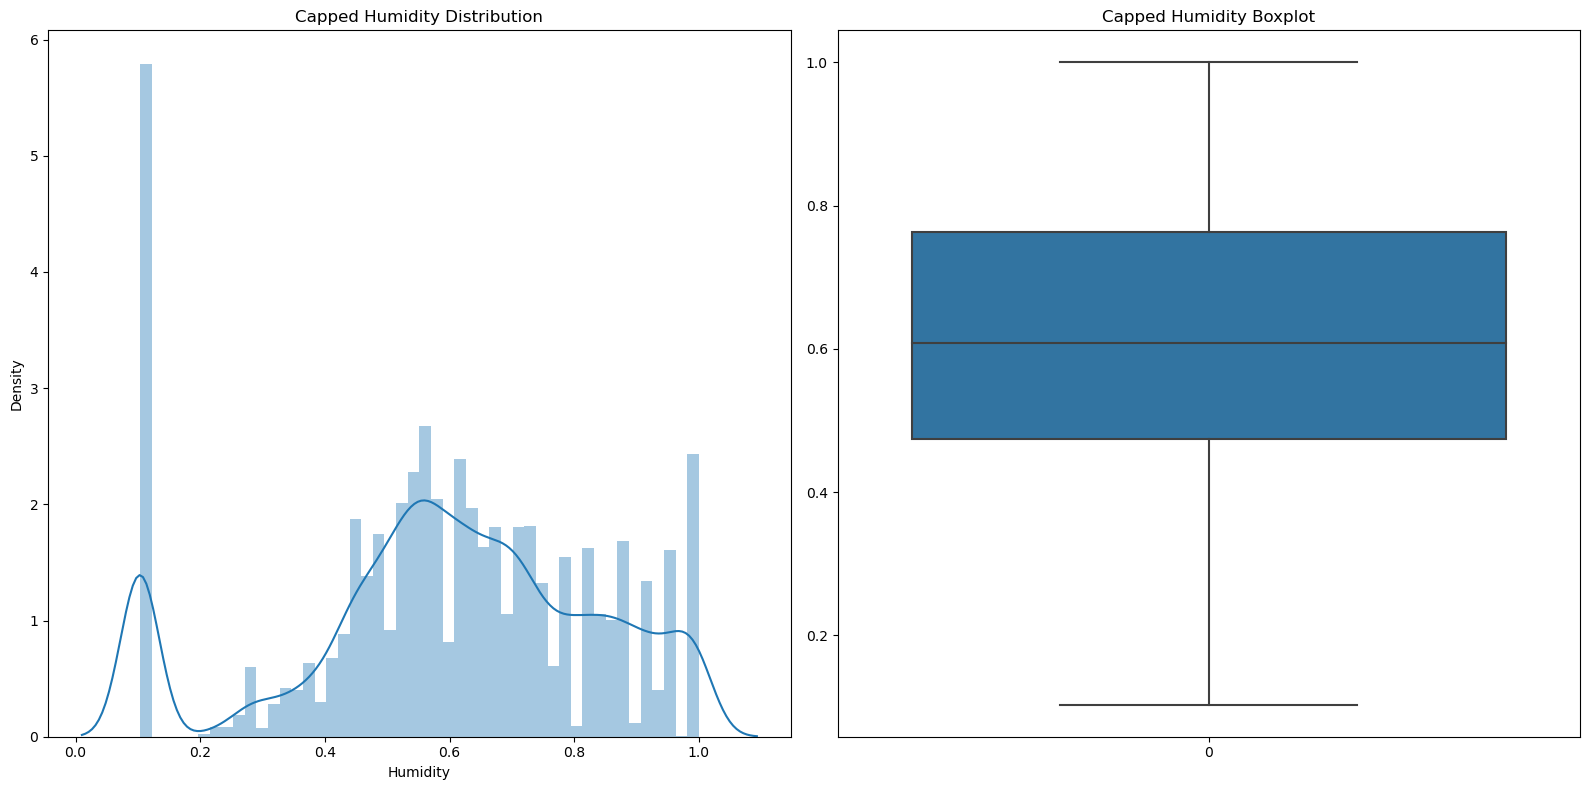

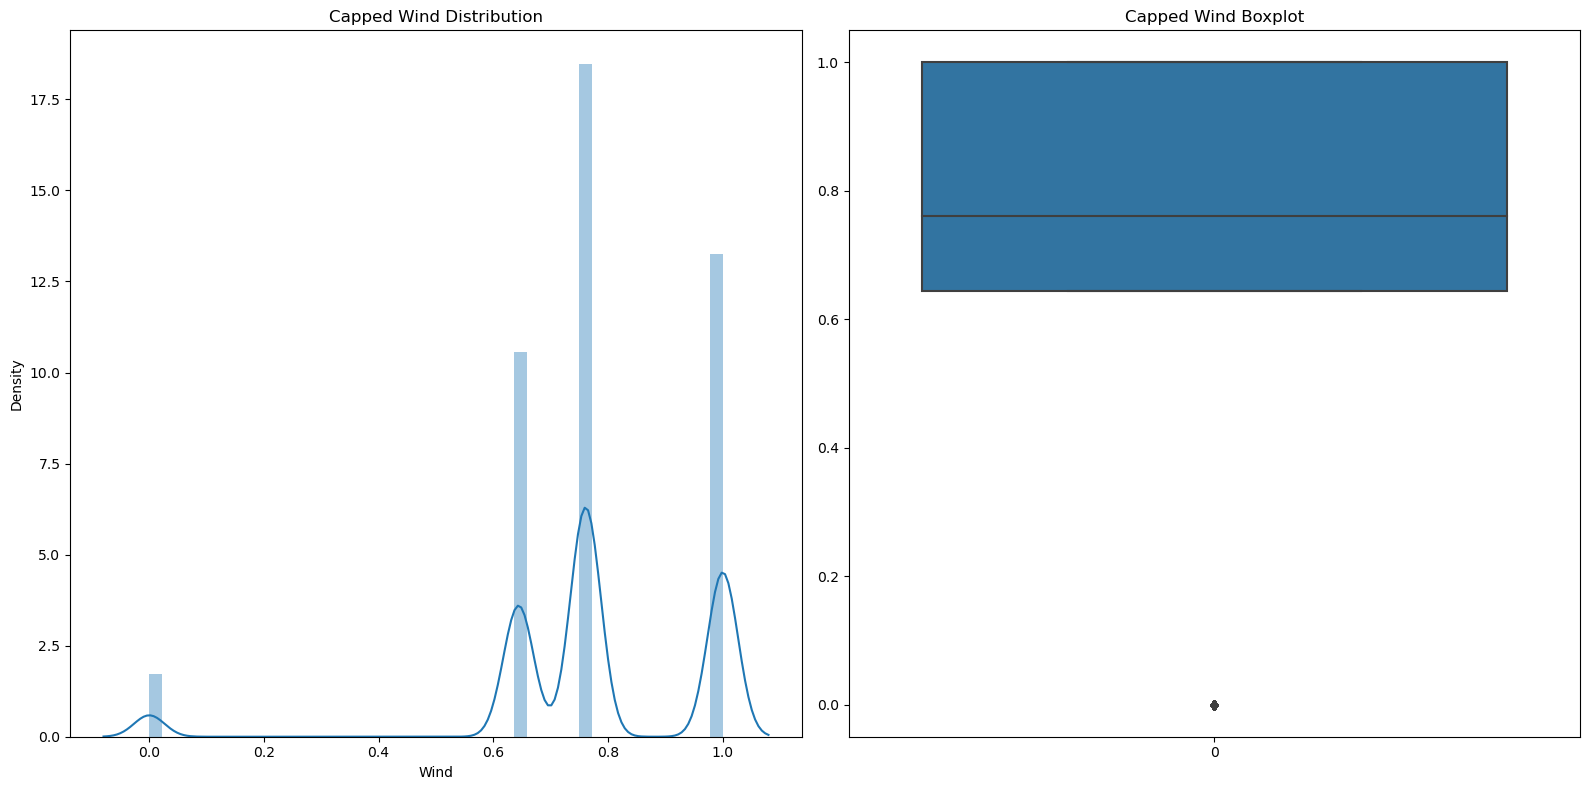

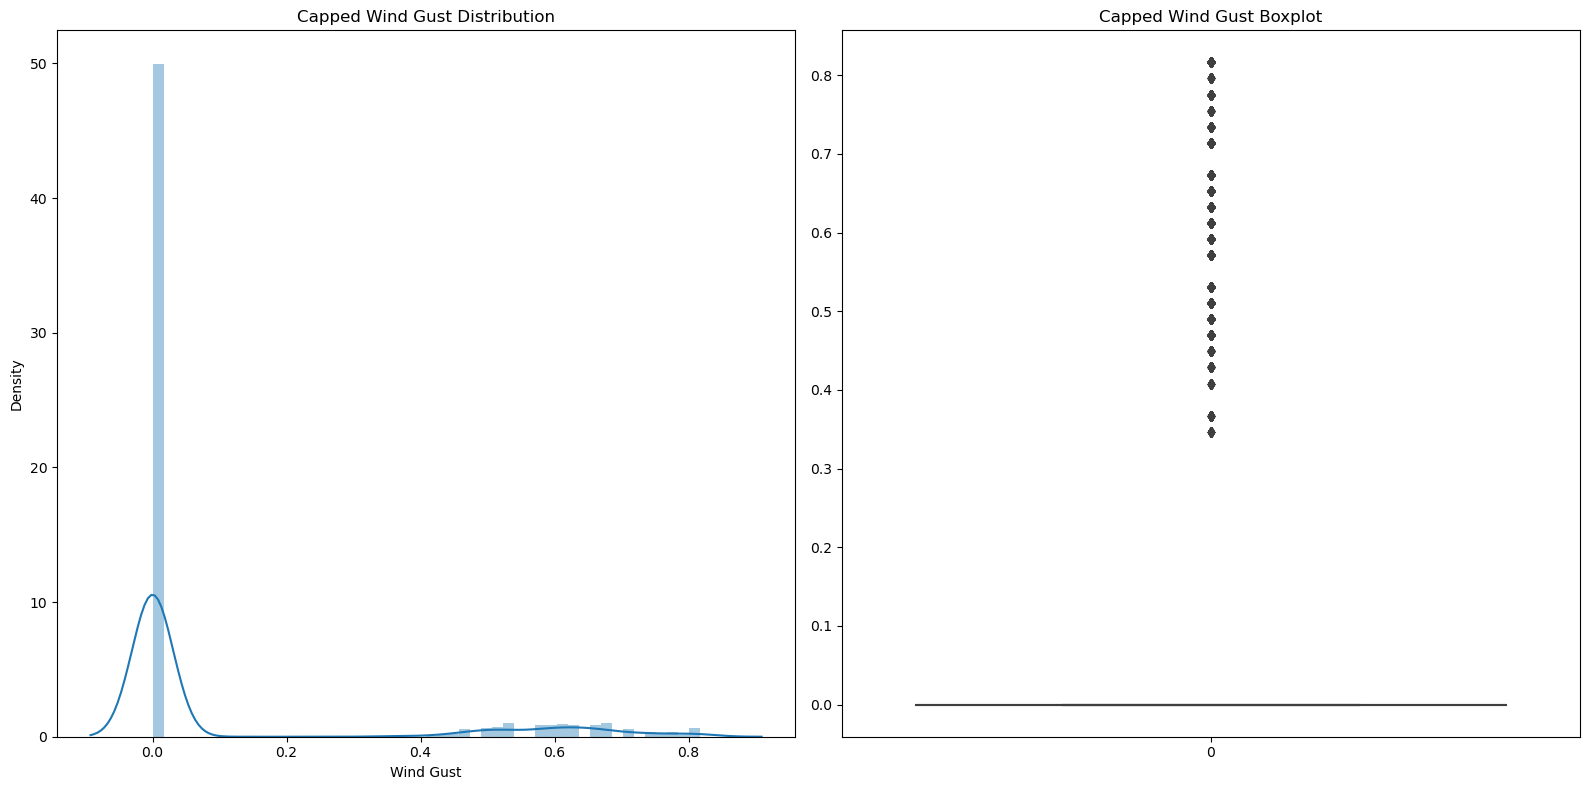

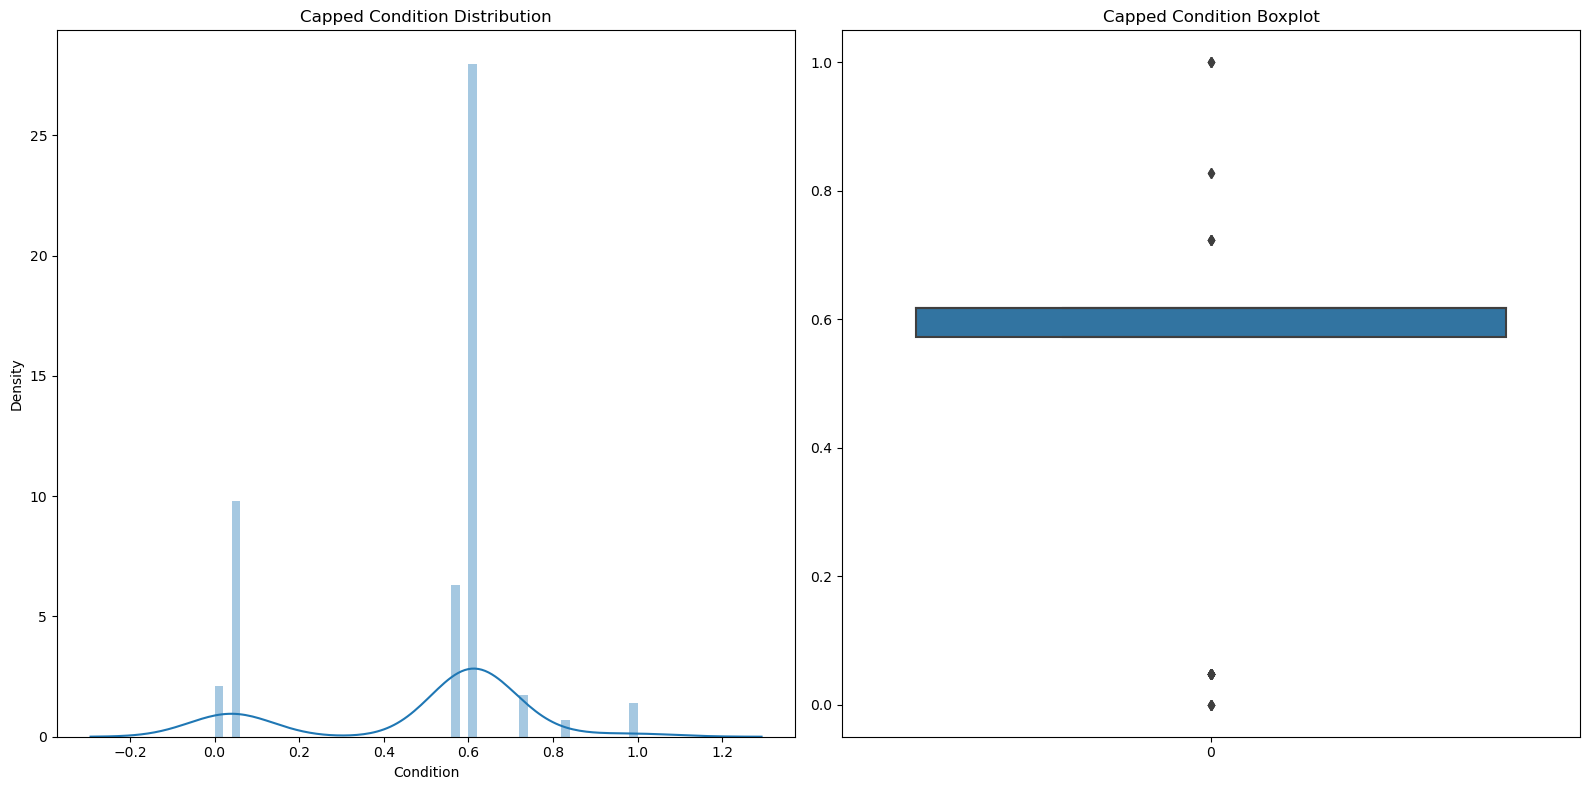

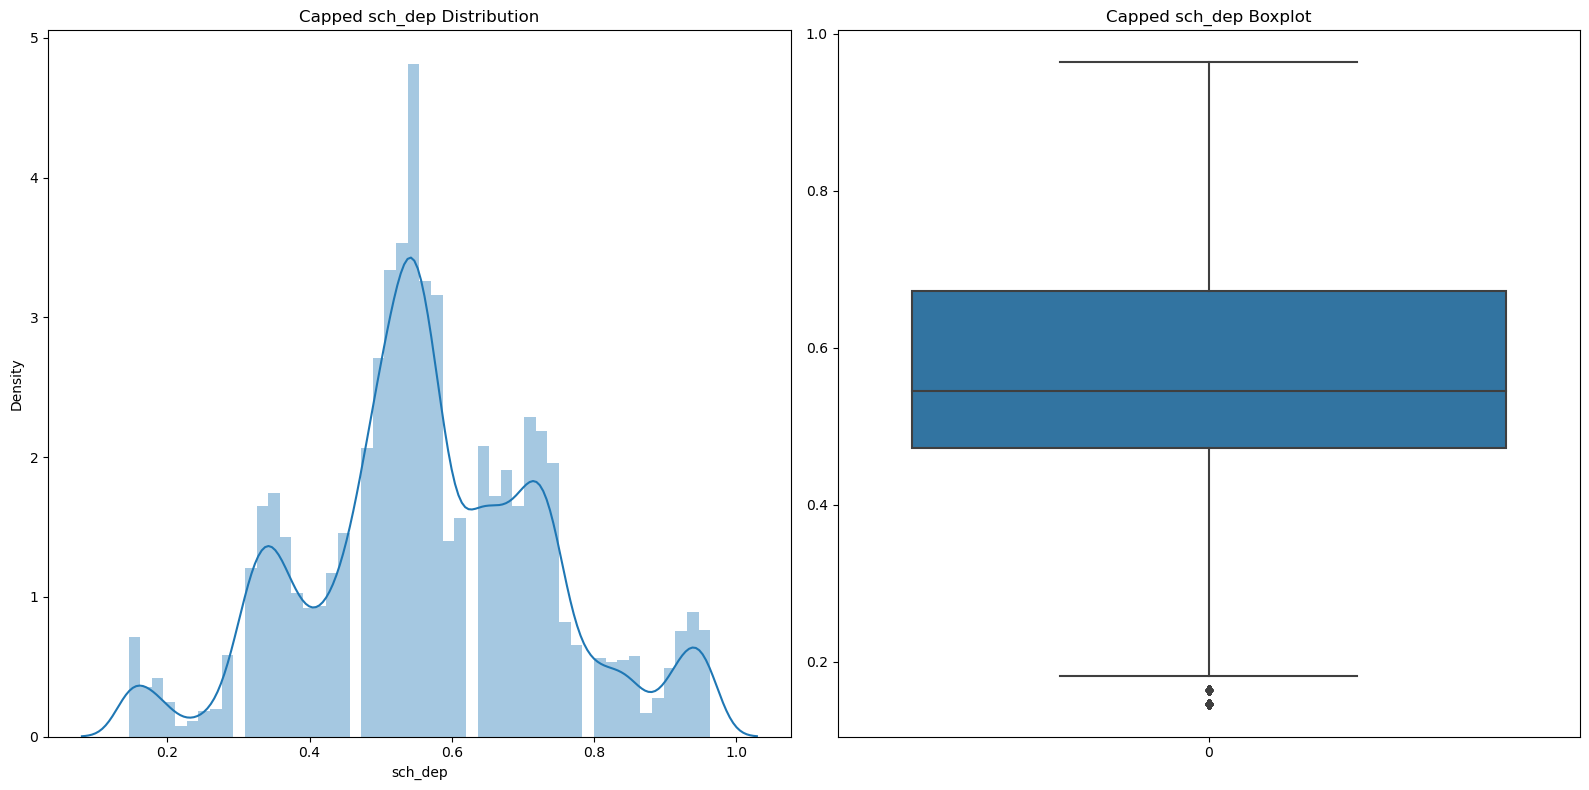

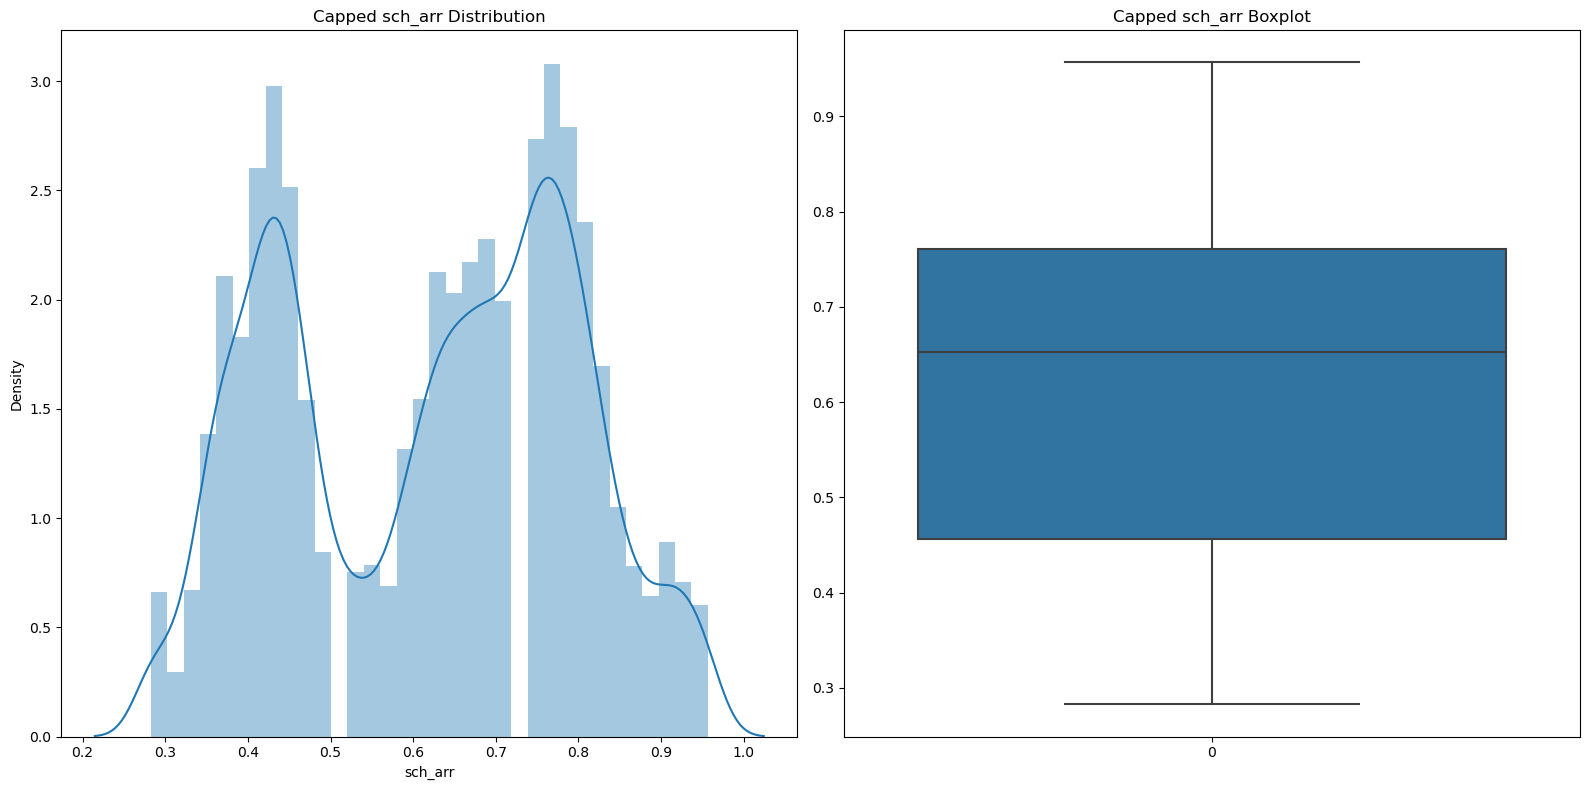

In [111]:
for col in other_distr:
    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    sns.distplot(scaled_data[col]).set(title = f'Capped {col} Distribution')
    plt.subplot(1,2,2)
    sns.boxplot(scaled_data[col]).set(title = f'Capped {col} Boxplot')
    plt.tight_layout()

In [112]:
scaled_data.isna().sum()
scaled_data['OP_UNIQUE_CARRIER'].fillna(value = scaled_data['OP_UNIQUE_CARRIER'].mean(), inplace = True)
scaled_data['Condition'].fillna(value = scaled_data['Condition'].mean(), inplace = True)
scaled_data.isna().sum()

TAIL_NUM             0
Temperature          0
Dew Point            0
DEP_DELAY            0
Wind Speed           0
Pressure             0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
DEST                 0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Humidity             0
Wind                 0
Wind Gust            0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

## Correlation plots

**heatmap to visualize correlation between features**

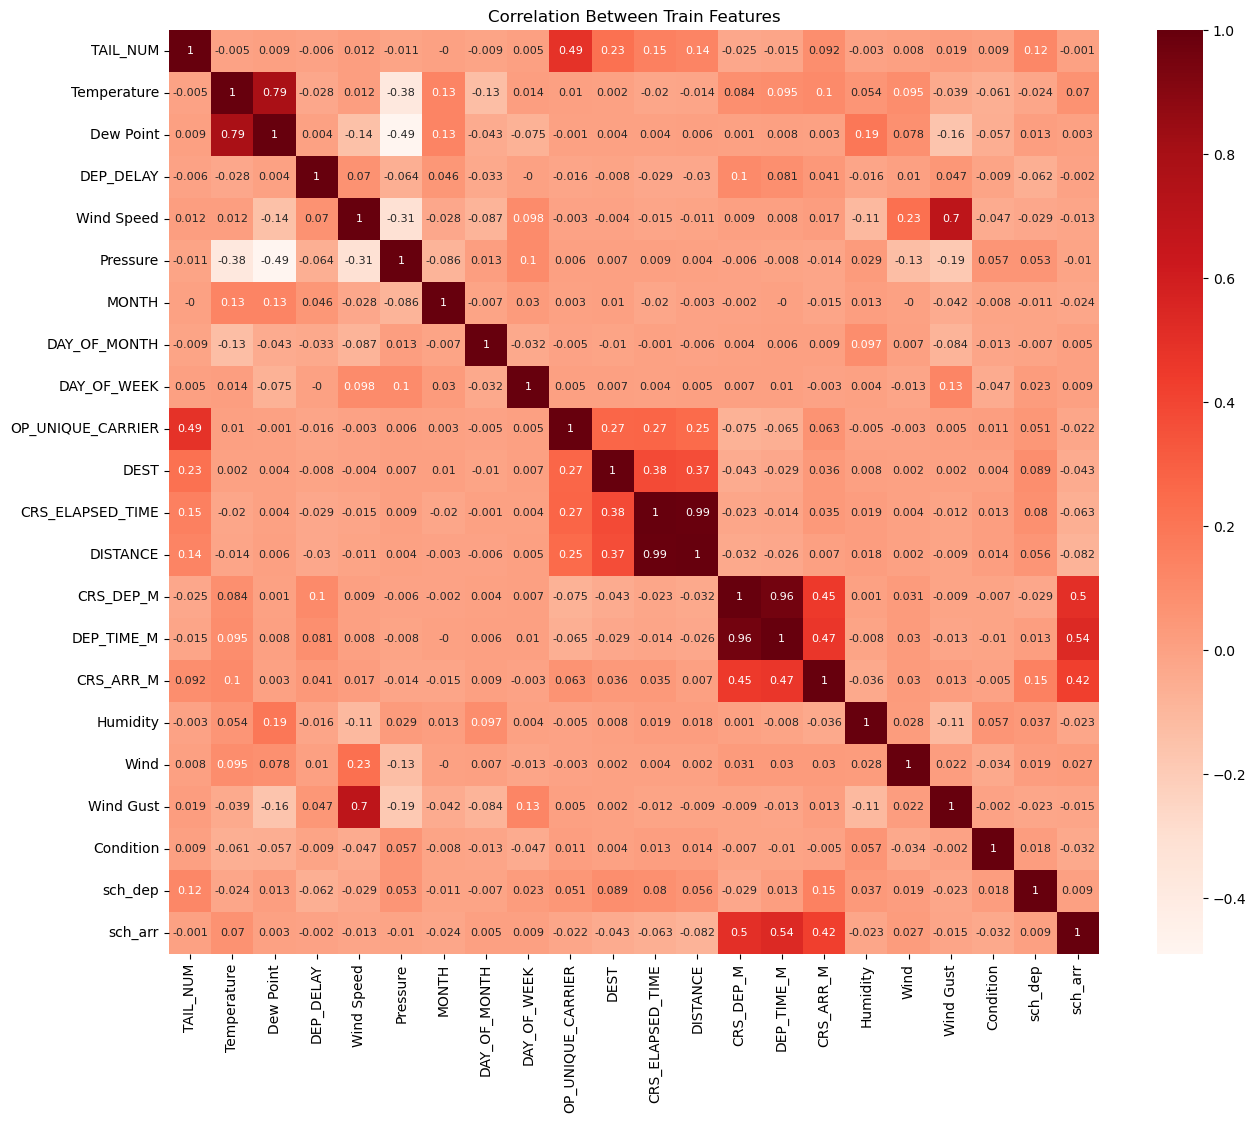

In [114]:
X = scaled_data.drop('TAXI_OUT', axis = 1)
y = scaled_data['TAXI_OUT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

plt.figure(figsize = (15,12))
train_corr = X_train.corr().round(3)
heatmap = sns.heatmap(train_corr, annot = True, cmap = plt.cm.Reds, annot_kws = {'size':8})
heatmap.set_title('Correlation Between Train Features')
plt.show()

**correlation between features and target**

Text(0.5, 1.0, 'Train Features Correlating with TAXI_OUT')

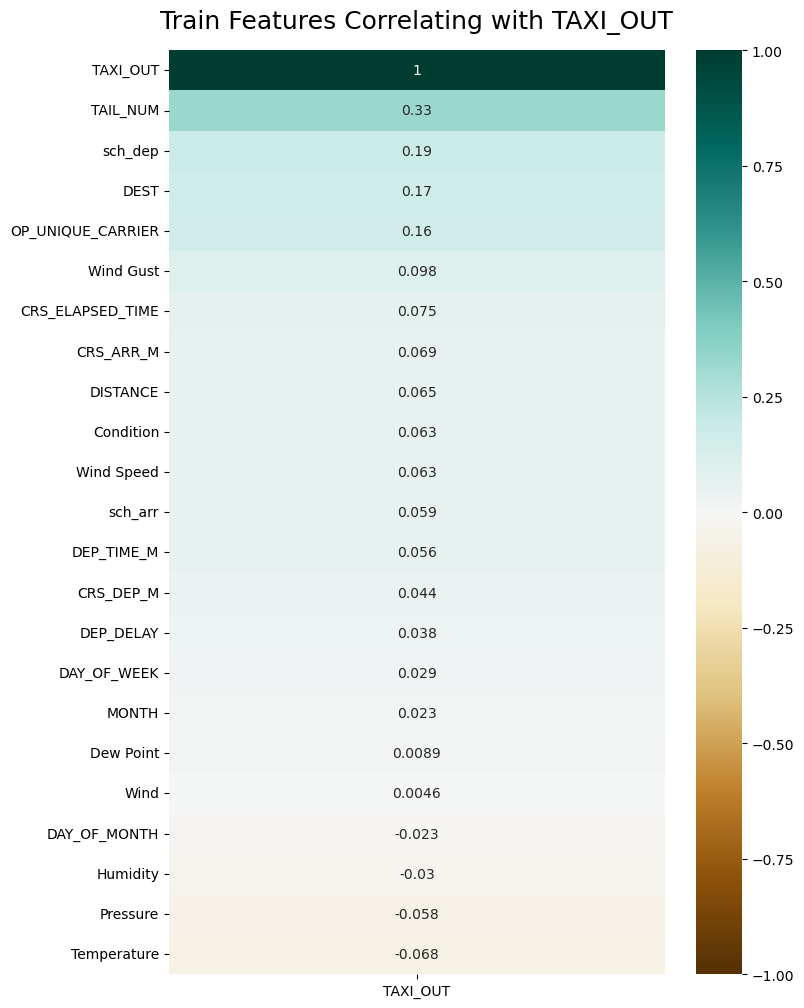

In [115]:
Xy_train = pd.concat([X_train, y_train], axis = 1)
plt.figure(figsize = (8,12))
heatmap = sns.heatmap(Xy_train.corr()[['TAXI_OUT']].sort_values(by = 'TAXI_OUT', ascending = False), 
                      vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Train Features Correlating with TAXI_OUT', fontdict = {'fontsize':18}, pad = 16)

## model fitting

**default linear model with no hyperparameter tuning**

In [116]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
ols1 = sm.OLS(y_train, X_train).fit()
print(ols1.summary())
print('\nOLS\nR2:', ols1.rsquared)
print('F-stat:', ols1.fvalue)

# linreg1 = LinearRegression().fit(X, y)
# lin1_ypred = linreg1.predict(X)
# print('\nLinear Regression\nScore', linreg1.score(X, y))

#-------------------------------------------------------------------------------------

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train = X_train.drop('const', axis = 1)
# X_test = X_test.drop('const', axis = 1)
# logreg1 = LogisticRegression().fit(X_train, y_train)
# log1_ypred = logreg1.predict(X_test)
# print('\nLogistic Regression\nScore', accuracy_score(y_test, log1_ypred))

                            OLS Regression Results                            
Dep. Variable:               TAXI_OUT   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     229.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                 7840.3
No. Observations:               23056   AIC:                        -1.563e+04
Df Residuals:                   23033   BIC:                        -1.545e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0577      0.03

**X column names**

In [ ]:
# X.columns

**feature selection**

(1) **heatmap correlation**: drop all features except 'TAIL_NUM','sch_dep','OP_UNIQUE_CARRIER', 'Condition', 'DEST', 'Wind' since these were >= -/+0.1 in the correlation between each feature and the target.

In [117]:
Xreduced = X_train.drop(['Wind Gust','CRS_ELAPSED_TIME','CRS_ARR_M','Wind Speed','DISTANCE','sch_arr','DEP_TIME_M',
                   'CRS_DEP_M','DEP_DELAY','DAY_OF_WEEK','MONTH','Dew Point','DAY_OF_MONTH','Humidity',
                   'Pressure','Temperature','Condition','Wind'], axis = 1)

print("(1) heatmap correlation:\nfeatures:['TAIL_NUM','sch_dep','OP_UNIQUE_CARRIER','DEST']")
ols2 = sm.OLS(y_train, Xreduced).fit()
print('\nOLS\nR2:', ols2.rsquared)
print('F-stat:', ols2.fvalue)

#----------------------------------------------------------------------

# X_train, X_test, y_train, y_test = train_test_split(Xreduced, y, test_size = 0.2, random_state = 0)
# X_train = X_train.drop('const', axis = 1)
# X_test = X_test.drop('const', axis = 1)
# logreg2 = LogisticRegression().fit(X_train, y_train)
# log2_ypred = logreg2.predict(X_test)
# print('\nLogistic Regression\nScore', accuracy_score(y_test, log2_ypred))

(1) heatmap correlation:
features:['TAIL_NUM','sch_dep','OP_UNIQUE_CARRIER','DEST']

OLS
R2: 0.13600161543476896
F-stat: 907.1120077858695


(2) **backward selection**: drop features with the highest p-values one at a time, use the standard p-value = 0.05 based on a 95% confidence interval.

In [ ]:
# Xbackward = X.drop(['Wind','OP_UNIQUE_CARRIER','CRS_DEP_M','CRS_ARR_M','DISTANCE','Wind Speed'], axis = 1)

# print("(2) backward selection:")
# print("drop features:['Wind','OP_UNIQUE_CARRIER','CRS_DEP_M', 'CRS_ARR_M','DISTANCE','Wind Speed']")
# ols3 = sm.OLS(y, Xbackward).fit()
# # print(ols3.summary())
# print('\nOLS\nR2:', ols3.rsquared)
# print('F-stat:', ols3.fvalue)
#------------------------------------------------------------------

# X_train, X_test, y_train, y_test = train_test_split(Xbackward, y, test_size = 0.2, random_state = 0)
# X_train = X_train.drop('const', axis = 1)
# X_test = X_test.drop('const', axis = 1)
# logreg3 = LogisticRegression().fit(X_train, y_train)
# log3_ypred = logreg3.predict(X_test)
# print('\nLogistic Regression\nScore', accuracy_score(y_test, log3_ypred))

(3) **forward selection**: select features with lowest p-values one at a time, use the standard p-value = 0.05 based on a 95% confidence interval.
## fix?

In [ ]:
# # from sklearn.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.feature_selection import RFE

# print("(3) recursive feature elimination:")

# linrfe = LinearRegression()
# rfe = RFE(linrfe, n_features_to_select=15, step=1)
# fit = rfe.fit(X, y)
# print("\nLinear Regression\nNum Features: %s" % (fit.n_features_))
# print("Feature Ranking: %s" % (fit.ranking_))
# print('Feature names: %s' % (fit.feature_names_in_))

#------------------------------------------------------------------

# logrfe = LogisticRegression()
# rfe = RFE(logrfe, n_features_to_select=15, step=1)
# fit = rfe.fit(X, y)
# print("\nLogistic Regression\nNum Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))
# print('Feature names: %s' % (fit.feature_names_in_))

In [ ]:
# # #remove 'const' later
# Xlin_rfe = X.drop(['const', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE',
#        'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M',
#        'Humidity'], axis = 1)
# linreg4 = LinearRegression().fit(Xlin_rfe, y)
# lin4_ypred = linreg4.predict(Xlin_rfe)
# print('\nLinear Regression\nScore', linreg4.score(Xlin_rfe, y))

#------------------------------------------------------------------
# # #keep 'const' dropped
# Xlog_rfe = X.drop(['const', 'MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
#        'TAIL_NUM', 'Wind Speed', 'Wind Gust', 'sch_arr'], axis =1)
# X_train, X_test, y_train, y_test = train_test_split(Xlog_rfe, y, test_size = 0.2, random_state = 0)
# logreg4 = LogisticRegression().fit(X_train, y_train)
# log4_ypred = logreg4.predict(X_test)
# print('\nLogistic Regression\nScore', accuracy_score(y_test, log4_ypred))

In [ ]:
#polynomial
# X.columns


**Ridge**

**Lasso**